# Project 2 - Ames Housing Prices Prediction Challenge 

## Problem Statement 

In this project, we want to identify the key factors which affect the housing prices in Ames, Iowa. Furthermore, using these factors as inputs, we aim to create a model that can give good predictions on subsequent housing price. Hence, the goal is to **predict the housing prices with the lowest possible error**. 

## Contents

- Data Cleaning for train.csv
- Exploratory Data Analysis
- Data Cleaning for test.csv
- Intial Model: Linear Regression 
- Regularization: Ridge, Lasso and ElasticNet 
- Conclusion 

### Library Imports

In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNet, ElasticNetCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error


## Data Cleaning for train.csv

In [2]:
train = pd.read_csv('./datasets/train.csv')

In [3]:
train.head()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0  109  533352170           60        RL           NaN     13517   Pave   NaN   
1  544  531379050           60        RL          43.0     11492   Pave   NaN   
2  153  535304180           20        RL          68.0      7922   Pave   NaN   
3  318  916386060           60        RL          73.0      9802   Pave   NaN   
4  255  906425045           50        RL          82.0     14235   Pave   NaN   

  Lot Shape Land Contour  ... Screen Porch Pool Area Pool QC Fence  \
0       IR1          Lvl  ...            0         0     NaN   NaN   
1       IR1          Lvl  ...            0         0     NaN   NaN   
2       Reg          Lvl  ...            0         0     NaN   NaN   
3       Reg          Lvl  ...            0         0     NaN   NaN   
4       IR1          Lvl  ...            0         0     NaN   NaN   

  Misc Feature Misc Val Mo Sold Yr Sold  Sale Type  SalePrice  
0          NaN        0       3    2010        WD      130500  
1          NaN        0       4    2009        WD      220000  
2          NaN        0       1    2010        WD      109000  
3          NaN        0       4    2010        WD      174000  
4          NaN        0       3    2010        WD      138500  

[5 rows x 81 columns]

In [4]:
train.shape

(2051, 81)

In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
Id                 2051 non-null int64
PID                2051 non-null int64
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       1721 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Alley              140 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         20

In [7]:
train.isnull().sum()

Id                    0
PID                   0
MS SubClass           0
MS Zoning             0
Lot Frontage        330
Lot Area              0
Street                0
Alley              1911
Lot Shape             0
Land Contour          0
Utilities             0
Lot Config            0
Land Slope            0
Neighborhood          0
Condition 1           0
Condition 2           0
Bldg Type             0
House Style           0
Overall Qual          0
Overall Cond          0
Year Built            0
Year Remod/Add        0
Roof Style            0
Roof Matl             0
Exterior 1st          0
Exterior 2nd          0
Mas Vnr Type         22
Mas Vnr Area         22
Exter Qual            0
Exter Cond            0
Foundation            0
Bsmt Qual            55
Bsmt Cond            55
Bsmt Exposure        58
BsmtFin Type 1       55
BsmtFin SF 1          1
BsmtFin Type 2       56
BsmtFin SF 2          1
Bsmt Unf SF           1
Total Bsmt SF         1
Heating               0
Heating QC      

From the data above, we notice that several columns have missing values:  
- Lot Frontage 
- Alley 
- Masonary Veneer 
- Basement 
- Fireplace 
- Garage 
- Pool 
- Fence 
- Misc Feature

### Lot Frontage 

Lot Frontage is referred to as the "Linear feet of street connected to property". It would be improbable for Lot Frontage to be completely 0 as the property has to have an entrance connected to the street. In order to estimate and obtain more realistic figures for the missing values, we will be looking at Lot Area for clues. 

In [8]:
train[['Lot Frontage']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 1 columns):
Lot Frontage    1721 non-null float64
dtypes: float64(1)
memory usage: 16.1 KB


In [9]:
train[train['Lot Frontage'].isnull()][['Lot Frontage']]

Lot Frontage
0              NaN
7              NaN
8              NaN
23             NaN
27             NaN
31             NaN
42             NaN
50             NaN
59             NaN
62             NaN
71             NaN
75             NaN
76             NaN
90             NaN
91             NaN
94             NaN
106            NaN
108            NaN
111            NaN
114            NaN
117            NaN
118            NaN
122            NaN
125            NaN
141            NaN
142            NaN
148            NaN
150            NaN
160            NaN
161            NaN
166            NaN
169            NaN
176            NaN
177            NaN
192            NaN
200            NaN
208            NaN
210            NaN
221            NaN
223            NaN
226            NaN
236            NaN
250            NaN
253            NaN
262            NaN
268            NaN
284            NaN
285            NaN
290            NaN
293            NaN
295            NaN
309            NaN
310            NaN
311            NaN
320            NaN
327            NaN
328            NaN
333            NaN
334            NaN
335            NaN
337            NaN
339            NaN
346            NaN
370            NaN
372            NaN
375            NaN
389            NaN
403            NaN
411            NaN
416            NaN
428            NaN
430            NaN
435            NaN
444            NaN
446            NaN
452            NaN
453            NaN
454            NaN
463            NaN
469            NaN
471            NaN
482            NaN
490            NaN
500            NaN
504            NaN
511            NaN
514            NaN
515            NaN
531            NaN
541            NaN
543            NaN
545            NaN
547            NaN
549            NaN
553            NaN
555            NaN
557            NaN
560            NaN
561            NaN
570            NaN
572            NaN
575            NaN
576            NaN
593            NaN
595            NaN
603            NaN
626            NaN
628            NaN
639            NaN
660            NaN
661            NaN
668            NaN
671            NaN
680            NaN
681            NaN
691            NaN
694            NaN
716            NaN
727            NaN
731            NaN
732            NaN
733            NaN
737            NaN
742            NaN
745            NaN
747            NaN
748            NaN
750            NaN
757            NaN
760            NaN
764            NaN
765            NaN
767            NaN
781            NaN
811            NaN
818            NaN
827            NaN
830            NaN
835            NaN
849            NaN
850            NaN
864            NaN
871            NaN
875            NaN
876            NaN
877            NaN
913            NaN
919            NaN
921            NaN
926            NaN
927            NaN
938            NaN
941            NaN
944            NaN
950            NaN
957            NaN
966            NaN
971            NaN
980            NaN
982            NaN
1000           NaN
1004           NaN
1007           NaN
1009           NaN
1017           NaN
1030           NaN
1042           NaN
1048           NaN
1049           NaN
1052           NaN
1066           NaN
1067           NaN
1070           NaN
1079           NaN
1090           NaN
1105           NaN
1113           NaN
1114           NaN
1117           NaN
1121           NaN
1125           NaN
1142           NaN
1152           NaN
1165           NaN
1167           NaN
1173           NaN
1181           NaN
1183           NaN
1185           NaN
1203           NaN
1208           NaN
1211           NaN
1212           NaN
1216           NaN
1223           NaN
1233           NaN
1237           NaN
1240           NaN
1243           NaN
1244           NaN
1249           NaN
1259           NaN
1264           NaN
1271           NaN
1275           NaN
1277           NaN
1288           NaN
1293           NaN
1303           NaN
1306           N

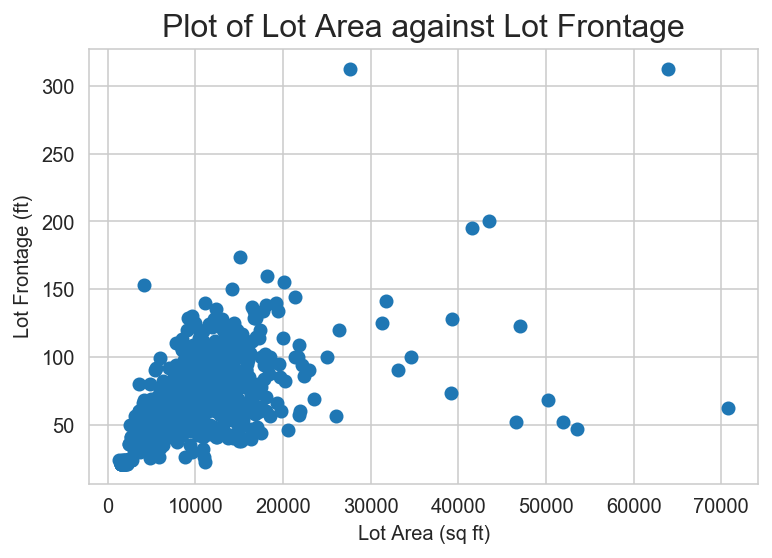

In [10]:
plt.scatter(train['Lot Area'], train['Lot Frontage']);
plt.xlabel('Lot Area (sq ft)');
plt.ylabel('Lot Frontage (ft)');
plt.title('Plot of Lot Area against Lot Frontage', fontsize = 16);

From the scatterplot above, there seems to be a positive correlation between the lot frontage and lot area.  
Since there are 330 missing values for lot frontage, but no missing values for lot area, it may be a good estimate to apply regression imputation and predict the missing values for lot frontage. 

In [11]:
train[train['Lot Frontage'].notna()][['Lot Area']]

Lot Area
1        11492
2         7922
3         9802
4        14235
5        16492
6         3675
9        11606
10        1680
11        7488
12       26400
13        2645
14        9627
15       10114
16        4571
17        8816
18        8197
19        8640
20        8724
21        5664
22       12867
24       34650
25       10573
26        8450
28        8250
29        8064
30        9600
32        9549
33       10950
34       10637
35        9000
36        2665
37       11751
38        9600
39        8428
40        9937
41       13891
43       12150
44       11200
45        9670
46       10998
47        7200
48        9920
49        2448
51        7804
52       16692
53        1476
54       10170
55        9364
56        2544
57        9888
58        7942
60       11764
61        9000
63        7308
64        8750
65        8402
66        4000
67        3363
68       13615
69        3013
70       17485
72        8910
73        2522
74        8688
77        6324
78       11600
79        7288
80        4571
81       17423
82       12665
83        9000
84        4500
85        6373
86       10083
87       13300
88        9600
89        3215
92        9109
93        7018
95        3523
96       15312
97        7450
98        7313
99       10019
100      15401
101       9098
102      16280
103       9392
104      12209
105      13110
107       8520
109       2628
110       6406
112       6240
113      10000
115      11088
116      17755
119      15426
120      13907
121       8750
123       8960
124       3500
126       9056
127      12320
128       8238
129       6000
130       2529
131      10800
132       2349
133      10846
134       5604
135       1680
136       6342
137       4590
138      18062
139      12900
140      19138
143       9525
144      12853
145       6240
146       7301
147      12090
149       8094
151      16056
152       8400
153      11250
154       7535
155      12216
156       3701
157       9760
158       9873
159      10011
162       3000
163       2448
164       7100
165       2592
167       2289
168      12180
170       8842
171       8850
172       9215
173       9480
174      11880
175      10800
178      10542
179       1680
180       8546
181       7407
182      10140
183      14584
184       8158
185       7500
186      10678
187      15256
188      14200
189      12438
190      16023
191      20064
193      10400
194      11643
195      11645
196       7328
197       7822
198       9018
199      13472
201      11003
202      10790
203       7128
204       7713
205       6240
206      22420
207      15300
209       9360
211       9260
212       7993
213       9239
214      10044
215       3182
216       7626
217       7008
218      12160
219       6305
220       8846
222      13108
224       7750
225      12450
227      11198
228       6221
229      13200
230       8769
231      10200
232       9550
233      10331
234       9587
235       9900
237      13000
238       8250
239       8170
240      12048
241      10858
242       7577
243       7500
244       6120
245      23580
246       5306
247       8092
248       8593
249      11067
251       9900
252       4882
254       8772
255       7628
256       8335
257       8220
258      10615
259       6000
260       5350
261       5400
263       9520
264       5330
265       8012
266       9000
267      14299
269       3180
270      16451
271      12887
272      15578
273       7200
274      17043
275      10000
276       8050
277       3182
278       1950
279       7700
280       8731
281       8232
282       2280
283       8935
286      13438
287      11070
288       7800
289       7060
291       8382
292      10192
294       2280
296       8520
297       1596
298      15600
299       9313
300      11064
301       9000
302      12000
303       7692
304      14267
305       9675
306       8400
307       7500
308       9600
312       7550
313       8125
314      13673
315       1533
316       7658
317      12292
318      11923
319      10010
3

In [12]:
train[train['Lot Frontage'].notna()][['Lot Frontage']]

Lot Frontage
1             43.0
2             68.0
3             73.0
4             82.0
5            137.0
6             35.0
9             70.0
10            21.0
11            64.0
12           120.0
13            24.0
14            74.0
15            93.0
16            34.0
17            80.0
18            71.0
19            72.0
20           109.0
21            40.0
22           103.0
24           100.0
25            92.0
26            65.0
28            75.0
29            60.0
30            80.0
32            30.0
33            60.0
34            79.0
35            80.0
36            41.0
37           105.0
38            80.0
39            60.0
40            75.0
41           107.0
43            81.0
44            70.0
45           100.0
46            60.0
47            60.0
48            80.0
49            36.0
51            65.0
52            80.0
53            21.0
54            75.0
55            80.0
56            24.0
57            82.0
58            68.0
60            92.0
61            75.0
63            81.0
64            70.0
65            70.0
66            63.0
67            32.0
68            94.0
69            43.0
70            44.0
72            79.0
73            24.0
74            73.0
77            60.0
78            80.0
79            50.0
80            35.0
81            63.0
82           100.0
83            60.0
84            32.0
85            48.0
86            67.0
87            70.0
88            80.0
89            30.0
92            70.0
93            64.0
95            80.0
96            88.0
97            74.0
98            60.0
99            83.0
100           53.0
101           58.0
102          103.0
103           72.0
104           71.0
105           79.0
107           60.0
109           36.0
110           57.0
112           52.0
113           87.0
115           80.0
116          134.0
119           65.0
120           63.0
121           70.0
123           56.0
124           50.0
126           74.0
127           70.0
128           60.0
129           75.0
130           24.0
131           60.0
132           24.0
133           32.0
134           67.0
135           21.0
136           54.0
137           34.0
138           60.0
139           60.0
140          140.0
143           75.0
144           57.0
145           52.0
146           64.0
147           78.0
149           57.0
151           85.0
152           70.0
153           90.0
154           70.0
155           88.0
156           30.0
157           80.0
158           60.0
159           72.0
162           50.0
163           36.0
164           73.0
165           36.0
167           24.0
168           60.0
170           68.0
171           60.0
172           92.0
173           79.0
174           82.0
175           60.0
178           96.0
179           21.0
180           80.0
181           90.0
182           78.0
183           80.0
184           65.0
185           62.0
186           85.0
187           49.0
188           88.0
189           82.0
190           59.0
191          155.0
193           80.0
194           91.0
195           78.0
196           61.0
197           72.0
198           65.0
199          103.0
201           85.0
202           83.0
203           53.0
204           64.0
205           52.0
206           86.0
207           85.0
209           72.0
211           81.0
212           90.0
213           94.0
214           60.0
215           43.0
216           60.0
217           60.0
218          128.0
219           50.0
220           68.0
222           68.0
224           62.0
225           60.0
227           77.0
228           79.0
229          120.0
230           65.0
231           85.0
232           60.0
233           42.0
234           59.0
235           90.0
237          100.0
238           75.0
239           81.0
240           80.0
241           89.0
242           61.0
243           62.0
244           51.0
245           69.0
246           44.0
247           70.0
248           77.0
249           64.0
251           90.0
252           50

In [13]:
x_lot_area = train[train['Lot Frontage'].notna()][['Lot Area']]
y_lot_frontage = train[train['Lot Frontage'].notna()]['Lot Frontage']

In [14]:
# Regression Imputation for Lot Frontage
reg_lot = LinearRegression()
reg_lot.fit(x_lot_area,y_lot_frontage)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
# Lot frontage missing values 
x_lot_area_miss = train[train['Lot Frontage'].isnull()][['Lot Area']]
x_lot_area_miss.head()

Lot Area
0      13517
7      12160
8      15783
23      7980
27     11700

In [16]:
# Predicted Lot Frontage for Missing Values 
lot_front_predict_array = reg_lot.predict(x_lot_area_miss)
lot_front_predict_array[:10]

array([79.46602844, 75.83841807, 85.52362984, 64.6642019 , 74.60871964,
       73.90030641, 67.66092351, 51.34603324, 83.53205303, 96.9624985 ])

In [17]:
# Converting the array into a series 
lot_front_predict_series = pd.Series(lot_front_predict_array)
lot_front_predict_series

0       79.466028
1       75.838418
2       85.523630
3       64.664202
4       74.608720
5       73.900306
6       67.660924
7       51.346033
8       83.532053
9       96.962498
10     106.768007
11      60.149070
12      90.191137
13      73.015458
14      84.219080
15      81.056617
16      50.418413
17     148.615179
18      76.324951
19      67.390925
20      56.069679
21      71.486355
22      69.917153
23     109.018890
24      66.476670
25      61.769064
26      66.925778
27      71.962195
28     111.069278
29      67.078153
30      58.569175
31      63.113713
32      64.346084
33      74.384166
34      69.580322
35      47.429711
36      51.875338
37      73.381694
38      71.825859
39      79.420583
40      55.361266
41     102.148618
42      75.220896
43      73.868227
44      91.394103
45      62.178072
46      67.725082
47      72.937934
48      74.972283
49      55.163445
50      51.049302
51      58.873926
52      83.056213
53      82.903838
54      76.367723
55      56

In [18]:
train.loc[train['Lot Frontage'].isna(),'Lot Frontage'] = lot_front_predict_series.values

In [19]:
# Values are filled up with predicted values from lot_front_predict_series
train.head(10)

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0   109  533352170           60        RL     79.466028     13517   Pave   
1   544  531379050           60        RL     43.000000     11492   Pave   
2   153  535304180           20        RL     68.000000      7922   Pave   
3   318  916386060           60        RL     73.000000      9802   Pave   
4   255  906425045           50        RL     82.000000     14235   Pave   
5   138  535126040           20        RL    137.000000     16492   Pave   
6  2827  908186070          180        RM     35.000000      3675   Pave   
7   145  535154050           20        RL     75.838418     12160   Pave   
8  1942  535353130           20        RL     85.523630     15783   Pave   
9  1956  535426130           60        RL     70.000000     11606   Pave   

  Alley Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
0   NaN       IR1          Lvl    AllPub    CulDSac        Gtl       Sawyer   
1   NaN       IR1          Lvl    AllPub    CulDSac        Gtl      SawyerW   
2   NaN       Reg          Lvl    AllPub     Inside        Gtl        NAmes   
3   NaN       Reg          Lvl    AllPub     Inside        Gtl       Timber   
4   NaN       IR1          Lvl    AllPub     Inside        Gtl      SawyerW   
5   NaN       IR1          Lvl    AllPub     Corner        Gtl        NAmes   
6   NaN       Reg          Lvl    AllPub     Inside        Gtl      Edwards   
7   NaN       IR1          Lvl    AllPub     Inside        Gtl        NAmes   
8   NaN       Reg          Lvl    AllPub     Inside        Gtl      OldTown   
9   NaN       IR1          HLS    AllPub     Inside        Sev        NAmes   

  Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
0        RRAe        Norm      1Fam      2Story             6             8   
1        Norm        Norm      1Fam      2Story             7             5   
2        Norm        Norm      1Fam      1Story             5             7   
3        Norm        Norm      1Fam      2Story             5             5   
4        Norm        Norm      1Fam      1.5Fin             6             8   
5        PosA        Norm      1Fam      1Story             6             6   
6        Norm        Norm    TwnhsE      SFoyer             6             5   
7        Norm        Norm      1Fam      1Story             5             5   
8      Artery        Norm      1Fam      1Story             5             5   
9        Norm        Norm      1Fam      2Story             5             5   

   Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd  \
0        1976            2005      Gable   CompShg      HdBoard      Plywood   
1        1996            1997      Gable   CompShg      VinylSd      VinylSd   
2        1953            2007      Gable   CompShg      VinylSd      VinylSd   
3        2006            2007      Gable   CompShg      VinylSd      VinylSd   
4        1900            1993      Gable   CompShg      Wd Sdng      Plywood   
5        1966            2002      Gable   CompShg      BrkFace      Plywood   
6        2005            2006      Gable   CompShg      VinylSd      VinylSd   
7        1959            1959        Hip   CompShg      Plywood      Plywood   
8        1952            1952      Gable   CompShg      Wd Sdng      Wd Sdng   
9        1969            1969      Gable   CompShg      Plywood      Plywood   

  Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual  \
0      BrkFace         289.0         Gd         TA     CBlock        TA   
1      BrkFace         132.0         Gd         TA      PConc        Gd   
2         None           0.0         TA         Gd     CBlock        TA   
3         None           0.0         TA         TA      PConc        Gd   
4         None           0.0         TA         TA      PConc        Fa   
5         None           0.0         Gd         TA     CBlock        TA   
6      BrkFace        

In [20]:
lot_front_predict_series[0]

79.46602843837388

### Alley

Variable is nominal and datatype is an object.   
NaN should be replaced into a string.   
'NA' would be used to signify that there is an absence of an alley near the house. 

In [21]:
train[['Alley']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 1 columns):
Alley    140 non-null object
dtypes: object(1)
memory usage: 16.1+ KB


In [22]:
train[['Alley']]

Alley
0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
8      NaN
9      NaN
10     NaN
11     NaN
12     NaN
13    Pave
14     NaN
15     NaN
16    Grvl
17     NaN
18     NaN
19     NaN
20     NaN
21     NaN
22     NaN
23     NaN
24     NaN
25     NaN
26     NaN
27    Grvl
28     NaN
29     NaN
30     NaN
31     NaN
32     NaN
33     NaN
34     NaN
35     NaN
36     NaN
37     NaN
38     NaN
39     NaN
40     NaN
41     NaN
42     NaN
43    Grvl
44     NaN
45     NaN
46    Grvl
47     NaN
48     NaN
49     NaN
50     NaN
51     NaN
52     NaN
53     NaN
54     NaN
55     NaN
56    Pave
57     NaN
58     NaN
59     NaN
60     NaN
61     NaN
62     NaN
63     NaN
64     NaN
65     NaN
66     NaN
67     NaN
68     NaN
69     NaN
70     NaN
71     NaN
72     NaN
73     NaN
74     NaN
75     NaN
76     NaN
77     NaN
78     NaN
79     NaN
80    Grvl
81     NaN
82    Grvl
83     NaN
84     NaN
85     NaN
86     NaN
87     NaN
88     NaN
89    Pave
90     NaN
91     NaN
92     NaN
93     NaN
94     NaN
95    Pave
96     NaN
97     NaN
98     NaN
99     NaN
100    NaN
101    NaN
102    NaN
103    NaN
104    NaN
105    NaN
106    NaN
107   Grvl
108    NaN
109    NaN
110   Grvl
111    NaN
112    NaN
113    NaN
114    NaN
115    NaN
116    NaN
117    NaN
118    NaN
119    NaN
120    NaN
121    NaN
122    NaN
123   Grvl
124   Grvl
125    NaN
126    NaN
127    NaN
128    NaN
129    NaN
130    NaN
131    NaN
132    NaN
133    NaN
134    NaN
135    NaN
136    NaN
137    NaN
138    NaN
139   Grvl
140    NaN
141    NaN
142    NaN
143    NaN
144   Pave
145    NaN
146    NaN
147    NaN
148    NaN
149   Grvl
150    NaN
151    NaN
152    NaN
153    NaN
154    NaN
155    NaN
156    NaN
157    NaN
158    NaN
159    NaN
160    NaN
161    NaN
162   Grvl
163    NaN
164    NaN
165    NaN
166    NaN
167    NaN
168    NaN
169    NaN
170    NaN
171   Pave
172    NaN
173    NaN
174    NaN
175    NaN
176    NaN
177    NaN
178    NaN
179    NaN
180    NaN
181    NaN
182    NaN
183    NaN
184    NaN
185   Pave
186    NaN
187    NaN
188    NaN
189    NaN
190    NaN
191    NaN
192    NaN
193    NaN
194    NaN
195    NaN
196    NaN
197    NaN
198    NaN
199    NaN
200    NaN
201    NaN
202    NaN
203    NaN
204    NaN
205    NaN
206    NaN
207    NaN
208    NaN
209    NaN
210    NaN
211    NaN
212    NaN
213    NaN
214    NaN
215    NaN
216    NaN
217    NaN
218    NaN
219    NaN
220    NaN
221    NaN
222    NaN
223    NaN
224    NaN
225    NaN
226    NaN
227    NaN
228    NaN
229    NaN
230    NaN
231    NaN
232    NaN
233    NaN
234    NaN
235    NaN
236    NaN
237    NaN
238    NaN
239    NaN
240    NaN
241    NaN
242    NaN
243   Pave
244    NaN
245    NaN
246    NaN
247    NaN
248    NaN
249    NaN
250    NaN
251    NaN
252    NaN
253    NaN
254    NaN
255    NaN
256    NaN
257    NaN
258    NaN
259    NaN
260    NaN
261    NaN
262    NaN
263    NaN
264    NaN
265    NaN
266    NaN
267    NaN
268    NaN
269   Pave
270    NaN
271    NaN
272    NaN
273    NaN
274    NaN
275    NaN
276    NaN
277    NaN
278    NaN
279    NaN
280    NaN
281    NaN
282    NaN
283    NaN
284    NaN
285    NaN
286    NaN
287    NaN
288    NaN
289    NaN
290    NaN
291    NaN
292    NaN
293    NaN
294    NaN
295    NaN
296    NaN
297    NaN
298    NaN
299    NaN
300    NaN
301    NaN
302    NaN
303    NaN
304    NaN
305    NaN
306    NaN
307    NaN
308   Grvl
309    NaN
310    NaN
311    NaN
312    NaN
313    NaN
314    NaN
315    NaN
316    NaN
317    NaN
318    NaN
319    NaN
320    NaN
321    NaN
322    NaN
323    NaN
324    NaN
325    NaN
326    NaN
327    NaN
328    NaN
329    NaN
330    NaN
331    NaN
332    NaN
333   Pave
334    NaN
335    NaN
336   Grvl
337    NaN
338    NaN
339    NaN
340    NaN
341    NaN
342    NaN
343    NaN
344    NaN
345    NaN
346    NaN
347    NaN
348    NaN
349    NaN
350    NaN
351    NaN
352    NaN
353    NaN
354    NaN
355    NaN
356    NaN
357    NaN
358    NaN
359    NaN
360    NaN
361    NaN
362    NaN
3

In [23]:
train['Alley'] = train['Alley'].replace(np.nan,'NA')
train[['Alley']].head()

Alley
0    NA
1    NA
2    NA
3    NA
4    NA

### Masonry Veneer

Variables include type (Nominal) and area (Continuous).  
For the 22 missing Masonry Veneer Values, both data for type and value are missing in pairs.  
An absence of a Masonry Veneer is represented by 'None' under the type column. In this case, it might be a good choice to assume that the missing cells (NaN) are because of no Masonry Veneer in the house.   
NaN should be replaced into a string ('None') for Masonry Veneer type.  
NaN should be replaced into float/int for area. 

In [24]:
train[['Mas Vnr Type','Mas Vnr Area']].head()

Mas Vnr Type  Mas Vnr Area
0      BrkFace         289.0
1      BrkFace         132.0
2         None           0.0
3         None           0.0
4         None           0.0

In [25]:
train['Mas Vnr Type'] = train['Mas Vnr Type'].fillna('None')
train['Mas Vnr Area'] = train['Mas Vnr Area'].fillna(0)
train[['Mas Vnr Type','Mas Vnr Area']].isnull().sum()

Mas Vnr Type    0
Mas Vnr Area    0
dtype: int64

There are some data in which the house Mas Vnr Type is 'None', and yet there is a value to the area. We should assume for a house that registers a 'None' for Mas Vnr Type, the Mas Vnr Area should be 0.0 for consistency purposes. 

In [26]:
train.loc[(train['Mas Vnr Type']=='None')&(train['Mas Vnr Area']>0)][['Mas Vnr Type','Mas Vnr Area']]

Mas Vnr Type  Mas Vnr Area
765          None           1.0
810          None         288.0
1148         None           1.0
1684         None           1.0
1832         None         344.0

In [27]:
train.loc[765, 'Mas Vnr Area'] = 0
train.loc[810, 'Mas Vnr Area'] = 0
train.loc[1148, 'Mas Vnr Area'] = 0
train.loc[1684, 'Mas Vnr Area'] = 0
train.loc[1832, 'Mas Vnr Area'] = 0

train.loc[765, 'Mas Vnr Area']

0.0

### Basement

Datatypes:
- Bsmt Qual (Ordinal): Evaluates the height of the basement	
- Bsmt Cond (Ordinal): Evaluates the general condition of the basement
- Bsmt Exposure	(Ordinal): Refers to walkout or garden level walls
- BsmtFin Type 1	(Ordinal): Rating of basement finished area
- BsmtFin SF 1 (Continuous): Type 1 finished square feet
- BsmtFinType 2	(Ordinal): Rating of basement finished area (if multiple types)
- BsmtFin SF 2 (Continuous): Type 2 finished square feet
- Bsmt Unf SF (Continuous): Unfinished square feet of basement area
- Total Bsmt SF (Continuous): Total square feet of basement area  
  
55 Values regarding the basement data are regarded as NaN. According to the CSV file, these datatypes were registered as NA before they were imported in. The missing values should be replaced with 'NA' for the ordinal datatypes and 0.0 for the continuous types. 

In [28]:
train['Bsmt Qual'] = train['Bsmt Qual'].fillna('NA')
train['Bsmt Cond'] = train['Bsmt Cond'].fillna('NA')
train['Bsmt Exposure'] = train['Bsmt Exposure'].fillna('NA')
train['BsmtFin Type 1'] = train['BsmtFin Type 1'].fillna('NA')
train['BsmtFin SF 1'] = train['BsmtFin SF 1'].fillna(0)
train['BsmtFin Type 2'] = train['BsmtFin Type 2'].fillna('NA')
train['BsmtFin SF 2'] = train['BsmtFin SF 2'].fillna(0)
train['Bsmt Unf SF'] = train['Bsmt Unf SF'].fillna(0)
train['Total Bsmt SF'] = train['Total Bsmt SF'].fillna(0)


In [29]:
train.loc[(train['Bsmt Qual']=='NA')][['Id','Bsmt Qual', 'Bsmt Cond','Bsmt Exposure','BsmtFin Type 1','BsmtFin SF 1','BsmtFin Type 2','BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF']]

Id Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1  \
12     807        NA        NA            NA             NA           0.0   
93     811        NA        NA            NA             NA           0.0   
114    781        NA        NA            NA             NA           0.0   
146    888        NA        NA            NA             NA           0.0   
183   1554        NA        NA            NA             NA           0.0   
240   2740        NA        NA            NA             NA           0.0   
249   2242        NA        NA            NA             NA           0.0   
256   2745        NA        NA            NA             NA           0.0   
390     84        NA        NA            NA             NA           0.0   
437   1501        NA        NA            NA             NA           0.0   
485    155        NA        NA            NA             NA           0.0   
499    812        NA        NA            NA             NA           0.0   
514   2082        NA        NA            NA             NA           0.0   
580   1504        NA        NA            NA             NA           0.0   
581    946        NA        NA            NA             NA           0.0   
616   1498        NA        NA            NA             NA           0.0   
635   2904        NA        NA            NA             NA           0.0   
642    953        NA        NA            NA             NA           0.0   
696    274        NA        NA            NA             NA           0.0   
700    207        NA        NA            NA             NA           0.0   
737    788        NA        NA            NA             NA           0.0   
772    679        NA        NA            NA             NA           0.0   
790   1205        NA        NA            NA             NA           0.0   
794   1255        NA        NA            NA             NA           0.0   
924    677        NA        NA            NA             NA           0.0   
933   1375        NA        NA            NA             NA           0.0   
954   2622        NA        NA            NA             NA           0.0   
1007  1880        NA        NA            NA             NA           0.0   
1022  2703        NA        NA            NA             NA           0.0   
1049  2177        NA        NA            NA             NA           0.0   
1089   709        NA        NA            NA             NA           0.0   
1098  1260        NA        NA            NA             NA           0.0   
1125  2626        NA        NA            NA             NA           0.0   
1157   897        NA        NA            NA             NA           0.0   
1211  2893        NA        NA            NA             NA           0.0   
1222  1326        NA        NA            NA             NA           0.0   
1252   244        NA        NA            NA             NA           0.0   
1256   813        NA        NA            NA             NA           0.0   
1270  1569        NA        NA            NA             NA           0.0   
1327  1342        NA        NA            NA             NA           0.0   
1331   650        NA        NA            NA             NA           0.0   
1377  2707        NA        NA            NA             NA           0.0   
1387   787        NA        NA            NA             NA           0.0   
1428  1902        NA        NA            NA             NA           0.0   
1481  2701        NA        NA            NA             NA           0.0   
1594  1502        NA        NA            NA             NA           0.0   
1620   815        NA        NA            NA             NA           0.0   
1681  1899        NA        NA            NA             NA           0.0   
1684  2004        NA        NA            NA             NA           0.0   
1686  2627        NA        NA            NA             NA           0.0   
1859  2625        NA        NA            NA             NA           0.0   
1875

- Bsmt Full Bath (Discrete): Basement full bathrooms

- Bsmt Half Bath (Discrete): Basement half bathrooms

In [30]:
train[['Bsmt Full Bath','Bsmt Half Bath']].isnull().sum()

Bsmt Full Bath    2
Bsmt Half Bath    2
dtype: int64

In [31]:
train[train['Bsmt Full Bath'].isnull()]

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
616   1498  908154080           20        RL         123.0     47007   Pave   
1327  1342  903230120           20        RM          99.0      5940   Pave   

     Alley Lot Shape Land Contour Utilities Lot Config Land Slope  \
616     NA       IR1          Lvl    AllPub     Inside        Gtl   
1327    NA       IR1          Lvl    AllPub        FR3        Gtl   

     Neighborhood Condition 1 Condition 2 Bldg Type House Style  Overall Qual  \
616       Edwards        Norm        Norm      1Fam      1Story             5   
1327      BrkSide       Feedr        Norm      1Fam      1Story             4   

      Overall Cond  Year Built  Year Remod/Add Roof Style Roof Matl  \
616              7        1959            1996      Gable   CompShg   
1327             7        1946            1950      Gable   CompShg   

     Exterior 1st Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual  \
616       Plywood      Plywood         None           0.0         TA   
1327      MetalSd       CBlock         None           0.0         TA   

     Exter Cond Foundation Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1  \
616          TA       Slab        NA        NA            NA             NA   
1327         TA      PConc        NA        NA            NA             NA   

      BsmtFin SF 1 BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF  \
616            0.0             NA           0.0          0.0            0.0   
1327           0.0             NA           0.0          0.0            0.0   

     Heating Heating QC Central Air Electrical  1st Flr SF  2nd Flr SF  \
616     GasA         TA           Y      SBrkr        3820           0   
1327    GasA         TA           Y      FuseA         896           0   

      Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath  Full Bath  \
616                 0         3820             NaN             NaN          3   
1327                0          896             NaN             NaN          1   

      Half Bath  Bedroom AbvGr  Kitchen AbvGr Kitchen Qual  TotRms AbvGrd  \
616           1              5              1           Ex             11   
1327          0              2              1           TA              4   

     Functional  Fireplaces Fireplace Qu Garage Type  Garage Yr Blt  \
616         Typ           2           Gd      Attchd         1959.0   
1327        Typ           0          NaN      Detchd         1946.0   

     Garage Finish  Garage Cars  Garage Area Garage Qual Garage Cond  \
616            Unf          2.0        624.0          TA          TA   
1327           Unf          1.0        280.0          TA          TA   

     Paved Drive  Wood Deck SF  Open Porch SF  Enclosed Porch  3Ssn Porch  \
616            Y             0            372               0           0   
1327           Y             0              0               0           0   

      Screen Porch  Pool Area Pool QC  Fence Misc Feature  Misc Val  Mo Sold  \
616              0          0     NaN    NaN          NaN         0        7   
1327             0          0     NaN  MnPrv          NaN         0        4   

      Yr Sold Sale Type  SalePrice  
616      2008       WD      284700  
1327     2008     ConLD      79000

Housing IDs missing 'Bsmt Full Bath' and 'Bsmt Half Bath' data is shown not to have any basement under 'Bsmt Qual'.  
Values should be converted from NaN to 0.0

In [32]:
train['Bsmt Full Bath'] = train['Bsmt Full Bath'].fillna(0)
train['Bsmt Half Bath'] = train['Bsmt Half Bath'].fillna(0)

### Fireplace

If 'Fireplace' is registered as 0, 'Fireplace Qu' will show up as NaN.  
For missing values in 'Fireplace Qu', 'NA' can be filled up in place. 

In [33]:
train[['Fireplaces','Fireplace Qu']].head()

Fireplaces Fireplace Qu
0           0          NaN
1           1           TA
2           0          NaN
3           0          NaN
4           0          NaN

In [34]:
train['Fireplace Qu']=train['Fireplace Qu'].fillna('NA')

In [35]:
train[['Fireplaces','Fireplace Qu']].head()

Fireplaces Fireplace Qu
0           0           NA
1           1           TA
2           0           NA
3           0           NA
4           0           NA

### Garage

Under 'Garage Types', we can assume that the NaN values constitute to no garage.    
From this premise, we can deduce that the rest of the garage data should be imputed to represent no garage.    
Continuous/ Discrete variables can be replaced with 0.  
Categorical variables can be replaced with 'NA'   

In [36]:
train[['Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars','Garage Area','Garage Qual','Garage Cond']].head()     

Garage Type  Garage Yr Blt Garage Finish  Garage Cars  Garage Area  \
0      Attchd         1976.0           RFn          2.0        475.0   
1      Attchd         1997.0           RFn          2.0        559.0   
2      Detchd         1953.0           Unf          1.0        246.0   
3     BuiltIn         2007.0           Fin          2.0        400.0   
4      Detchd         1957.0           Unf          2.0        484.0   

  Garage Qual Garage Cond  
0          TA          TA  
1          TA          TA  
2          TA          TA  
3          TA          TA  
4          TA          TA

In [37]:
train['Garage Type'] = train['Garage Type'].fillna('NA')
train['Garage Yr Blt'] = train['Garage Yr Blt'].fillna(0)
train['Garage Finish'] = train['Garage Finish'].fillna('NA')
train['Garage Cars'] = train['Garage Cars'].fillna(0)
train['Garage Area'] = train['Garage Area'].fillna(0)
train['Garage Qual'] = train['Garage Qual'].fillna('NA')
train['Garage Cond'] = train['Garage Cond'].fillna('NA')

### Pool

The 'Pool Area' data is stored as 0 when 'Pool QC' data is missing. From this, we can deduce that an absence of value would mean that there is no pool. NaN values should be replaced with 'NA'.

In [38]:
train['Pool QC'] = train['Pool QC'].fillna('NA')
train['Pool Area'] = train['Pool Area'].fillna(0)

In [39]:
train [['Pool Area', 'Pool QC']].head()

Pool Area Pool QC
0          0      NA
1          0      NA
2          0      NA
3          0      NA
4          0      NA

### Fence

Missing values due to no fence. NaN values should be replaced with 'NA'. 

In [40]:
train['Fence'] = train['Fence'].fillna('NA')

In [41]:
train [['Fence']].head()

Fence
0    NA
1    NA
2    NA
3    NA
4    NA

### Miscellaneous Feature

Missing Values due to no Miscellaneous Feature. NaN values should be replace with 'NA'. 

In [42]:
train['Misc Feature'] = train['Misc Feature'].fillna('NA')

In [43]:
train [['Misc Feature']].head()

Misc Feature
0           NA
1           NA
2           NA
3           NA
4           NA

In [44]:
# Checks on whether there is any remaining null values. 
train.isnull().sum()

Id                 0
PID                0
MS SubClass        0
MS Zoning          0
Lot Frontage       0
Lot Area           0
Street             0
Alley              0
Lot Shape          0
Land Contour       0
Utilities          0
Lot Config         0
Land Slope         0
Neighborhood       0
Condition 1        0
Condition 2        0
Bldg Type          0
House Style        0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
Roof Style         0
Roof Matl          0
Exterior 1st       0
Exterior 2nd       0
Mas Vnr Type       0
Mas Vnr Area       0
Exter Qual         0
Exter Cond         0
Foundation         0
Bsmt Qual          0
Bsmt Cond          0
Bsmt Exposure      0
BsmtFin Type 1     0
BsmtFin SF 1       0
BsmtFin Type 2     0
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
Heating            0
Heating QC         0
Central Air        0
Electrical         0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area  

In [45]:
train.dtypes

Id                   int64
PID                  int64
MS SubClass          int64
MS Zoning           object
Lot Frontage       float64
Lot Area             int64
Street              object
Alley               object
Lot Shape           object
Land Contour        object
Utilities           object
Lot Config          object
Land Slope          object
Neighborhood        object
Condition 1         object
Condition 2         object
Bldg Type           object
House Style         object
Overall Qual         int64
Overall Cond         int64
Year Built           int64
Year Remod/Add       int64
Roof Style          object
Roof Matl           object
Exterior 1st        object
Exterior 2nd        object
Mas Vnr Type        object
Mas Vnr Area       float64
Exter Qual          object
Exter Cond          object
Foundation          object
Bsmt Qual           object
Bsmt Cond           object
Bsmt Exposure       object
BsmtFin Type 1      object
BsmtFin SF 1       float64
BsmtFin Type 2      object
B

In [46]:
# Renaming Columns
lowercase = {column:column.lower().replace(' ','_') for column in train.columns}
train.rename(columns=lowercase,inplace=True)

In [47]:
train.head()

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street alley  \
0  109  533352170           60        RL     79.466028     13517   Pave    NA   
1  544  531379050           60        RL     43.000000     11492   Pave    NA   
2  153  535304180           20        RL     68.000000      7922   Pave    NA   
3  318  916386060           60        RL     73.000000      9802   Pave    NA   
4  255  906425045           50        RL     82.000000     14235   Pave    NA   

  lot_shape land_contour utilities lot_config land_slope neighborhood  \
0       IR1          Lvl    AllPub    CulDSac        Gtl       Sawyer   
1       IR1          Lvl    AllPub    CulDSac        Gtl      SawyerW   
2       Reg          Lvl    AllPub     Inside        Gtl        NAmes   
3       Reg          Lvl    AllPub     Inside        Gtl       Timber   
4       IR1          Lvl    AllPub     Inside        Gtl      SawyerW   

  condition_1 condition_2 bldg_type house_style  overall_qual  overall_cond  \
0        RRAe        Norm      1Fam      2Story             6             8   
1        Norm        Norm      1Fam      2Story             7             5   
2        Norm        Norm      1Fam      1Story             5             7   
3        Norm        Norm      1Fam      2Story             5             5   
4        Norm        Norm      1Fam      1.5Fin             6             8   

   year_built  year_remod/add roof_style roof_matl exterior_1st exterior_2nd  \
0        1976            2005      Gable   CompShg      HdBoard      Plywood   
1        1996            1997      Gable   CompShg      VinylSd      VinylSd   
2        1953            2007      Gable   CompShg      VinylSd      VinylSd   
3        2006            2007      Gable   CompShg      VinylSd      VinylSd   
4        1900            1993      Gable   CompShg      Wd Sdng      Plywood   

  mas_vnr_type  mas_vnr_area exter_qual exter_cond foundation bsmt_qual  \
0      BrkFace         289.0         Gd         TA     CBlock        TA   
1      BrkFace         132.0         Gd         TA      PConc        Gd   
2         None           0.0         TA         Gd     CBlock        TA   
3         None           0.0         TA         TA      PConc        Gd   
4         None           0.0         TA         TA      PConc        Fa   

  bsmt_cond bsmt_exposure bsmtfin_type_1  bsmtfin_sf_1 bsmtfin_type_2  \
0        TA            No            GLQ         533.0            Unf   
1        TA            No            GLQ         637.0            Unf   
2        TA            No            GLQ         731.0            Unf   
3        TA            No            Unf           0.0            Unf   
4        Gd            No            Unf           0.0            Unf   

   bsmtfin_sf_2  bsmt_unf_sf  total_bsmt_sf heating heating_qc central_air  \
0           0.0        192.0          725.0    GasA         Ex           Y   
1           0.0        276.0          913.0    GasA         Ex           Y   
2           0.0        326.0         1057.0    GasA         TA           Y   
3           0.0        384.0          384.0    GasA         Gd           Y   
4           0.0        676.0          676.0    GasA         TA           Y   

  electrical  1st_flr_sf  2nd_flr_sf  low_qual_fin_sf  gr_liv_area  \
0      SBrkr         725         754                0         1479   
1      SBrkr         913        1209                0         2122   
2      SBrkr        1057           0                0         1057   
3      SBrkr         744         700                0         1444   
4      SBrkr         831         614                0         1445   

   bsmt_full_bath  bsmt_half_bath  full_bath  half_bath  bedroom_abvgr  \
0             0.0             0.0          2          1              3   
1             1.0             0.0          2          1              4   
2             1.0             0.0          1          0              3   
3             0.0             0.0          2  

### Changing Ordinal Variables to Numerical Types 


For the datatypes that are set as an ordinal object (e.g. Excellent, Good, Fair etc.), we would want to convert them into numerical values so that we can include these variables into our models. 

In [48]:
# Columns of all ordinal variables
ordinal_col = ['lot_shape', 'utilities', 'land_slope', 'exter_qual', 'exter_cond', 
       'bsmt_qual', 'bsmt_cond', 'bsmt_exposure','bsmtfin_type_1', 'bsmtfin_type_2',  
       'heating_qc', 'electrical', 'kitchen_qual', 'functional', 'fireplace_qu',
       'garage_finish', 'garage_qual', 'garage_cond', 'paved_drive', 'pool_qc','fence']

In [49]:
# Checking column datatypes
train[['lot_shape', 'utilities', 'land_slope', 'exter_qual', 'exter_cond', 
       'bsmt_qual', 'bsmt_cond', 'bsmt_exposure','bsmtfin_type_1', 'bsmtfin_type_2', 'heating_qc', 'electrical', 'kitchen_qual', 'functional', 'fireplace_qu',
       'garage_finish', 'garage_qual', 'garage_cond', 'paved_drive', 'pool_qc','fence']].dtypes

lot_shape         object
utilities         object
land_slope        object
exter_qual        object
exter_cond        object
bsmt_qual         object
bsmt_cond         object
bsmt_exposure     object
bsmtfin_type_1    object
bsmtfin_type_2    object
heating_qc        object
electrical        object
kitchen_qual      object
functional        object
fireplace_qu      object
garage_finish     object
garage_qual       object
garage_cond       object
paved_drive       object
pool_qc           object
fence             object
dtype: object

In [50]:
# List of dictionaries which correspond to the order in ordinal_col. Ordinal Objects types are changed to numeric types. 
ordinals =  [{'Reg':4, 'IR1':3, 'IR2':2, 'IR3':1},
             {'AllPub':4, 'NoSewr':3, 'NoSeWa':2, 'ELO':1},
             {'Gtl':3, 'Mod':2, 'Sev':1},
             {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},
             {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},
             {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0},
             {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0},
             {'Gd':4, 'Av':3, 'Mn':2, 'No':1, 'NA':0},
             {'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'NA':0},
             {'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'NA':0},
             {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},
             {'SBrkr':5, 'FuseA':4, 'FuseF':3, 'FuseP':2, 'Mix':1},
             {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},
             {'Typ':7, 'Min1':6, 'Min2':5, 'Mod':4, 'Maj1':3, 'Maj2':2, 'Sev':1, 'Sal':0},
             {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0},
             {'Fin':3, 'RFn':2, 'Unf':1, 'NA':0},
             {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0},
             {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0},
             {'Y':3, 'P':2, 'N':1},
             {'Ex':4, 'Gd':3, 'TA':2, 'Fa':1, 'NA':0},
             {'GdPrv':4, 'MnPrv':3, 'GdWo':2, 'MnWw':1, 'NA':0}]


In [51]:
# Loop to replace ordinal object datatypes to numerical 
for i in range(len(ordinals)): 
    train[ordinal_col[i]].replace(ordinals[i], inplace=True)

In [52]:
train[['lot_shape', 'utilities', 'land_slope', 'exter_qual', 'exter_cond', 
       'bsmt_qual', 'bsmt_cond', 'bsmt_exposure','bsmtfin_type_1', 'bsmtfin_type_2', 
       'heating_qc', 'electrical', 'kitchen_qual', 'functional', 'fireplace_qu',
       'garage_finish', 'garage_qual', 'garage_cond', 'paved_drive', 'pool_qc','fence']].dtypes

lot_shape          int64
utilities         object
land_slope         int64
exter_qual        object
exter_cond         int64
bsmt_qual          int64
bsmt_cond          int64
bsmt_exposure      int64
bsmtfin_type_1     int64
bsmtfin_type_2     int64
heating_qc         int64
electrical         int64
kitchen_qual      object
functional         int64
fireplace_qu       int64
garage_finish      int64
garage_qual        int64
garage_cond        int64
paved_drive        int64
pool_qc            int64
fence              int64
dtype: object

In [53]:
# Convert remaining ordinal columns to numeric type. 
train[['utilities']] = train[['utilities']].astype(int)
train[['exter_qual']] = train[['exter_qual']].astype(int)
train[['kitchen_qual']] = train[['kitchen_qual']].astype(int)


In [54]:
# Final Check for Ordinal Datatypes 
train[['lot_shape', 'utilities', 'land_slope', 'exter_qual', 'exter_cond', 
       'bsmt_qual', 'bsmt_cond', 'bsmt_exposure','bsmtfin_type_1', 'bsmtfin_type_2', 
       'heating_qc', 'electrical', 'kitchen_qual', 'functional', 'fireplace_qu',
       'garage_finish', 'garage_qual', 'garage_cond', 'paved_drive', 'pool_qc','fence']].dtypes

lot_shape         int64
utilities         int32
land_slope        int64
exter_qual        int32
exter_cond        int64
bsmt_qual         int64
bsmt_cond         int64
bsmt_exposure     int64
bsmtfin_type_1    int64
bsmtfin_type_2    int64
heating_qc        int64
electrical        int64
kitchen_qual      int32
functional        int64
fireplace_qu      int64
garage_finish     int64
garage_qual       int64
garage_cond       int64
paved_drive       int64
pool_qc           int64
fence             int64
dtype: object

In [55]:
train.dtypes

id                   int64
pid                  int64
ms_subclass          int64
ms_zoning           object
lot_frontage       float64
lot_area             int64
street              object
alley               object
lot_shape            int64
land_contour        object
utilities            int32
lot_config          object
land_slope           int64
neighborhood        object
condition_1         object
condition_2         object
bldg_type           object
house_style         object
overall_qual         int64
overall_cond         int64
year_built           int64
year_remod/add       int64
roof_style          object
roof_matl           object
exterior_1st        object
exterior_2nd        object
mas_vnr_type        object
mas_vnr_area       float64
exter_qual           int32
exter_cond           int64
foundation          object
bsmt_qual            int64
bsmt_cond            int64
bsmt_exposure        int64
bsmtfin_type_1       int64
bsmtfin_sf_1       float64
bsmtfin_type_2       int64
b

In [56]:
# Exporting cleaned train data
train.to_csv('datasets/train_clean.csv',index=False)

## Exploratory Data Analysis 

### Housing Sale Price Distribution

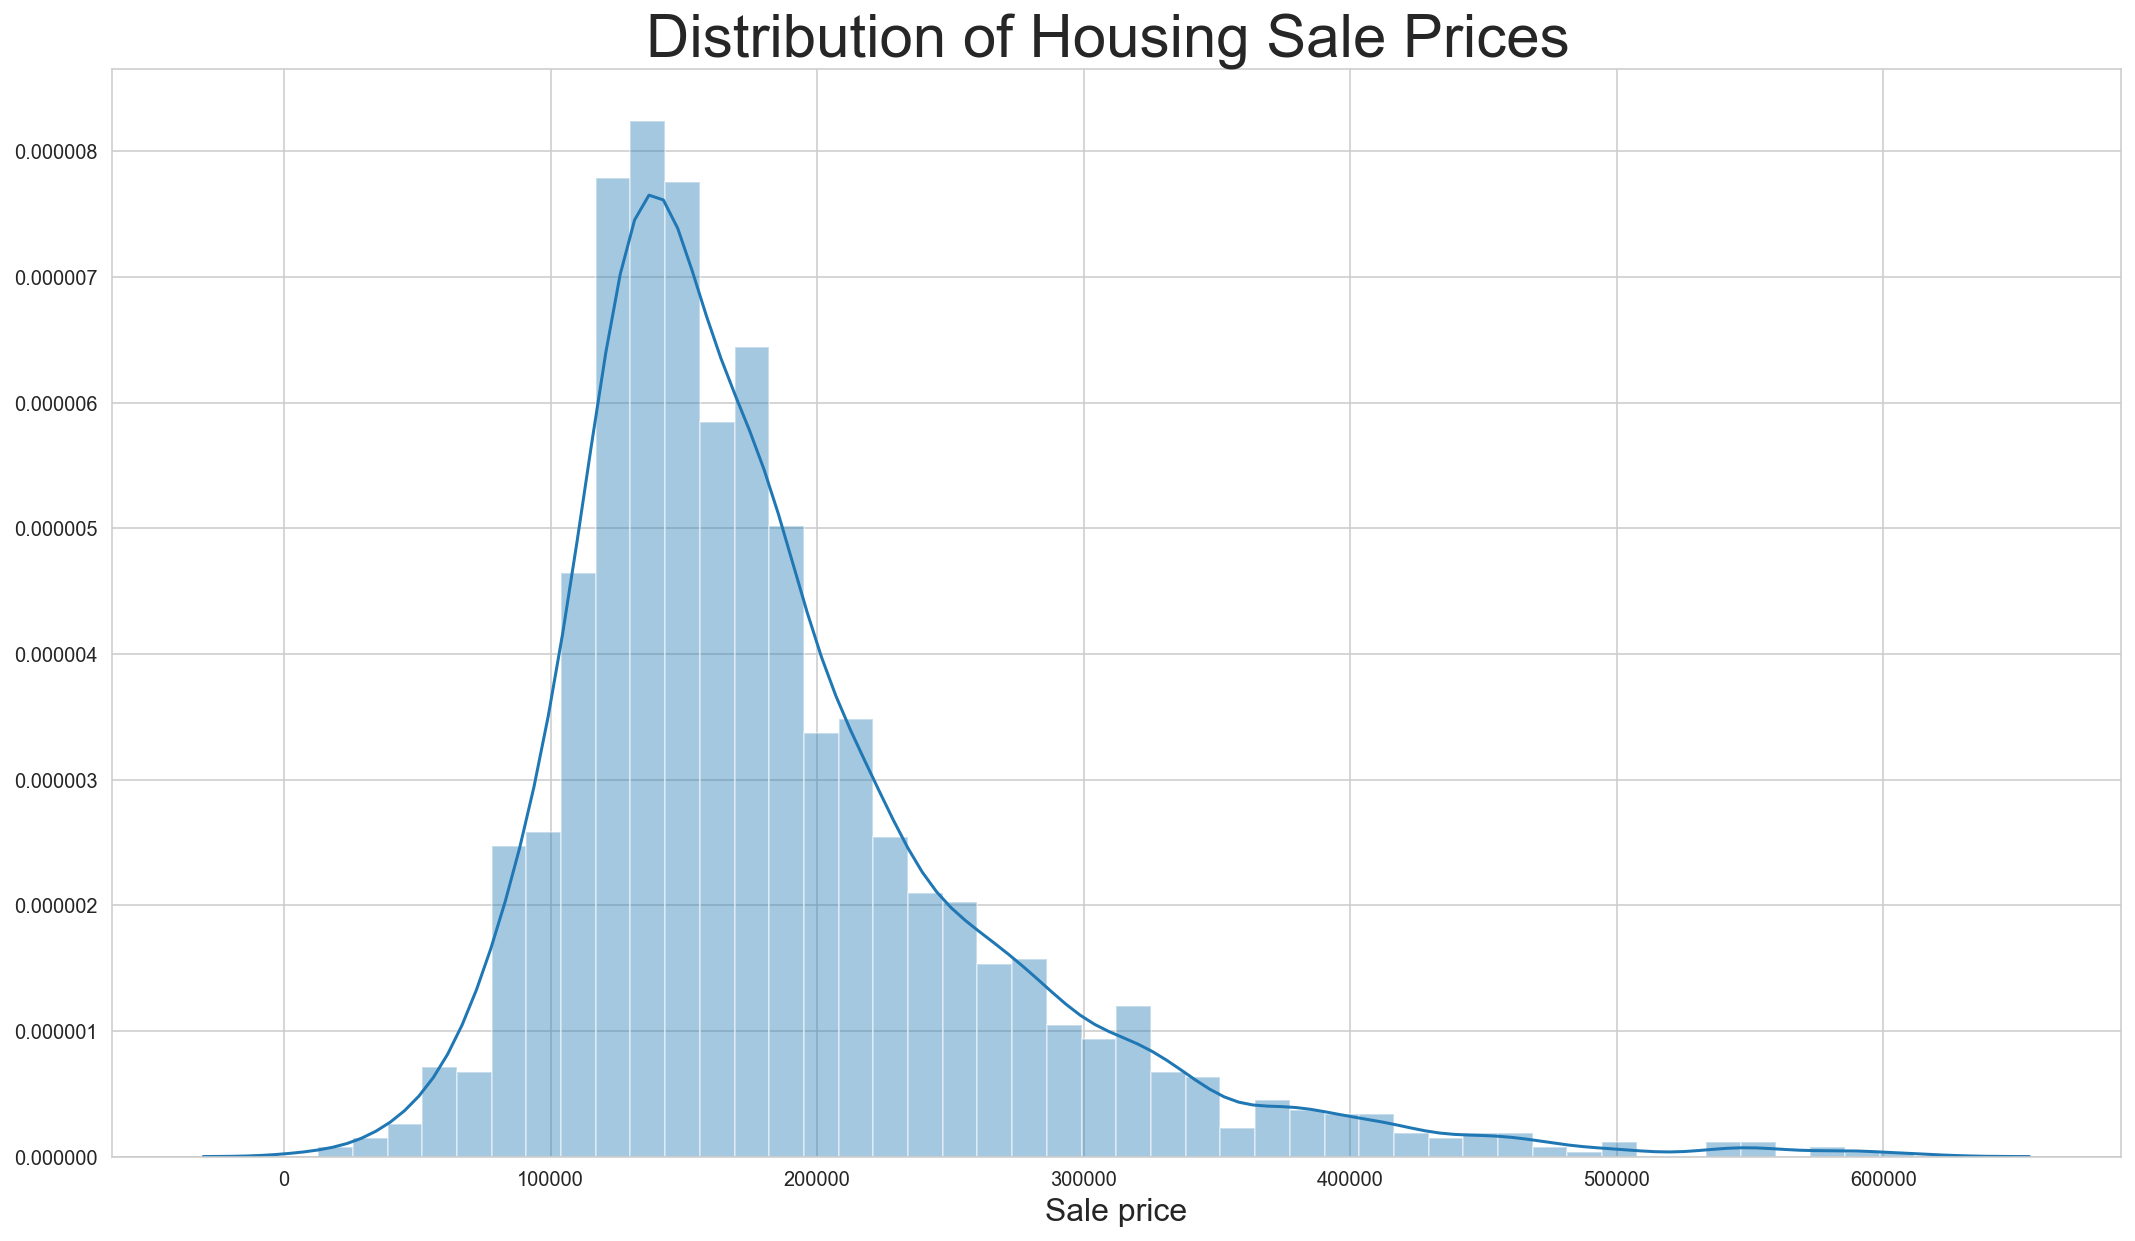

In [57]:
plt.figure(figsize = (18,10));
sns.distplot(train['saleprice']);
plt.title('Distribution of Housing Sale Prices ', fontsize=30);
plt.xlabel('Sale price', fontsize=16);

The housing sale prices mimics somewhat of a normal distribution. The distribution is slightly skewed to the right, with more outliers toward the right of the curve than the left. Sale prices are concentrated around 150k - 160k, which is where the median for houses is at. 

### Types of Variables

### Summary Statistics

In [58]:
train.describe()

id           pid  ms_subclass  lot_frontage       lot_area  \
count  2051.000000  2.051000e+03  2051.000000   2051.000000    2051.000000   
mean   1474.033642  7.135900e+08    57.008776     70.238500   10065.208191   
std     843.980841  1.886918e+08    42.824223     25.085021    6742.488909   
min       1.000000  5.263011e+08    20.000000     21.000000    1300.000000   
25%     753.500000  5.284581e+08    20.000000     60.000000    7500.000000   
50%    1486.000000  5.354532e+08    50.000000     69.091116    9430.000000   
75%    2198.000000  9.071801e+08    70.000000     80.000000   11513.500000   
max    2930.000000  9.241520e+08   190.000000    468.379543  159000.000000   

         lot_shape    utilities   land_slope  overall_qual  overall_cond  \
count  2051.000000  2051.000000  2051.000000   2051.000000   2051.000000   
mean      3.595807     3.998537     2.947343      6.112140      5.562165   
std       0.566514     0.049365     0.244264      1.426271      1.104497   
min       1.000000     2.000000     1.000000      1.000000      1.000000   
25%       3.000000     4.000000     3.000000      5.000000      5.000000   
50%       4.000000     4.000000     3.000000      6.000000      5.000000   
75%       4.000000     4.000000     3.000000      7.000000      6.000000   
max       4.000000     4.000000     3.000000     10.000000      9.000000   

        year_built  year_remod/add  mas_vnr_area   exter_qual   exter_cond  \
count  2051.000000     2051.000000   2051.000000  2051.000000  2051.000000   
mean   1971.708922     1984.190151     98.316919     3.406143     3.085812   
std      30.177889       21.036250    174.218010     0.587962     0.372792   
min    1872.000000     1950.000000      0.000000     2.000000     1.000000   
25%    1953.500000     1964.500000      0.000000     3.000000     3.000000   
50%    1974.000000     1993.000000      0.000000     3.000000     3.000000   
75%    2001.000000     2004.000000    158.000000     4.000000     3.000000   
max    2010.000000     2010.000000   1600.000000     5.000000     5.000000   

         bsmt_qual    bsmt_cond  bsmt_exposure  bsmtfin_type_1  bsmtfin_sf_1  \
count  2051.000000  2051.000000    2051.000000     2051.000000   2051.000000   
mean      3.490005     2.929303       1.628961        3.564603    442.084837   
std       0.901637     0.572009       1.079440        2.125592    461.195041   
min       0.000000     0.000000       0.000000        0.000000      0.000000   
25%       3.000000     3.000000       1.000000        1.000000      0.000000   
50%       4.000000     3.000000       1.000000        4.000000    368.000000   
75%       4.000000     3.000000       2.000000        6.000000    733.500000   
max       5.000000     5.000000       4.000000        6.000000   5644.000000   

       bsmtfin_type_2  bsmtfin_sf_2  bsmt_unf_sf  total_bsmt_sf   heating_qc  \
count     2051.000000   2051.000000  2051.000000    2051.000000  2051.000000   
mean         1.274500     47.935641   567.451487    1057.471965     4.158459   
std          0.949571    164.964052   445.022846     449.908003     0.964112   
min          0.000000      0.000000     0.000000       0.000000     1.000000   
25%          1.000000      0.000000   220.000000     793.000000     3.000000   
50%          1.000000      0.000000   474.000000     994.000000     5.000000   
75%          1.000000      0.000000   811.000000    1318.500000     5.000000   
max          6.000000   1474.000000  2336.000000    6110.000000     5.000000   

        electrical   1st_flr_sf   2nd_flr_sf  low_qual_fin_sf  gr_liv_area  \
count  2051.000000  2051.000000  2051.000000      2051.000000  2051.000000   
mean      4.885422  1164.488055   329.329108         5.512921  1499.330083   
std       0.402477   396.446923   425.671046        51.068870   500.447829   
min       1.000000   334.000000     0.000000         0.000000   334.000000   
25%       5.000000   879.500000     0.000000         0.000000  1129.000000   
50%       5.000

In [59]:
# Columns of all numeric variables
numeric_col = ['lot_frontage', 'lot_area', 'year_built', 'year_remod/add', 'mas_vnr_area', 'bsmtfin_sf_1','bsmtfin_sf_2','bsmt_unf_sf','total_bsmt_sf',
               '1st_flr_sf','2nd_flr_sf','low_qual_fin_sf','gr_liv_area','bsmt_full_bath','bsmt_half_bath','full_bath',
               'half_bath','bedroom_abvgr','kitchen_abvgr', 'garage_yr_blt','garage_cars','garage_area', 'wood_deck_sf',
               'open_porch_sf','enclosed_porch','3ssn_porch','screen_porch','pool_area','misc_val','mo_sold','yr_sold']


# Converting 'ms_subclass' (Nominal) to object type 
train[['ms_subclass']] = train[['ms_subclass']].astype('O')


# Columns of all categorical(nominal) variables
category_col = ['ms_subclass','ms_zoning','street','alley', 'land_contour','lot_config','neighborhood','condition_1','condition_2',
                'bldg_type','house_style','roof_style','roof_matl','exterior_1st','exterior_2nd','mas_vnr_type','foundation','heating', 
                'central_air','garage_type','misc_feature','sale_type']



### Distribution for Numerical Columns 

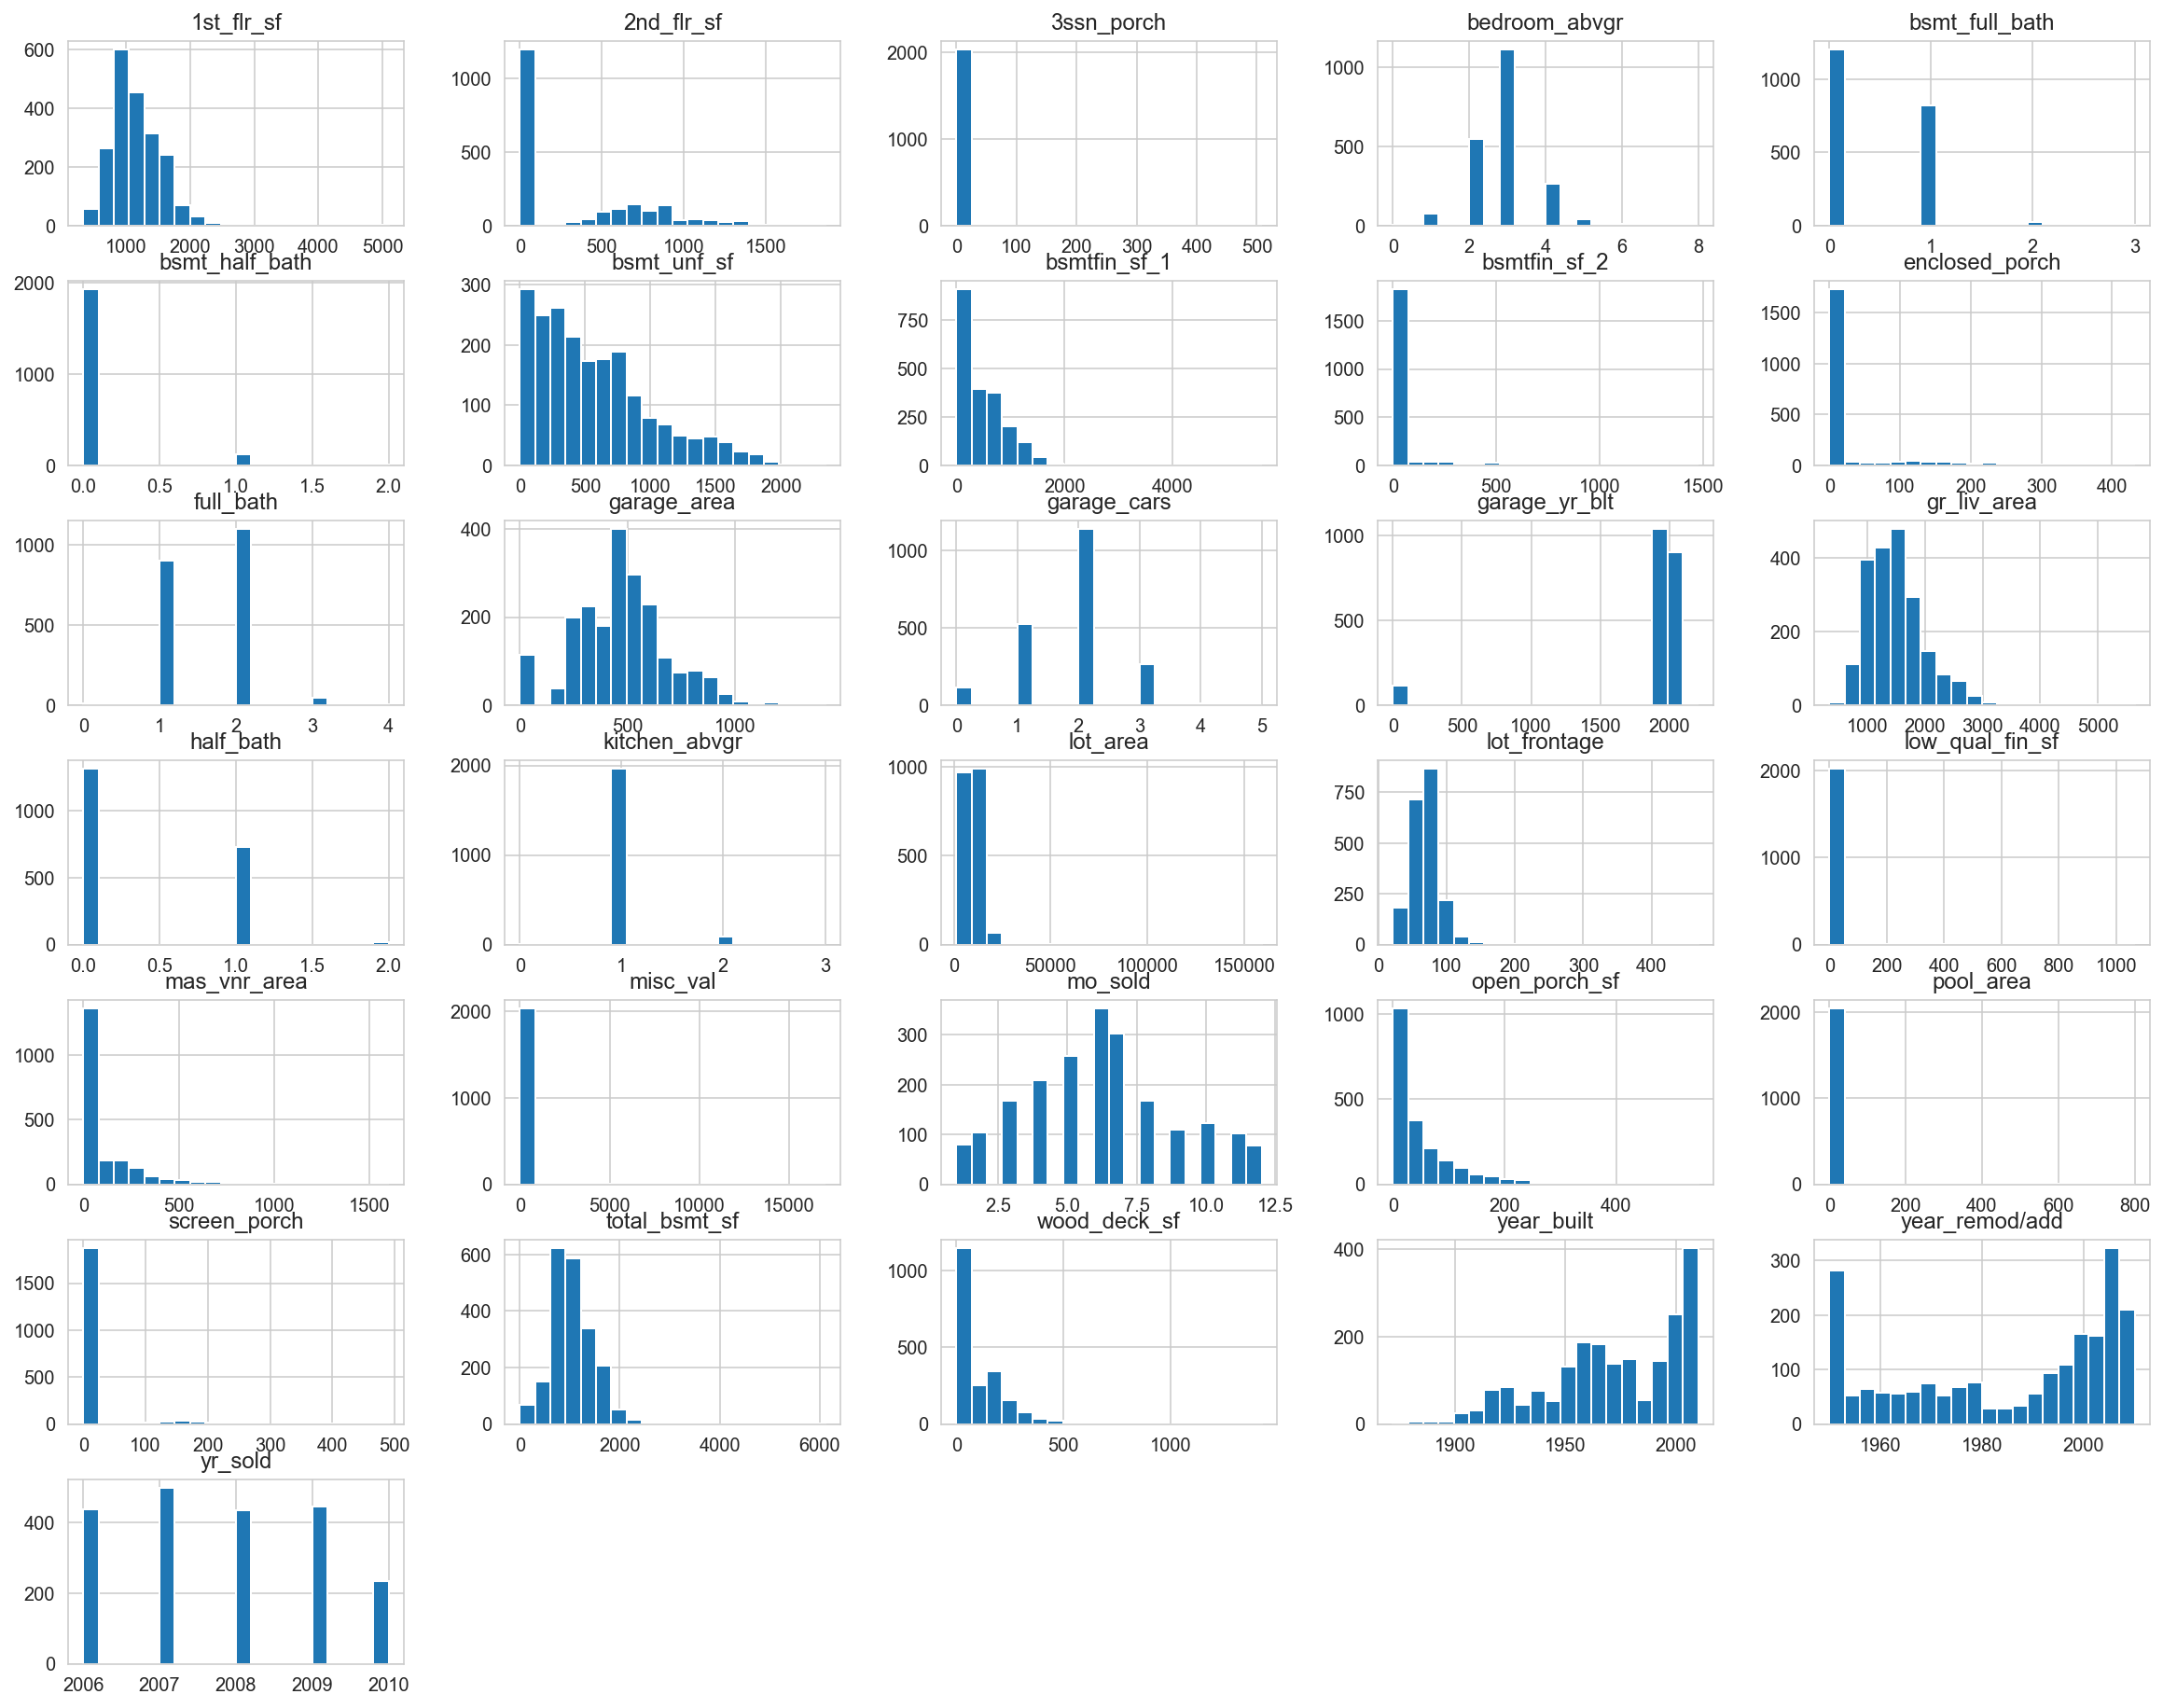

In [60]:
train[numeric_col].hist(bins=20, figsize=(20, 16), layout=(7, 5));

It is interesting to note that variables such as 'Lot Frontage', '1st Floor Square Feet', 'Garage Area', 'Grade Living Area' and 'Total Basement Square Feet' have shapes similar to normal distributions. This can be compared against variables with right-tailed distributions, such as 'Basement Unfinished Square Feet', 'Wood Deck', 'Masonry Veneer Area' and 'Open Porch Square Feet'.

A plausible explanation could be that features in the house, such as the 1st floor area, living area, garage and total basement area are considered essential features of a house, thus taking a more normal distribution. 
Features like wood decks, porch and masonry veneer could be regarded as non-essential features and is absent in some homes, thus the distributions peaks for these features are around 0. 

### Distribution for Categorical Columns

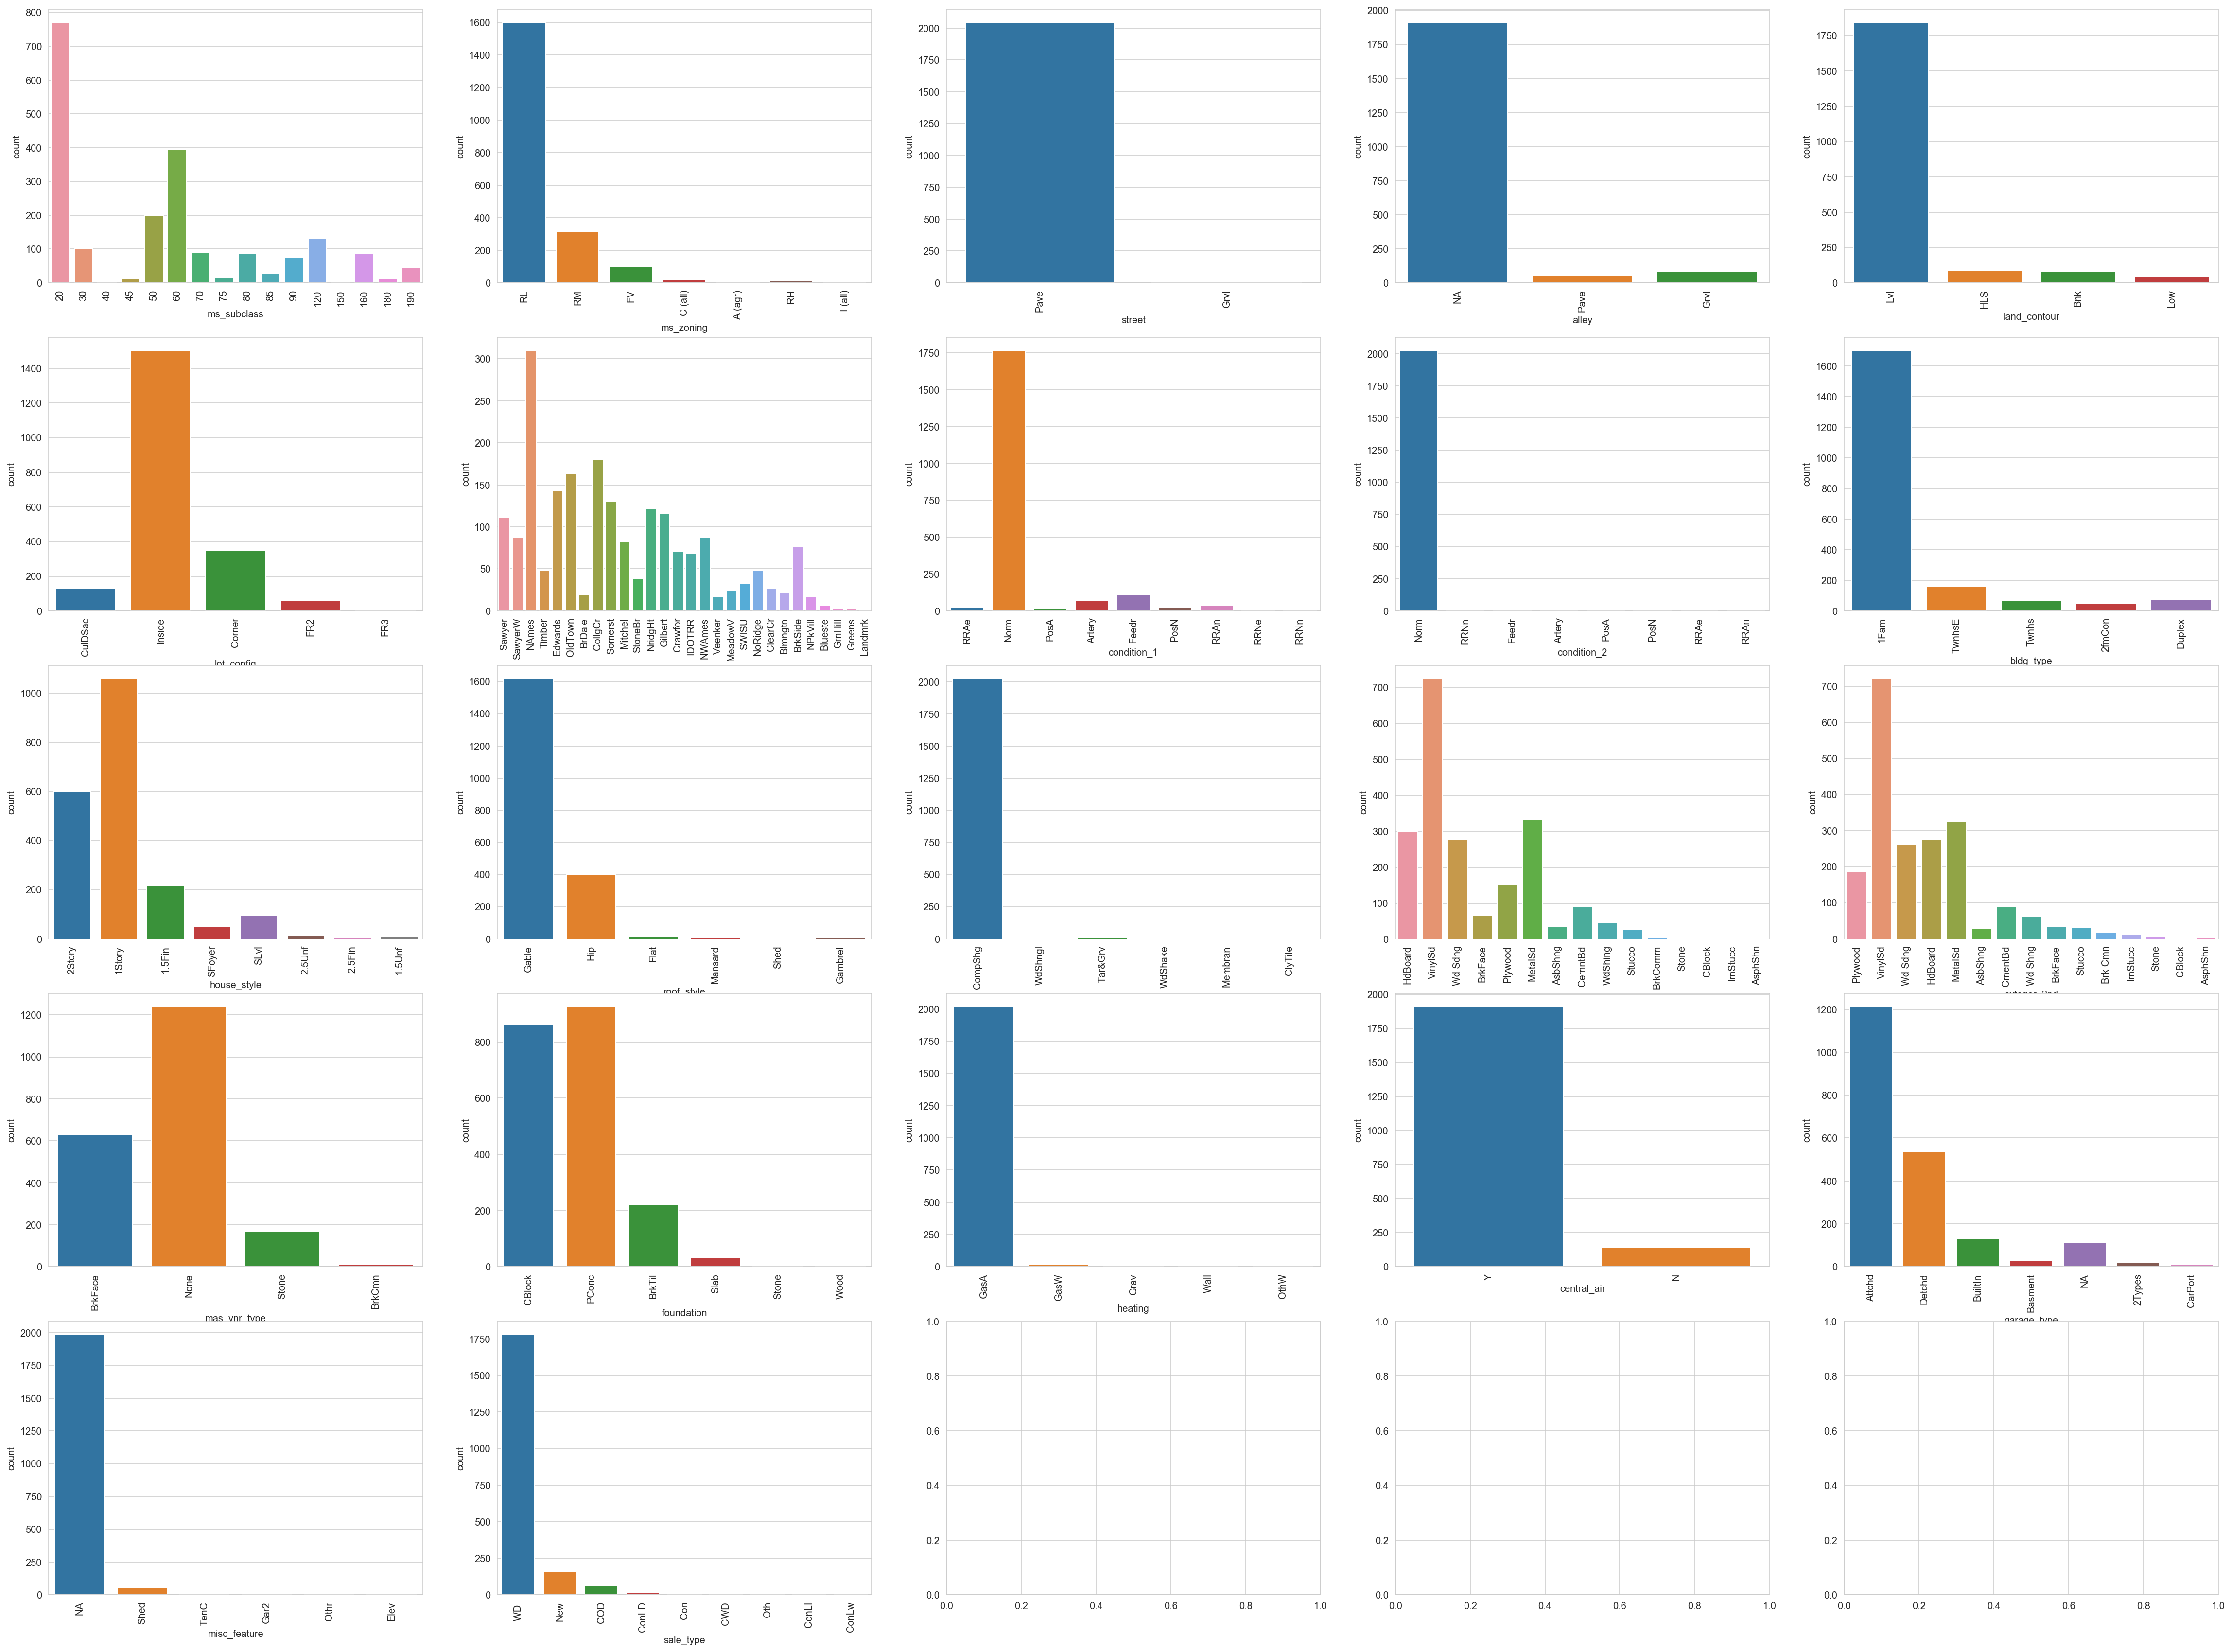

In [61]:
# Distribution for Categorical Columns 

fig, ax = plt.subplots(5, 5, figsize=(40,30))
for variable, subplot in zip(category_col, ax.flatten()):
    sns.countplot(train[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

### Distribution for Ordinal Columns 


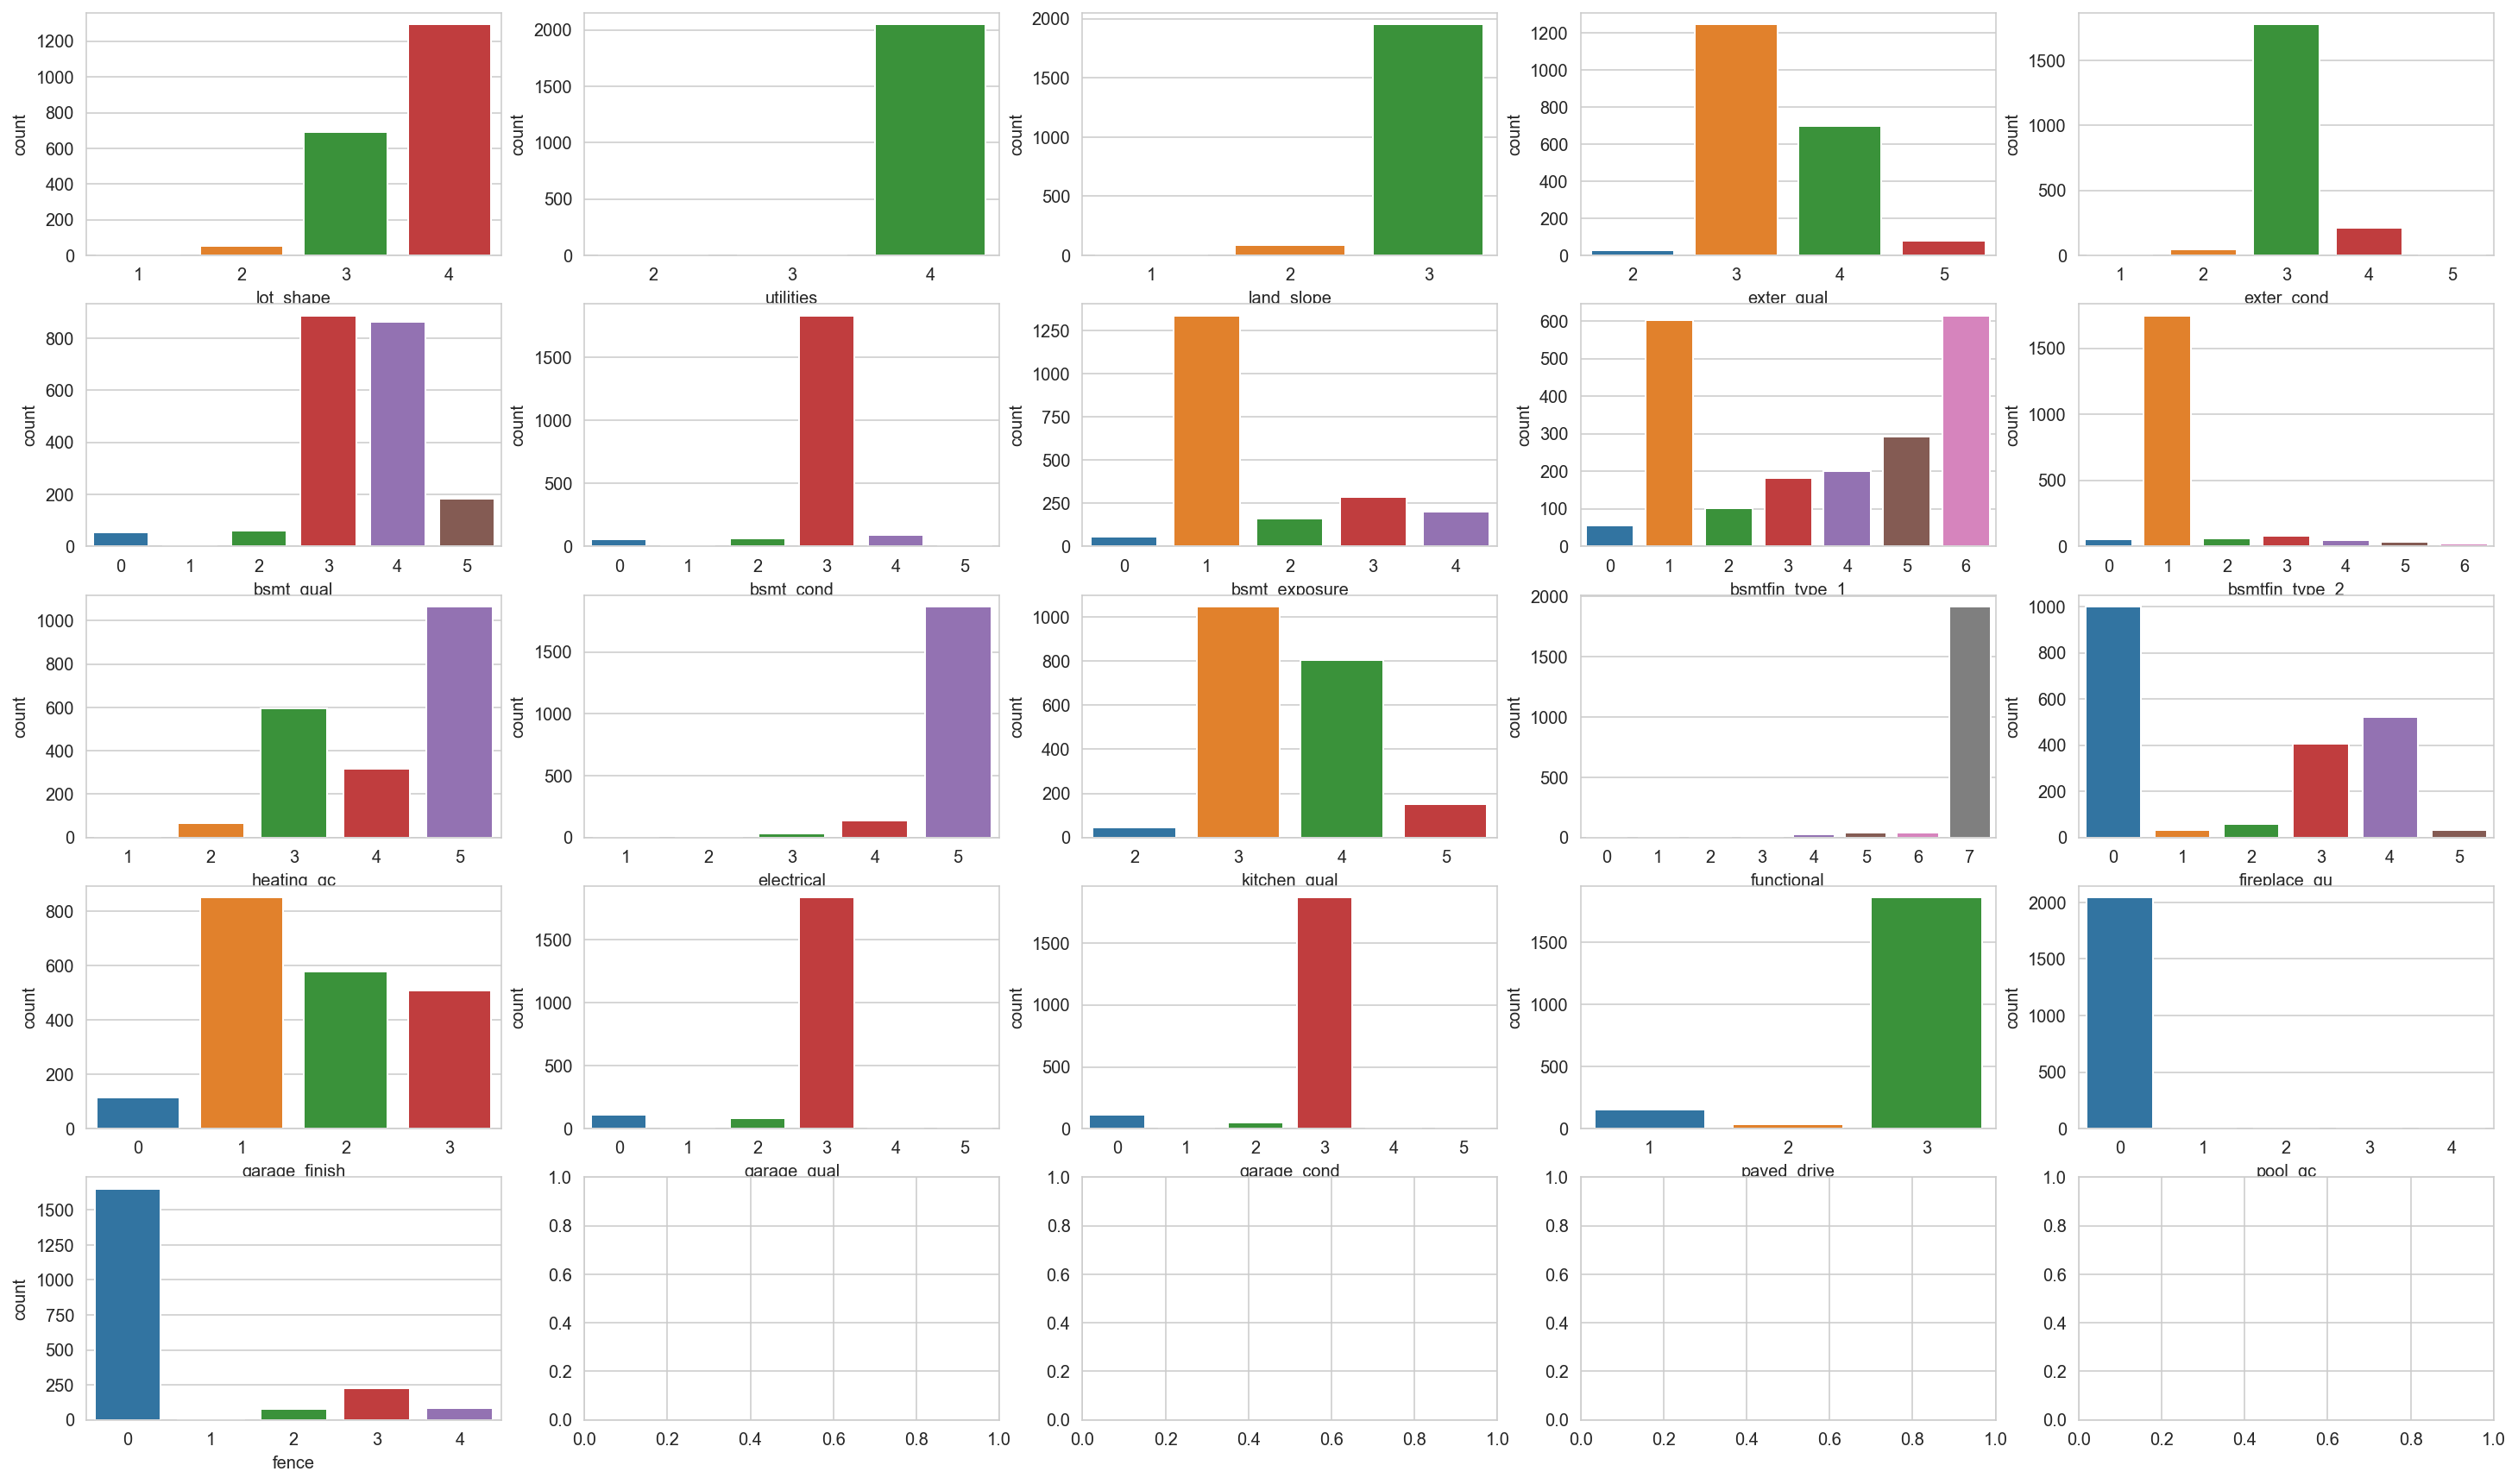

In [62]:
fig, ax = plt.subplots(5, 5, figsize=(25, 15))
for variable, subplot in zip(ordinal_col, ax.flatten()):
    sns.countplot(train[variable], ax=subplot)

The ordinal variables have been ranked according to the quality of the feature, where the highest number represents the best quality, and vice versa. We can see from the above plots that most of the features have scores which peak around a higher range. 

### Heatmap Analysis

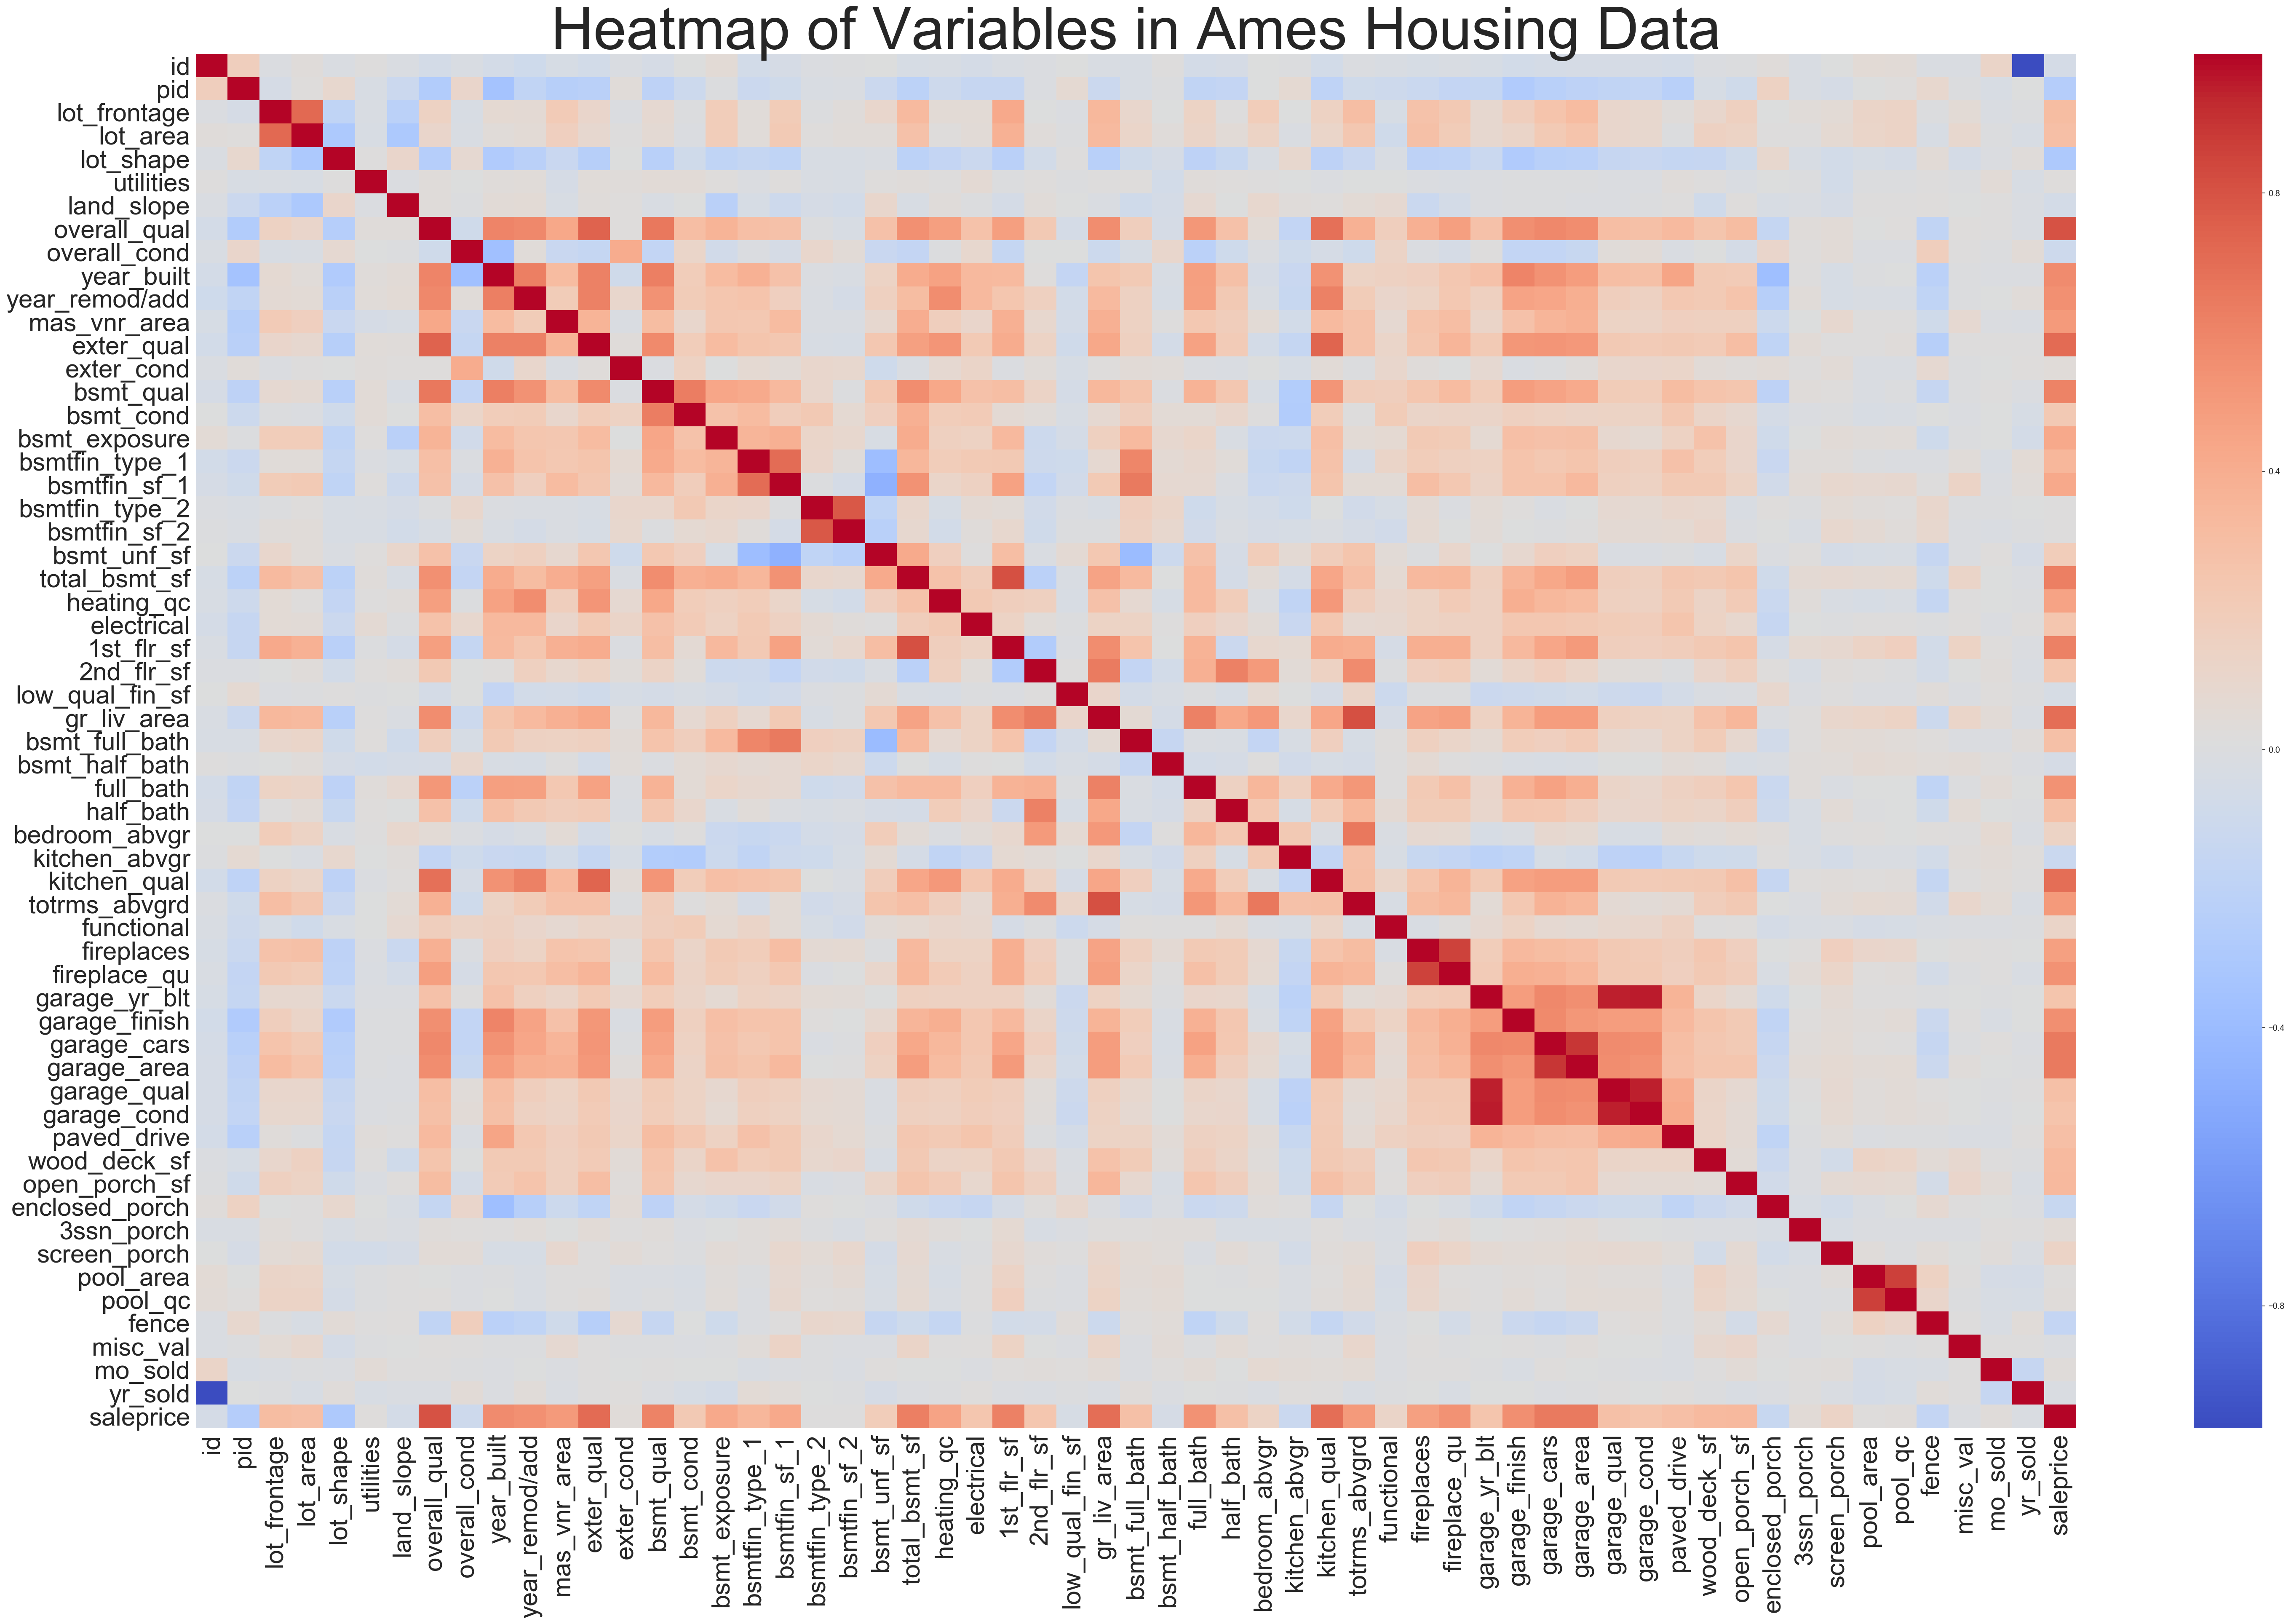

In [63]:
fig, ax = plt.subplots(figsize = (50,30))


sns.heatmap(train.corr(), cmap='coolwarm')
ax.tick_params(labelsize=30)
plt.title('Heatmap of Variables in Ames Housing Data', fontsize=70);
bottom, top = ax.get_ylim();
ax.set_ylim(bottom + 0.5, top - 0.5);

Since our target variable is the sale price of the house, we should be concerned with with correlations of the sale price compared against the other variables. We notice that the variables which are most correlated to sale price (reddish in colour) are variables which relate to quality, such as:
- Overall Quality 
- Exterior Quality
- Basement Quality
- Kitchen Quality 
- Garage Quality 

These variables are mostly contained within the building itself. As for the areas outside the building, such as pool and porch, we see less correlation with regards to sale price. Going forward, we would want to pay more attention to variables which are contained within the house building itself. 

### Overall Quality 


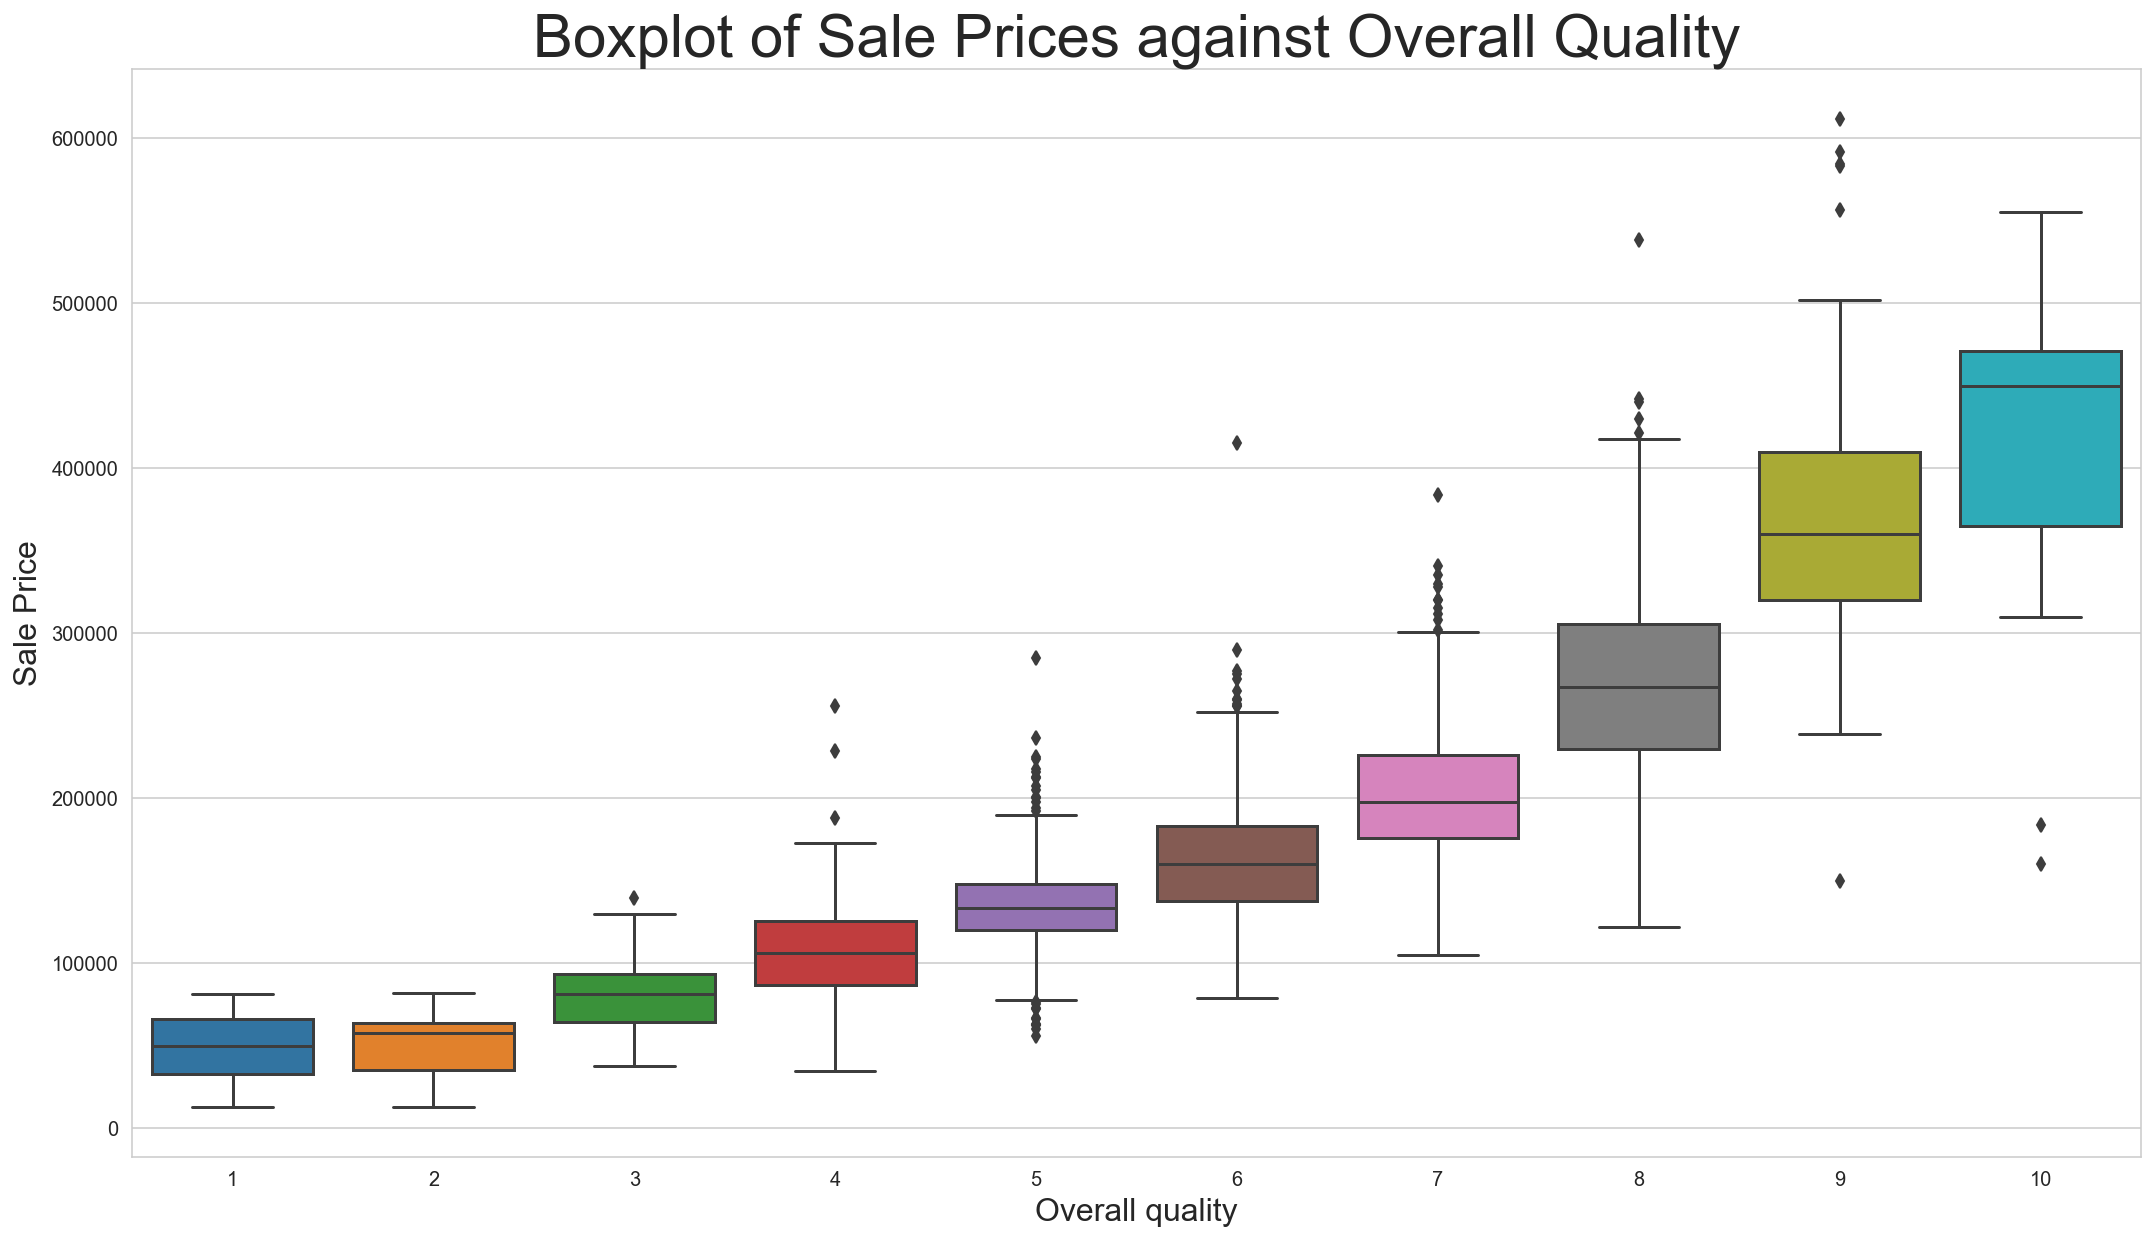

In [64]:
plt.figure(figsize=(18,10))
sns.boxplot(x='overall_qual', y='saleprice', data=train)
plt.title('Boxplot of Sale Prices against Overall Quality', fontsize=30);
plt.xlabel('Overall quality', fontsize=16);
plt.ylabel('Sale Price', fontsize=16);


It is clear from the figure above as when overall quality rises, the median of the sale price rises as well. We also observe a wider range as overall quality increases.

### Year Built for Houses

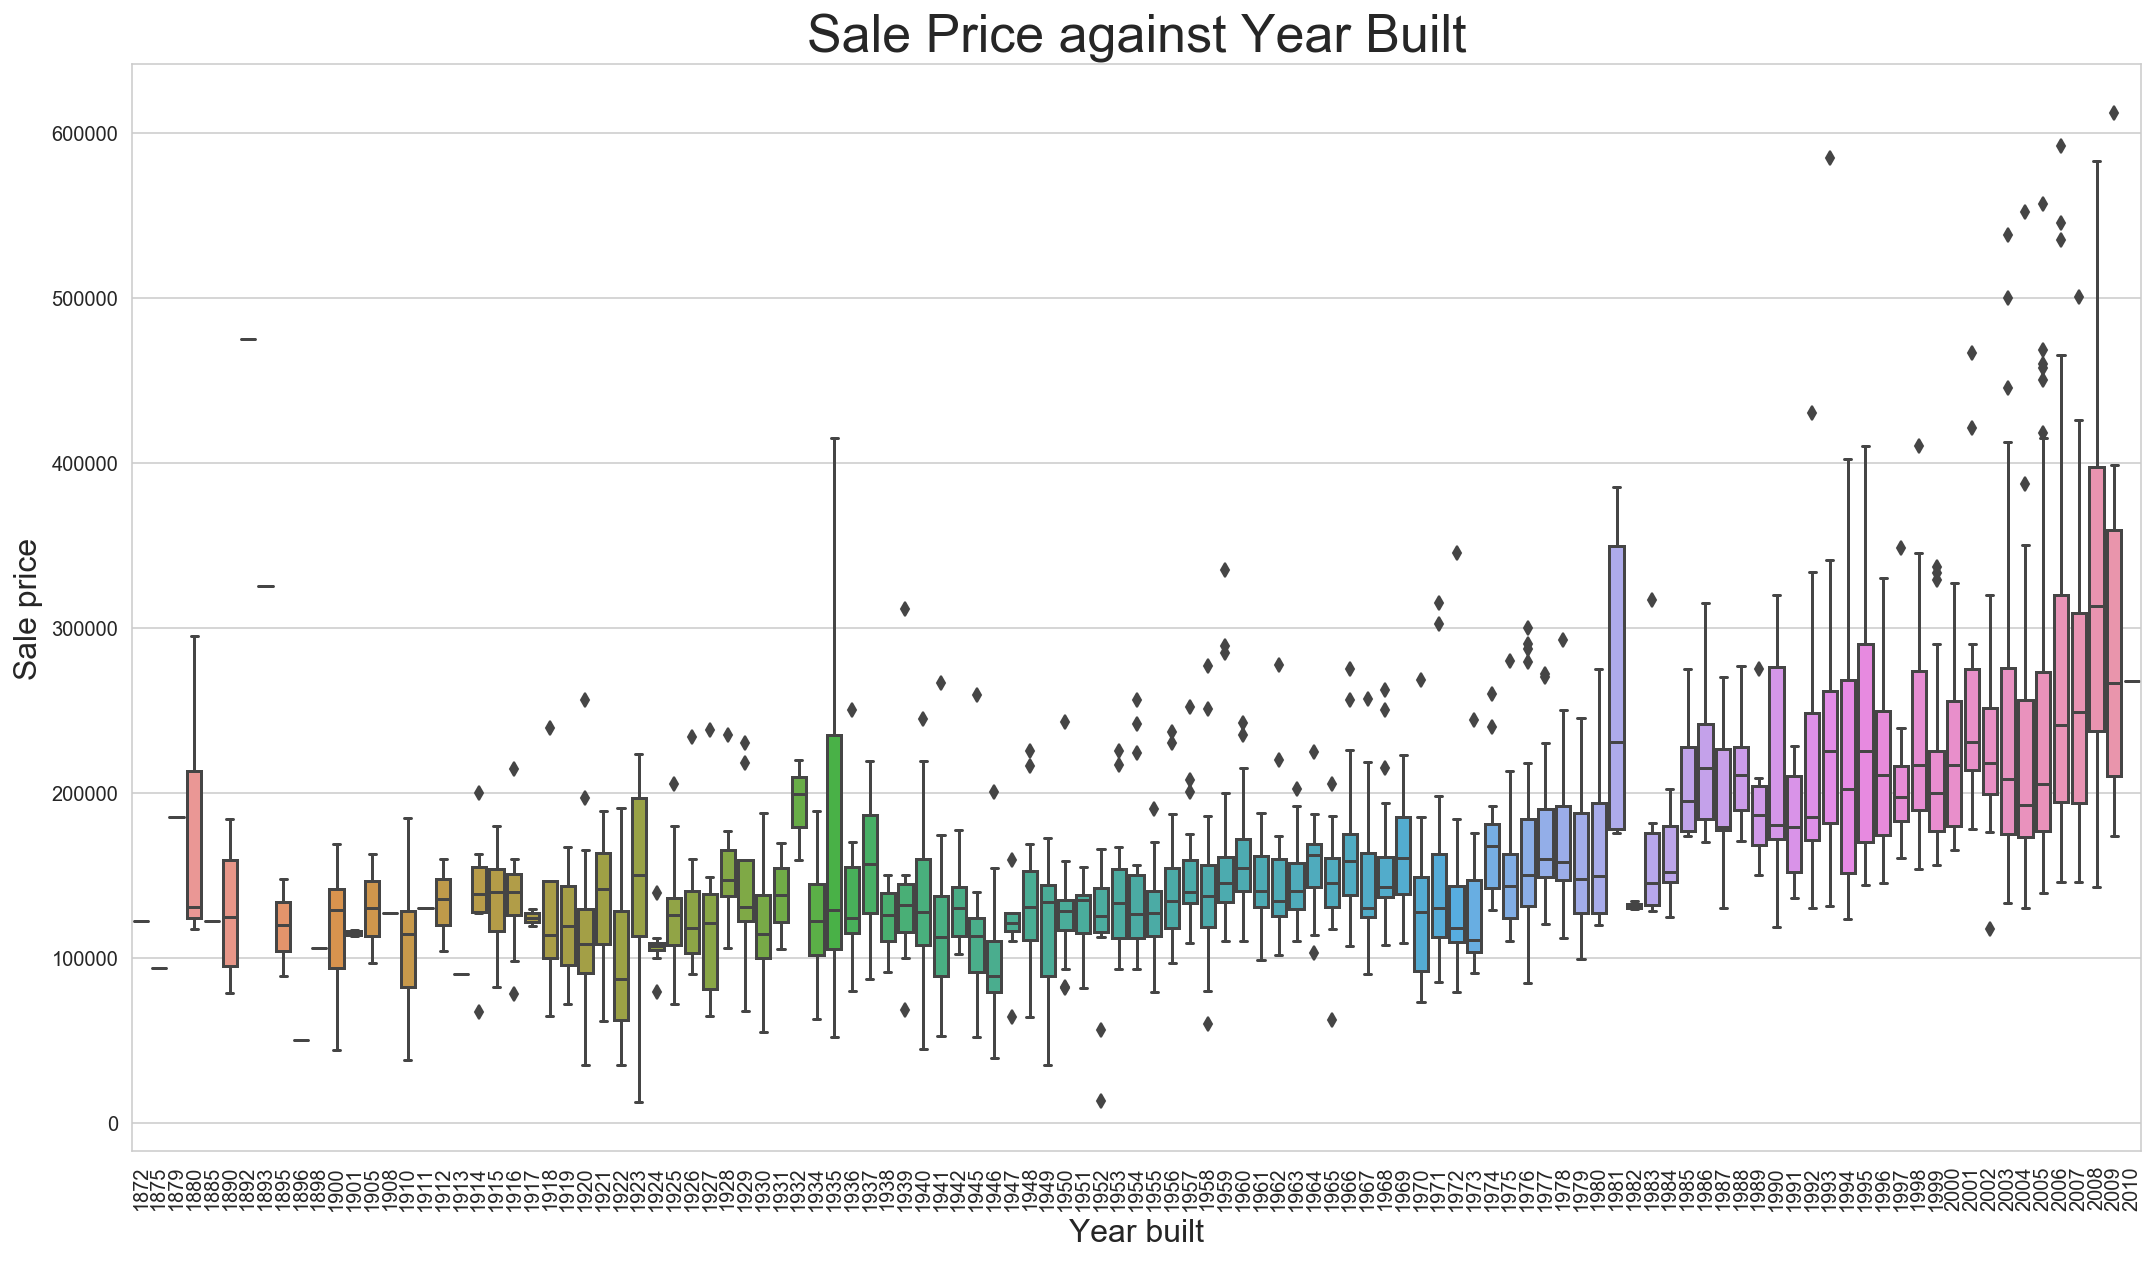

In [65]:
plt.figure(figsize=(18,10));
sns.boxplot(x='year_built', y='saleprice', data=train);
plt.title('Sale Price against Year Built', fontsize=26);
plt.xlabel('Year built', fontsize=16);
plt.ylabel('Sale price', fontsize=16);
plt.xticks(size=10,rotation='vertical');

We can see from the graph above that there is a general trend of increases house prices over the years. There are two reasons that can explain this trend:
- Inflation of Prices
- Newly bulit houses will cost more; less depreciation compared to older houses.

## Data Cleaning for test.csv

The method for data cleaning for test.csv would be exactly the same as train.csv. However, we would need to pay attention to missing variables in new columns, such as the variable 'electrical'. 

In [66]:
test = pd.read_csv('./datasets/test.csv')

In [67]:
test.head()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0  2658  902301120          190        RM          69.0      9142   Pave   
1  2718  905108090           90        RL           NaN      9662   Pave   
2  2414  528218130           60        RL          58.0     17104   Pave   
3  1989  902207150           30        RM          60.0      8520   Pave   
4   625  535105100           20        RL           NaN      9500   Pave   

  Alley Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
0  Grvl       Reg          Lvl    AllPub     Inside        Gtl      OldTown   
1   NaN       IR1          Lvl    AllPub     Inside        Gtl       Sawyer   
2   NaN       IR1          Lvl    AllPub     Inside        Gtl      Gilbert   
3   NaN       Reg          Lvl    AllPub     Inside        Gtl      OldTown   
4   NaN       IR1          Lvl    AllPub     Inside        Gtl        NAmes   

  Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
0        Norm        Norm    2fmCon      2Story             6             8   
1        Norm        Norm    Duplex      1Story             5             4   
2        Norm        Norm      1Fam      2Story             7             5   
3        Norm        Norm      1Fam      1Story             5             6   
4        Norm        Norm      1Fam      1Story             6             5   

   Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd  \
0        1910            1950      Gable   CompShg      AsbShng      AsbShng   
1        1977            1977      Gable   CompShg      Plywood      Plywood   
2        2006            2006      Gable   CompShg      VinylSd      VinylSd   
3        1923            2006      Gable   CompShg      Wd Sdng      Wd Sdng   
4        1963            1963      Gable   CompShg      Plywood      Plywood   

  Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual  \
0         None           0.0         TA         Fa      Stone        Fa   
1         None           0.0         TA         TA     CBlock        Gd   
2         None           0.0         Gd         TA      PConc        Gd   
3         None           0.0         Gd         TA     CBlock        TA   
4      BrkFace         247.0         TA         TA     CBlock        Gd   

  Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  \
0        TA            No            Unf             0            Unf   
1        TA            No            Unf             0            Unf   
2        Gd            Av            GLQ           554            Unf   
3        TA            No            Unf             0            Unf   
4        TA            No            BLQ           609            Unf   

   BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating Heating QC Central Air  \
0             0         1020           1020    GasA         Gd           N   
1             0         1967           1967    GasA         TA           Y   
2             0          100            654    GasA         Ex           Y   
3             0          968            968    GasA         TA           Y   
4             0          785           1394    GasA         Gd           Y   

  Electrical  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  \
0      FuseP         908        1020                0         1928   
1      SBrkr        1967           0                0         1967   
2      SBrkr         664         832                0         1496   
3      SBrkr         968           0                0          968   
4      SBrkr        1394           0                0         1394   

   Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  \
0               0               0          2          0              4   
1               0               0          2          0              6   
2               1               0          2          1              3   
3               0               0        

In [68]:
test.isnull().sum()

Id                   0
PID                  0
MS SubClass          0
MS Zoning            0
Lot Frontage       160
Lot Area             0
Street               0
Alley              821
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type         1
Mas Vnr Area         1
Exter Qual           0
Exter Cond           0
Foundation           0
Bsmt Qual           25
Bsmt Cond           25
Bsmt Exposure       25
BsmtFin Type 1      25
BsmtFin SF 1         0
BsmtFin Type 2      25
BsmtFin SF 2         0
Bsmt Unf SF          0
Total Bsmt SF        0
Heating              0
Heating QC           0
Central Air          0
Electrical 

### Lot Frontage - Test Data

In [69]:
x_lot_area_miss_test = test[test['Lot Frontage'].isnull()][['Lot Area']]
x_lot_area_miss_test

Lot Area
1        9662
4        9500
7        9286
13       7976
20       8246
21       8499
23      21453
26      12513
30       7340
37       9000
41      11214
57       9503
59      10316
63      13355
65      10750
66       8125
69       4426
72      25485
73      10784
74       8510
75      17871
79       8339
88      16500
89      16669
91       7758
101     14694
107      7685
108     18837
112      7500
115     16196
124     13869
144     31220
148     10900
156      7390
160      9240
175     10832
182      9900
183     17542
187      8965
188      7793
196      7540
205      5775
211      8637
217     20355
220      7500
225      7890
227     11250
236     13031
242     10960
274     14100
278     16157
282     12155
286     29959
295     14175
296      4426
300      9650
306      9000
307    164660
309     10547
310     13052
320      7015
326      4928
332     14067
334      3760
348      9477
350     11327
374      9233
386     11500
389     26142
396      3300
399      7252
413     12388
418     11170
429      8750
439      4447
441      9453
442     10355
444     11250
445     10464
451     13700
456      8470
467     16698
468     10400
471      9180
473      8803
481     11500
482     13006
487      4438
489      4217
494     10382
496      3072
499     11075
506      7000
508      8854
523     56600
525      3940
539     14217
553      6120
554     28698
566      9200
568      3830
571     11875
578      4426
585     11382
594      9144
596     12732
602     11250
604     18800
613      8696
620      7750
636      2980
645      8723
647      9375
650     24682
655      6627
661     10395
664     16659
673     11949
674      7010
678      1974
685     11613
692      8169
695      5271
701      4438
707     11333
714     15870
733     12334
735     11765
738     12936
742     10304
744      8239
745      9765
746     15584
747      9337
749      3950
754     12095
773     10624
774     12925
775      9260
778     12772
781      2117
786     13284
792      8125
793     11200
804      6449
805     12104
812     10236
813     11616
820     10274
828     11332
833     12782
840      9759
843     23595
847     19900
852      9790
854      7032
860      8780
867      7777
868      5062
870     36500

Recall the Linear Regression Model we used to impute the missing Lot Frontage Train Scores earlier. We will be using the same model here to impute the 160 missing values for the Lot Frontage test data.

In [70]:
lotfront_test_predict_array = reg_lot.predict(x_lot_area_miss_test)
lotfront_test_predict_series = pd.Series(lotfront_test_predict_array)
test.loc[test['Lot Frontage'].isna(),'Lot Frontage'] = lotfront_test_predict_series.values

In [71]:
test['Lot Frontage']

0       69.000000
1       69.160621
2       58.000000
3       60.000000
4       68.727553
5       21.000000
6       52.000000
7       68.155476
8       39.000000
9       75.000000
10      50.000000
11      60.000000
12      75.000000
13      64.653509
14      69.000000
15      60.000000
16      60.000000
17      68.000000
18      80.000000
19     121.000000
20      65.375288
21      66.051623
22      50.000000
23     100.681000
24      80.000000
25      60.000000
26      76.782078
27      50.000000
28      80.000000
29      51.000000
30      62.953317
31      52.000000
32      65.000000
33      80.000000
34      75.000000
35      58.000000
36      60.000000
37      67.390925
38      74.000000
39      73.000000
40      40.000000
41      73.309517
42      75.000000
43      75.000000
44      46.000000
45      21.000000
46      68.000000
47      60.000000
48      74.000000
49      75.000000
50      52.000000
51      50.000000
52      65.000000
53      60.000000
54      60.000000
55      61

### Alley - Test Data

In [72]:
test['Alley'] = test['Alley'].replace(np.nan,'NA')
test[['Alley']].head()

Alley
0  Grvl
1    NA
2    NA
3    NA
4    NA

### Masonry Veneer - Test Data

We can assume that the missing data corresponds to no Masonry Veneer within the building. We can assign 'None' and 0.0 to 'Mas Vnr Type' and 'Mas Vnr Area' respectively.

In [73]:
test[test['Mas Vnr Type'].isnull()]

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
866  868  907260030           60        RL          70.0      8749   Pave   

    Alley Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
866    NA       Reg          Lvl    AllPub     Inside        Gtl      CollgCr   

    Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
866        Norm        Norm      1Fam      2Story             7             5   

     Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st  \
866        2002            2002      Gable   CompShg      VinylSd   

    Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation  \
866      VinylSd          NaN           NaN         Gd         TA      PConc   

    Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1  \
866        Gd        TA            No            Unf             0   

    BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating  \
866            Unf             0          840            840    GasA   

    Heating QC Central Air Electrical  1st Flr SF  2nd Flr SF  \
866         Ex           Y      SBrkr         840         885   

     Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath  Full Bath  \
866                0         1725               0               0          2   

     Half Bath  Bedroom AbvGr  Kitchen AbvGr Kitchen Qual  TotRms AbvGrd  \
866          1              3              1           Gd              6   

    Functional  Fireplaces Fireplace Qu Garage Type  Garage Yr Blt  \
866        Typ           0          NaN      Attchd         2002.0   

    Garage Finish  Garage Cars  Garage Area Garage Qual Garage Cond  \
866           RFn            2          550          TA          TA   

    Paved Drive  Wood Deck SF  Open Porch SF  Enclosed Porch  3Ssn Porch  \
866           Y             0             48               0           0   

     Screen Porch  Pool Area Pool QC Fence Misc Feature  Misc Val  Mo Sold  \
866             0          0     NaN   NaN          NaN         0       11   

     Yr Sold Sale Type  
866     2009       WD

In [74]:
test['Mas Vnr Type'] = test['Mas Vnr Type'].fillna('None')
test['Mas Vnr Area'] = test['Mas Vnr Area'].fillna(0)
test[['Mas Vnr Type','Mas Vnr Area']].isnull().sum()

Mas Vnr Type    0
Mas Vnr Area    0
dtype: int64

### Basement - Test Data

We can assume missing values as an absence of a basement within the house. 
'NA' will be used to denote that there is no basement for the following variables coded below.

In [75]:
test[['Bsmt Qual','Bsmt Cond','Bsmt Exposure', 'BsmtFin Type 1','BsmtFin Type 2']].isnull().sum()

Bsmt Qual         25
Bsmt Cond         25
Bsmt Exposure     25
BsmtFin Type 1    25
BsmtFin Type 2    25
dtype: int64

In [76]:
test['Bsmt Qual'] = test['Bsmt Qual'].fillna('NA')
test['Bsmt Cond'] = test['Bsmt Cond'].fillna('NA')
test['Bsmt Exposure'] = test['Bsmt Exposure'].fillna('NA')
test['BsmtFin Type 1'] = test['BsmtFin Type 1'].fillna('NA')
test['BsmtFin Type 2'] = test['BsmtFin Type 2'].fillna('NA')

test[['Bsmt Qual','Bsmt Cond','Bsmt Exposure', 'BsmtFin Type 1','BsmtFin Type 2']].isnull().sum()

Bsmt Qual         0
Bsmt Cond         0
Bsmt Exposure     0
BsmtFin Type 1    0
BsmtFin Type 2    0
dtype: int64

### Electrical - Test Data

In [77]:
test[test['Electrical'].isnull()]

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
635  1578  916386080           80        RL          73.0      9735   Pave   

    Alley Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
635    NA       Reg          Lvl    AllPub     Inside        Gtl       Timber   

    Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
635        Norm        Norm      1Fam        SLvl             5             5   

     Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st  \
635        2006            2007      Gable   CompShg      VinylSd   

    Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation  \
635      VinylSd         None           0.0         TA         TA      PConc   

    Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1  \
635        Gd        TA            No            Unf             0   

    BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating  \
635            Unf             0          384            384    GasA   

    Heating QC Central Air Electrical  1st Flr SF  2nd Flr SF  \
635         Gd           Y        NaN         754         640   

     Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath  Full Bath  \
635                0         1394               0               0          2   

     Half Bath  Bedroom AbvGr  Kitchen AbvGr Kitchen Qual  TotRms AbvGrd  \
635          1              3              1           Gd              7   

    Functional  Fireplaces Fireplace Qu Garage Type  Garage Yr Blt  \
635        Typ           0          NaN     BuiltIn         2007.0   

    Garage Finish  Garage Cars  Garage Area Garage Qual Garage Cond  \
635           Fin            2          400          TA          TA   

    Paved Drive  Wood Deck SF  Open Porch SF  Enclosed Porch  3Ssn Porch  \
635           Y           100              0               0           0   

     Screen Porch  Pool Area Pool QC Fence Misc Feature  Misc Val  Mo Sold  \
635             0          0     NaN   NaN          NaN         0        5   

     Yr Sold Sale Type  
635     2008       WD

In [78]:
test['Electrical'].value_counts()

SBrkr    814
FuseA     48
FuseF     15
FuseP      1
Name: Electrical, dtype: int64

An overwhelming number of houses are onto the standard circuit breakers. Given that there is only one missing value under the column 'Electrical', we can assign the missing value to the most common type of electric wiring, 'SBrkr'.

In [79]:
test['Electrical'] = test['Electrical'].fillna('SBrkr')

### Fireplace - Test Data

In [80]:
test[test['Fireplace Qu'].isnull()][['Fireplaces','Fireplace Qu']]

Fireplaces Fireplace Qu
0             0          NaN
1             0          NaN
3             0          NaN
5             0          NaN
6             0          NaN
7             0          NaN
8             0          NaN
10            0          NaN
11            0          NaN
17            0          NaN
21            0          NaN
24            0          NaN
25            0          NaN
27            0          NaN
28            0          NaN
29            0          NaN
30            0          NaN
31            0          NaN
35            0          NaN
37            0          NaN
38            0          NaN
39            0          NaN
40            0          NaN
42            0          NaN
47            0          NaN
48            0          NaN
49            0          NaN
50            0          NaN
51            0          NaN
53            0          NaN
54            0          NaN
55            0          NaN
56            0          NaN
61            0          NaN
63            0          NaN
64            0          NaN
66            0          NaN
68            0          NaN
70            0          NaN
74            0          NaN
78            0          NaN
79            0          NaN
82            0          NaN
84            0          NaN
85            0          NaN
87            0          NaN
90            0          NaN
91            0          NaN
92            0          NaN
93            0          NaN
95            0          NaN
99            0          NaN
100           0          NaN
103           0          NaN
106           0          NaN
109           0          NaN
110           0          NaN
114           0          NaN
118           0          NaN
124           0          NaN
125           0          NaN
127           0          NaN
128           0          NaN
135           0          NaN
137           0          NaN
138           0          NaN
140           0          NaN
142           0          NaN
143           0          NaN
145           0          NaN
146           0          NaN
147           0          NaN
148           0          NaN
149           0          NaN
150           0          NaN
151           0          NaN
152           0          NaN
153           0          NaN
155           0          NaN
156           0          NaN
157           0          NaN
158           0          NaN
162           0          NaN
163           0          NaN
167           0          NaN
168           0          NaN
170           0          NaN
172           0          NaN
174           0          NaN
177           0          NaN
178           0          NaN
179           0          NaN
180           0          NaN
184           0          NaN
186           0          NaN
189           0          NaN
190           0          NaN
193           0          NaN
194           0          NaN
199           0          NaN
200           0          NaN
202           0          NaN
203           0          NaN
204           0          NaN
205           0          NaN
206           0          NaN
208           0          NaN
213           0          NaN
216           0          NaN
219           0          NaN
220           0          NaN
221           0          NaN
222           0          NaN
226           0          NaN
228           0          NaN
229           0          NaN
232           0          NaN
237           0          NaN
242           0          NaN
247           0          NaN
256           0          NaN
257           0          NaN
262           0          NaN
263           0          NaN
266           0          NaN
267           0          NaN
269           0          NaN
270           0          NaN
272           0          NaN
273           0          NaN
275           0          NaN
276           0          NaN
277           0          NaN
279           0          NaN
280           0          NaN
282           0          NaN
283           0          NaN
284

If 'Fireplace' is registered as 0, 'Fireplace Qu' will show up as NaN.  For missing values in 'Fireplace Qu', 'NA' can be filled up in place. 

In [81]:
test['Fireplace Qu'] = test['Fireplace Qu'].fillna('NA')

In [82]:
test[['Fireplaces','Fireplace Qu']].isnull().sum()

Fireplaces      0
Fireplace Qu    0
dtype: int64

### Garage - Test Data

In [83]:
test[test['Garage Type'].isnull()][['Garage Type','Garage Yr Blt','Garage Finish','Garage Cars','Garage Area','Garage Qual','Garage Cond']]

Garage Type  Garage Yr Blt Garage Finish  Garage Cars  Garage Area  \
29          NaN            NaN           NaN            0            0   
45          NaN            NaN           NaN            0            0   
66          NaN            NaN           NaN            0            0   
68          NaN            NaN           NaN            0            0   
106         NaN            NaN           NaN            0            0   
110         NaN            NaN           NaN            0            0   
114         NaN            NaN           NaN            0            0   
145         NaN            NaN           NaN            0            0   
153         NaN            NaN           NaN            0            0   
157         NaN            NaN           NaN            0            0   
181         NaN            NaN           NaN            0            0   
219         NaN            NaN           NaN            0            0   
231         NaN            NaN           NaN            0            0   
232         NaN            NaN           NaN            0            0   
257         NaN            NaN           NaN            0            0   
283         NaN            NaN           NaN            0            0   
306         NaN            NaN           NaN            0            0   
315         NaN            NaN           NaN            0            0   
321         NaN            NaN           NaN            0            0   
338         NaN            NaN           NaN            0            0   
342         NaN            NaN           NaN            0            0   
351         NaN            NaN           NaN            0            0   
360         NaN            NaN           NaN            0            0   
396         NaN            NaN           NaN            0            0   
483         NaN            NaN           NaN            0            0   
497         NaN            NaN           NaN            0            0   
528         NaN            NaN           NaN            0            0   
530         NaN            NaN           NaN            0            0   
537         NaN            NaN           NaN            0            0   
556         NaN            NaN           NaN            0            0   
567         NaN            NaN           NaN            0            0   
592         NaN            NaN           NaN            0            0   
597         NaN            NaN           NaN            0            0   
611         NaN            NaN           NaN            0            0   
616         NaN            NaN           NaN            0            0   
619         NaN            NaN           NaN            0            0   
630         NaN            NaN           NaN            0            0   
675         NaN            NaN           NaN            0            0   
699         NaN            NaN           NaN            0            0   
712         NaN            NaN           NaN            0            0   
780         NaN            NaN           NaN            0            0   
804         NaN            NaN           NaN            0            0   
814         NaN            NaN           NaN            0            0   
860         NaN            NaN           NaN            0            0   

    Garage Qual Garage Cond  
29          NaN         NaN  
45          NaN         NaN  
66          NaN         NaN  
68          NaN         NaN  
106         NaN         NaN  
110         NaN         NaN  
114         NaN         NaN  
145         NaN         NaN  
153         NaN         NaN  
157         NaN         NaN  
181         NaN         NaN  
219         NaN         NaN  
231         NaN         NaN  
232         NaN         NaN  
257         NaN         NaN  
283         NaN         NaN  
306         NaN         NaN  
315         NaN         NaN  
321         NaN         NaN  
338         NaN         NaN  
342         NaN         NaN  
351         N

Since Garage Cars and Area are 0, we can deduce that the rest of these values should be 'NA'.

In [84]:
test['Garage Type'] = test['Garage Type'].fillna('NA')
test['Garage Yr Blt'] = test['Garage Yr Blt'].fillna(0)
test['Garage Finish'] = test['Garage Finish'].fillna('NA')
test['Garage Qual'] = test['Garage Qual'].fillna('NA')
test['Garage Cond'] = test['Garage Cond'].fillna('NA')

test[['Garage Type','Garage Yr Blt','Garage Finish','Garage Cars','Garage Area','Garage Qual','Garage Cond']].isnull().sum()

Garage Type      0
Garage Yr Blt    0
Garage Finish    0
Garage Cars      0
Garage Area      0
Garage Qual      0
Garage Cond      0
dtype: int64

### Pool - Test Data

In [85]:
test[['Pool Area','Pool QC']]

Pool Area Pool QC
0            0     NaN
1            0     NaN
2            0     NaN
3            0     NaN
4            0     NaN
5            0     NaN
6            0     NaN
7            0     NaN
8            0     NaN
9            0     NaN
10           0     NaN
11           0     NaN
12           0     NaN
13           0     NaN
14           0     NaN
15           0     NaN
16           0     NaN
17           0     NaN
18           0     NaN
19           0     NaN
20           0     NaN
21           0     NaN
22           0     NaN
23           0     NaN
24           0     NaN
25           0     NaN
26           0     NaN
27           0     NaN
28           0     NaN
29           0     NaN
30           0     NaN
31           0     NaN
32           0     NaN
33           0     NaN
34           0     NaN
35           0     NaN
36           0     NaN
37           0     NaN
38           0     NaN
39           0     NaN
40           0     NaN
41           0     NaN
42           0     NaN
43           0     NaN
44           0     NaN
45           0     NaN
46           0     NaN
47           0     NaN
48           0     NaN
49           0     NaN
50           0     NaN
51           0     NaN
52           0     NaN
53           0     NaN
54           0     NaN
55           0     NaN
56           0     NaN
57           0     NaN
58           0     NaN
59           0     NaN
60           0     NaN
61           0     NaN
62           0     NaN
63           0     NaN
64           0     NaN
65           0     NaN
66           0     NaN
67           0     NaN
68           0     NaN
69           0     NaN
70           0     NaN
71           0     NaN
72           0     NaN
73           0     NaN
74           0     NaN
75           0     NaN
76           0     NaN
77           0     NaN
78           0     NaN
79           0     NaN
80           0     NaN
81           0     NaN
82           0     NaN
83           0     NaN
84           0     NaN
85           0     NaN
86           0     NaN
87           0     NaN
88           0     NaN
89           0     NaN
90           0     NaN
91           0     NaN
92           0     NaN
93           0     NaN
94           0     NaN
95           0     NaN
96           0     NaN
97           0     NaN
98           0     NaN
99           0     NaN
100          0     NaN
101          0     NaN
102          0     NaN
103          0     NaN
104        144      Ex
105          0     NaN
106          0     NaN
107          0     NaN
108          0     NaN
109          0     NaN
110          0     NaN
111          0     NaN
112          0     NaN
113          0     NaN
114          0     NaN
115          0     NaN
116          0     NaN
117          0     NaN
118          0     NaN
119          0     NaN
120          0     NaN
121          0     NaN
122          0     NaN
123          0     NaN
124          0     NaN
125          0     NaN
126          0     NaN
127          0     NaN
128          0     NaN
129          0     NaN
130          0     NaN
131          0     NaN
132          0     NaN
133          0     NaN
134          0     NaN
135          0     NaN
136          0     NaN
137          0     NaN
138          0     NaN
139          0     NaN
140          0     NaN
141          0     NaN
142          0     NaN
143          0     NaN
144          0     NaN
145          0     NaN
146          0     NaN
147          0     NaN
148          0     NaN
149          0     NaN
150          0     NaN
151          0     NaN
152          0     NaN
153          0     NaN
154          0     NaN
155          0     NaN
156          0     NaN
157          0     NaN
158          0     NaN
159          0     NaN
160          0     NaN
161          0     NaN
162          0     NaN
163          0     NaN
164          0     NaN
165          0     NaN
166          0     NaN
167          0     NaN
168          0     NaN
169          0     NaN
170          0     NaN
171        555      Ex
172          0     NaN
173

For the missing values of 'Pool QC', Pool Area is registered as 0. We can deduce that 'Pool QC' should be 'NA' in this case. 

In [86]:
test['Pool QC'] = test['Pool QC'].fillna('NA')
test[['Pool Area','Pool QC']].isnull().sum()

Pool Area    0
Pool QC      0
dtype: int64

### Fence - Test Data

We can assume that there is no fence for missing values and should be filled with 'NA'.

In [87]:
test['Fence'] = test['Fence'].fillna('NA')
test[['Fence']].isnull().sum()

Fence    0
dtype: int64

### Miscellaneous Feature - Test Data

We can assume that there is no miscellaneous features for missing values and should be filled with 'NA'.

In [88]:
test['Misc Feature'] = test['Misc Feature'].fillna('NA')
test[['Misc Feature']].isnull().sum()

Misc Feature    0
dtype: int64

In [89]:
test.isnull().sum()

Id                 0
PID                0
MS SubClass        0
MS Zoning          0
Lot Frontage       0
Lot Area           0
Street             0
Alley              0
Lot Shape          0
Land Contour       0
Utilities          0
Lot Config         0
Land Slope         0
Neighborhood       0
Condition 1        0
Condition 2        0
Bldg Type          0
House Style        0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
Roof Style         0
Roof Matl          0
Exterior 1st       0
Exterior 2nd       0
Mas Vnr Type       0
Mas Vnr Area       0
Exter Qual         0
Exter Cond         0
Foundation         0
Bsmt Qual          0
Bsmt Cond          0
Bsmt Exposure      0
BsmtFin Type 1     0
BsmtFin SF 1       0
BsmtFin Type 2     0
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
Heating            0
Heating QC         0
Central Air        0
Electrical         0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area  

In [90]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 80 columns):
Id                 879 non-null int64
PID                879 non-null int64
MS SubClass        879 non-null int64
MS Zoning          879 non-null object
Lot Frontage       879 non-null float64
Lot Area           879 non-null int64
Street             879 non-null object
Alley              879 non-null object
Lot Shape          879 non-null object
Land Contour       879 non-null object
Utilities          879 non-null object
Lot Config         879 non-null object
Land Slope         879 non-null object
Neighborhood       879 non-null object
Condition 1        879 non-null object
Condition 2        879 non-null object
Bldg Type          879 non-null object
House Style        879 non-null object
Overall Qual       879 non-null int64
Overall Cond       879 non-null int64
Year Built         879 non-null int64
Year Remod/Add     879 non-null int64
Roof Style         879 non-null object
Roof 

#### Renaming Columns for test.csv

In [91]:
lowercase = {column:column.lower().replace(' ','_') for column in test.columns}
test.rename(columns=lowercase,inplace=True)
test.head()

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
0  2658  902301120          190        RM     69.000000      9142   Pave   
1  2718  905108090           90        RL     69.160621      9662   Pave   
2  2414  528218130           60        RL     58.000000     17104   Pave   
3  1989  902207150           30        RM     60.000000      8520   Pave   
4   625  535105100           20        RL     68.727553      9500   Pave   

  alley lot_shape land_contour utilities lot_config land_slope neighborhood  \
0  Grvl       Reg          Lvl    AllPub     Inside        Gtl      OldTown   
1    NA       IR1          Lvl    AllPub     Inside        Gtl       Sawyer   
2    NA       IR1          Lvl    AllPub     Inside        Gtl      Gilbert   
3    NA       Reg          Lvl    AllPub     Inside        Gtl      OldTown   
4    NA       IR1          Lvl    AllPub     Inside        Gtl        NAmes   

  condition_1 condition_2 bldg_type house_style  overall_qual  overall_cond  \
0        Norm        Norm    2fmCon      2Story             6             8   
1        Norm        Norm    Duplex      1Story             5             4   
2        Norm        Norm      1Fam      2Story             7             5   
3        Norm        Norm      1Fam      1Story             5             6   
4        Norm        Norm      1Fam      1Story             6             5   

   year_built  year_remod/add roof_style roof_matl exterior_1st exterior_2nd  \
0        1910            1950      Gable   CompShg      AsbShng      AsbShng   
1        1977            1977      Gable   CompShg      Plywood      Plywood   
2        2006            2006      Gable   CompShg      VinylSd      VinylSd   
3        1923            2006      Gable   CompShg      Wd Sdng      Wd Sdng   
4        1963            1963      Gable   CompShg      Plywood      Plywood   

  mas_vnr_type  mas_vnr_area exter_qual exter_cond foundation bsmt_qual  \
0         None           0.0         TA         Fa      Stone        Fa   
1         None           0.0         TA         TA     CBlock        Gd   
2         None           0.0         Gd         TA      PConc        Gd   
3         None           0.0         Gd         TA     CBlock        TA   
4      BrkFace         247.0         TA         TA     CBlock        Gd   

  bsmt_cond bsmt_exposure bsmtfin_type_1  bsmtfin_sf_1 bsmtfin_type_2  \
0        TA            No            Unf             0            Unf   
1        TA            No            Unf             0            Unf   
2        Gd            Av            GLQ           554            Unf   
3        TA            No            Unf             0            Unf   
4        TA            No            BLQ           609            Unf   

   bsmtfin_sf_2  bsmt_unf_sf  total_bsmt_sf heating heating_qc central_air  \
0             0         1020           1020    GasA         Gd           N   
1             0         1967           1967    GasA         TA           Y   
2             0          100            654    GasA         Ex           Y   
3             0          968            968    GasA         TA           Y   
4             0          785           1394    GasA         Gd           Y   

  electrical  1st_flr_sf  2nd_flr_sf  low_qual_fin_sf  gr_liv_area  \
0      FuseP         908        1020                0         1928   
1      SBrkr        1967           0                0         1967   
2      SBrkr         664         832                0         1496   
3      SBrkr         968           0                0          968   
4      SBrkr        1394           0                0         1394   

   bsmt_full_bath  bsmt_half_bath  full_bath  half_bath  bedroom_abvgr  \
0               0               0          2          0              4   
1               0               0          2          0              6   
2               1               0          2          1              3   
3               0               0        

#### Changing Ordinal Variables to Numeric Types

In [92]:
# Checking column datatypes
test[['lot_shape', 'utilities', 'land_slope', 'exter_qual', 'exter_cond', 
       'bsmt_qual', 'bsmt_cond', 'bsmt_exposure','bsmtfin_type_1', 'bsmtfin_type_2', 'heating_qc', 'electrical', 'kitchen_qual', 'functional', 'fireplace_qu',
       'garage_finish', 'garage_qual', 'garage_cond', 'paved_drive', 'pool_qc']].dtypes

lot_shape         object
utilities         object
land_slope        object
exter_qual        object
exter_cond        object
bsmt_qual         object
bsmt_cond         object
bsmt_exposure     object
bsmtfin_type_1    object
bsmtfin_type_2    object
heating_qc        object
electrical        object
kitchen_qual      object
functional        object
fireplace_qu      object
garage_finish     object
garage_qual       object
garage_cond       object
paved_drive       object
pool_qc           object
dtype: object

In [93]:
# Columns of all ordinal variables
ordinal_col

['lot_shape',
 'utilities',
 'land_slope',
 'exter_qual',
 'exter_cond',
 'bsmt_qual',
 'bsmt_cond',
 'bsmt_exposure',
 'bsmtfin_type_1',
 'bsmtfin_type_2',
 'heating_qc',
 'electrical',
 'kitchen_qual',
 'functional',
 'fireplace_qu',
 'garage_finish',
 'garage_qual',
 'garage_cond',
 'paved_drive',
 'pool_qc',
 'fence']

In [94]:
# Mapping for Ordinal Variables to Numbers
ordinals

[{'Reg': 4, 'IR1': 3, 'IR2': 2, 'IR3': 1},
 {'AllPub': 4, 'NoSewr': 3, 'NoSeWa': 2, 'ELO': 1},
 {'Gtl': 3, 'Mod': 2, 'Sev': 1},
 {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
 {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
 {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},
 {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},
 {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NA': 0},
 {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'NA': 0},
 {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'NA': 0},
 {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
 {'SBrkr': 5, 'FuseA': 4, 'FuseF': 3, 'FuseP': 2, 'Mix': 1},
 {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
 {'Typ': 7,
  'Min1': 6,
  'Min2': 5,
  'Mod': 4,
  'Maj1': 3,
  'Maj2': 2,
  'Sev': 1,
  'Sal': 0},
 {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},
 {'Fin': 3, 'RFn': 2, 'Unf': 1, 'NA': 0},
 {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},
 {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},

In [95]:
# Loop to replace ordinal object datatypes to numerical 
for i in range(len(ordinals)): 
    test[ordinal_col[i]].replace(ordinals[i], inplace=True)

In [96]:
# 2nd Check for Ordinal Datatypes 
test[['lot_shape', 'utilities', 'land_slope', 'exter_qual', 'exter_cond', 
       'bsmt_qual', 'bsmt_cond', 'bsmt_exposure','bsmtfin_type_1', 'bsmtfin_type_2', 
       'heating_qc', 'electrical', 'kitchen_qual', 'functional', 'fireplace_qu',
       'garage_finish', 'garage_qual', 'garage_cond', 'paved_drive', 'pool_qc']].dtypes

lot_shape          int64
utilities         object
land_slope         int64
exter_qual        object
exter_cond         int64
bsmt_qual          int64
bsmt_cond          int64
bsmt_exposure      int64
bsmtfin_type_1     int64
bsmtfin_type_2     int64
heating_qc        object
electrical        object
kitchen_qual       int64
functional        object
fireplace_qu       int64
garage_finish      int64
garage_qual        int64
garage_cond        int64
paved_drive        int64
pool_qc            int64
dtype: object

In [97]:
test.head()

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
0  2658  902301120          190        RM     69.000000      9142   Pave   
1  2718  905108090           90        RL     69.160621      9662   Pave   
2  2414  528218130           60        RL     58.000000     17104   Pave   
3  1989  902207150           30        RM     60.000000      8520   Pave   
4   625  535105100           20        RL     68.727553      9500   Pave   

  alley  lot_shape land_contour utilities lot_config  land_slope neighborhood  \
0  Grvl          4          Lvl         4     Inside           3      OldTown   
1    NA          3          Lvl         4     Inside           3       Sawyer   
2    NA          3          Lvl         4     Inside           3      Gilbert   
3    NA          4          Lvl         4     Inside           3      OldTown   
4    NA          3          Lvl         4     Inside           3        NAmes   

  condition_1 condition_2 bldg_type house_style  overall_qual  overall_cond  \
0        Norm        Norm    2fmCon      2Story             6             8   
1        Norm        Norm    Duplex      1Story             5             4   
2        Norm        Norm      1Fam      2Story             7             5   
3        Norm        Norm      1Fam      1Story             5             6   
4        Norm        Norm      1Fam      1Story             6             5   

   year_built  year_remod/add roof_style roof_matl exterior_1st exterior_2nd  \
0        1910            1950      Gable   CompShg      AsbShng      AsbShng   
1        1977            1977      Gable   CompShg      Plywood      Plywood   
2        2006            2006      Gable   CompShg      VinylSd      VinylSd   
3        1923            2006      Gable   CompShg      Wd Sdng      Wd Sdng   
4        1963            1963      Gable   CompShg      Plywood      Plywood   

  mas_vnr_type  mas_vnr_area exter_qual  exter_cond foundation  bsmt_qual  \
0         None           0.0          3           2      Stone          2   
1         None           0.0          3           3     CBlock          4   
2         None           0.0          4           3      PConc          4   
3         None           0.0          4           3     CBlock          3   
4      BrkFace         247.0          3           3     CBlock          4   

   bsmt_cond  bsmt_exposure  bsmtfin_type_1  bsmtfin_sf_1  bsmtfin_type_2  \
0          3              1               1             0               1   
1          3              1               1             0               1   
2          4              3               6           554               1   
3          3              1               1             0               1   
4          3              1               4           609               1   

   bsmtfin_sf_2  bsmt_unf_sf  total_bsmt_sf heating heating_qc central_air  \
0             0         1020           1020    GasA          4           N   
1             0         1967           1967    GasA          3           Y   
2             0          100            654    GasA          5           Y   
3             0          968            968    GasA          3           Y   
4             0          785           1394    GasA          4           Y   

  electrical  1st_flr_sf  2nd_flr_sf  low_qual_fin_sf  gr_liv_area  \
0          2         908        1020                0         1928   
1          5        1967           0                0         1967   
2          5         664         832                0         1496   
3          5         968           0                0          968   
4          5        1394           0                0         1394   

   bsmt_full_bath  bsmt_half_bath  full_bath  half_bath  bedroom_abvgr  \
0               0               0          2          0              4   
1               0               0          2          0              6   
2               1               0          2          1            

In [98]:
# Exporting cleaned test data
test.to_csv('datasets/test_clean.csv',index=False)

In [99]:
# Convert remaining ordinal columns to numeric type. 
test[['utilities']] = test[['utilities']].astype(int)
test[['exter_qual']] = test[['exter_qual']].astype(int)
test[['heating_qc']] = test[['heating_qc']].astype(int)
test[['electrical']] = test[['electrical']].astype(int)
test[['functional']] = test[['functional']].astype(int)
test[['fireplace_qu']] = test[['fireplace_qu']].astype(int)

In [100]:
# Final Check for Ordinal Datatypes 
test[['lot_shape', 'utilities', 'land_slope', 'exter_qual', 'exter_cond', 
       'bsmt_qual', 'bsmt_cond', 'bsmt_exposure','bsmtfin_type_1', 'bsmtfin_type_2', 
       'heating_qc', 'electrical', 'kitchen_qual', 'functional', 'fireplace_qu',
       'garage_finish', 'garage_qual', 'garage_cond', 'paved_drive', 'pool_qc']].dtypes

lot_shape         int64
utilities         int32
land_slope        int64
exter_qual        int32
exter_cond        int64
bsmt_qual         int64
bsmt_cond         int64
bsmt_exposure     int64
bsmtfin_type_1    int64
bsmtfin_type_2    int64
heating_qc        int32
electrical        int32
kitchen_qual      int64
functional        int32
fireplace_qu      int32
garage_finish     int64
garage_qual       int64
garage_cond       int64
paved_drive       int64
pool_qc           int64
dtype: object

In [101]:
test.head()

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
0  2658  902301120          190        RM     69.000000      9142   Pave   
1  2718  905108090           90        RL     69.160621      9662   Pave   
2  2414  528218130           60        RL     58.000000     17104   Pave   
3  1989  902207150           30        RM     60.000000      8520   Pave   
4   625  535105100           20        RL     68.727553      9500   Pave   

  alley  lot_shape land_contour  utilities lot_config  land_slope  \
0  Grvl          4          Lvl          4     Inside           3   
1    NA          3          Lvl          4     Inside           3   
2    NA          3          Lvl          4     Inside           3   
3    NA          4          Lvl          4     Inside           3   
4    NA          3          Lvl          4     Inside           3   

  neighborhood condition_1 condition_2 bldg_type house_style  overall_qual  \
0      OldTown        Norm        Norm    2fmCon      2Story             6   
1       Sawyer        Norm        Norm    Duplex      1Story             5   
2      Gilbert        Norm        Norm      1Fam      2Story             7   
3      OldTown        Norm        Norm      1Fam      1Story             5   
4        NAmes        Norm        Norm      1Fam      1Story             6   

   overall_cond  year_built  year_remod/add roof_style roof_matl exterior_1st  \
0             8        1910            1950      Gable   CompShg      AsbShng   
1             4        1977            1977      Gable   CompShg      Plywood   
2             5        2006            2006      Gable   CompShg      VinylSd   
3             6        1923            2006      Gable   CompShg      Wd Sdng   
4             5        1963            1963      Gable   CompShg      Plywood   

  exterior_2nd mas_vnr_type  mas_vnr_area  exter_qual  exter_cond foundation  \
0      AsbShng         None           0.0           3           2      Stone   
1      Plywood         None           0.0           3           3     CBlock   
2      VinylSd         None           0.0           4           3      PConc   
3      Wd Sdng         None           0.0           4           3     CBlock   
4      Plywood      BrkFace         247.0           3           3     CBlock   

   bsmt_qual  bsmt_cond  bsmt_exposure  bsmtfin_type_1  bsmtfin_sf_1  \
0          2          3              1               1             0   
1          4          3              1               1             0   
2          4          4              3               6           554   
3          3          3              1               1             0   
4          4          3              1               4           609   

   bsmtfin_type_2  bsmtfin_sf_2  bsmt_unf_sf  total_bsmt_sf heating  \
0               1             0         1020           1020    GasA   
1               1             0         1967           1967    GasA   
2               1             0          100            654    GasA   
3               1             0          968            968    GasA   
4               1             0          785           1394    GasA   

   heating_qc central_air  electrical  1st_flr_sf  2nd_flr_sf  \
0           4           N           2         908        1020   
1           3           Y           5        1967           0   
2           5           Y           5         664         832   
3           3           Y           5         968           0   
4           4           Y           5        1394           0   

   low_qual_fin_sf  gr_liv_area  bsmt_full_bath  bsmt_half_bath  full_bath  \
0                0         1928               0               0          2   
1                0         1967               0               0          2   
2                0         1496               1               0          2   
3                0          968               0               0          1   
4                0         1394               1        

### Combining train datasets and test datasets 

To ensure that both train and test datasets retain the same number of columns when creating dummy variables, it is best to combine the two dataframes, get dummies and then split the dataframes again.

In [102]:
print(train.shape)
print(test.shape)

(2051, 81)
(879, 80)


Add a 'saleprice' column to test.csv as a placeholder, so that both datasets have the same number of columns 

In [103]:
test['saleprice'] = 0

In [104]:
test.shape

(879, 81)

In [105]:
full = pd.concat([train,test])

In [106]:
full.shape

(2930, 81)

In [107]:
# Create dummy variables from full dataset 
dummies_full = pd.get_dummies(full[category_col],drop_first=True)
dummies_full.head()

ms_subclass_30  ms_subclass_40  ms_subclass_45  ms_subclass_50  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               1   

   ms_subclass_60  ms_subclass_70  ms_subclass_75  ms_subclass_80  \
0               1               0               0               0   
1               1               0               0               0   
2               0               0               0               0   
3               1               0               0               0   
4               0               0               0               0   

   ms_subclass_85  ms_subclass_90  ms_subclass_120  ms_subclass_150  \
0               0               0                0                0   
1               0               0                0                0   
2               0               0                0                0   
3               0               0                0                0   
4               0               0                0                0   

   ms_subclass_160  ms_subclass_180  ms_subclass_190  ms_zoning_C (all)  \
0                0                0                0                  0   
1                0                0                0                  0   
2                0                0                0                  0   
3                0                0                0                  0   
4                0                0                0                  0   

   ms_zoning_FV  ms_zoning_I (all)  ms_zoning_RH  ms_zoning_RL  ms_zoning_RM  \
0             0                  0             0             1             0   
1             0                  0             0             1             0   
2             0                  0             0             1             0   
3             0                  0             0             1             0   
4             0                  0             0             1             0   

   street_Pave  alley_NA  alley_Pave  land_contour_HLS  land_contour_Low  \
0            1         1           0                 0                 0   
1            1         1           0                 0                 0   
2            1         1           0                 0                 0   
3            1         1           0                 0                 0   
4            1         1           0                 0                 0   

   land_contour_Lvl  lot_config_CulDSac  lot_config_FR2  lot_config_FR3  \
0                 1                   1               0               0   
1                 1                   1               0               0   
2                 1                   0               0               0   
3                 1                   0               0               0   
4                 1                   0               0               0   

   lot_config_Inside  neighborhood_Blueste  neighborhood_BrDale  \
0                  0                     0                    0   
1                  0                     0                    0   
2                  1                     0                    0   
3                  1                     0                    0   
4                  1                     0                    0   

   neighborhood_BrkSide  neighborhood_ClearCr  neighborhood_CollgCr  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   neighborhood_Crawfor  neighborhood_Edwards  neighborhood_Gilbert  \
0    

In [108]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 81 columns):
id                 879 non-null int64
pid                879 non-null int64
ms_subclass        879 non-null int64
ms_zoning          879 non-null object
lot_frontage       879 non-null float64
lot_area           879 non-null int64
street             879 non-null object
alley              879 non-null object
lot_shape          879 non-null int64
land_contour       879 non-null object
utilities          879 non-null int32
lot_config         879 non-null object
land_slope         879 non-null int64
neighborhood       879 non-null object
condition_1        879 non-null object
condition_2        879 non-null object
bldg_type          879 non-null object
house_style        879 non-null object
overall_qual       879 non-null int64
overall_cond       879 non-null int64
year_built         879 non-null int64
year_remod/add     879 non-null int64
roof_style         879 non-null object
roof_mat

### One-Hot-Encoding Categorical Variables

In order to further generate different models using techniques such as Ridge and Lasso Regression, it is imperative that we attempt one-hot-encoding for the categorical variables in the data set.  

In [109]:
# Categorical Columns - 22 Features in total 
category_col

['ms_subclass',
 'ms_zoning',
 'street',
 'alley',
 'land_contour',
 'lot_config',
 'neighborhood',
 'condition_1',
 'condition_2',
 'bldg_type',
 'house_style',
 'roof_style',
 'roof_matl',
 'exterior_1st',
 'exterior_2nd',
 'mas_vnr_type',
 'foundation',
 'heating',
 'central_air',
 'garage_type',
 'misc_feature',
 'sale_type']

In [110]:
train[category_col].head()

ms_subclass ms_zoning street alley land_contour lot_config neighborhood  \
0          60        RL   Pave    NA          Lvl    CulDSac       Sawyer   
1          60        RL   Pave    NA          Lvl    CulDSac      SawyerW   
2          20        RL   Pave    NA          Lvl     Inside        NAmes   
3          60        RL   Pave    NA          Lvl     Inside       Timber   
4          50        RL   Pave    NA          Lvl     Inside      SawyerW   

  condition_1 condition_2 bldg_type house_style roof_style roof_matl  \
0        RRAe        Norm      1Fam      2Story      Gable   CompShg   
1        Norm        Norm      1Fam      2Story      Gable   CompShg   
2        Norm        Norm      1Fam      1Story      Gable   CompShg   
3        Norm        Norm      1Fam      2Story      Gable   CompShg   
4        Norm        Norm      1Fam      1.5Fin      Gable   CompShg   

  exterior_1st exterior_2nd mas_vnr_type foundation heating central_air  \
0      HdBoard      Plywood      BrkFace     CBlock    GasA           Y   
1      VinylSd      VinylSd      BrkFace      PConc    GasA           Y   
2      VinylSd      VinylSd         None     CBlock    GasA           Y   
3      VinylSd      VinylSd         None      PConc    GasA           Y   
4      Wd Sdng      Plywood         None      PConc    GasA           Y   

  garage_type misc_feature sale_type  
0      Attchd           NA       WD   
1      Attchd           NA       WD   
2      Detchd           NA       WD   
3     BuiltIn           NA       WD   
4      Detchd           NA       WD

In [111]:
# Split combined data back into train and test datasets 
train_dummies = dummies_full.iloc[0:2051,:]
test_dummies = dummies_full.iloc[2051:,:]

In [112]:
print(train_dummies.shape)
print(test_dummies.shape)

(2051, 162)
(879, 162)


In [113]:
# Dropping categorical columns so that we can concatenate cat_dummies to it. 
def drop_cat_cols(df, cat_col):
    for feat in cat_col:
        df = df.drop(columns=feat)
    return df


In [114]:
train_1 = drop_cat_cols(train, category_col)

In [115]:
test_1 = drop_cat_cols(test, category_col)

Drop unnecessary variables in both train and test datasets:
- id
- pid
- saleprice

In [116]:
train_1 = train_1.drop(columns=['id','pid','saleprice'])
train_1.shape

(2051, 56)

In [117]:
test_1 = test_1.drop(columns=['id','pid','saleprice'])


In [118]:
test_1.shape

(879, 56)

In [119]:
# Combine dummies dataset (train_dummies) with non-dummies dataset (train_1)
train_OHE = pd.concat([train_1,train_dummies],axis=1)
train_OHE.head()

lot_frontage  lot_area  lot_shape  utilities  land_slope  overall_qual  \
0     79.466028     13517          3          4           3             6   
1     43.000000     11492          3          4           3             7   
2     68.000000      7922          4          4           3             5   
3     73.000000      9802          4          4           3             5   
4     82.000000     14235          3          4           3             6   

   overall_cond  year_built  year_remod/add  mas_vnr_area  exter_qual  \
0             8        1976            2005         289.0           4   
1             5        1996            1997         132.0           4   
2             7        1953            2007           0.0           3   
3             5        2006            2007           0.0           3   
4             8        1900            1993           0.0           3   

   exter_cond  bsmt_qual  bsmt_cond  bsmt_exposure  bsmtfin_type_1  \
0           3          3          3              1               6   
1           3          4          3              1               6   
2           4          3          3              1               6   
3           3          4          3              1               1   
4           3          2          4              1               1   

   bsmtfin_sf_1  bsmtfin_type_2  bsmtfin_sf_2  bsmt_unf_sf  total_bsmt_sf  \
0         533.0               1           0.0        192.0          725.0   
1         637.0               1           0.0        276.0          913.0   
2         731.0               1           0.0        326.0         1057.0   
3           0.0               1           0.0        384.0          384.0   
4           0.0               1           0.0        676.0          676.0   

   heating_qc  electrical  1st_flr_sf  2nd_flr_sf  low_qual_fin_sf  \
0           5           5         725         754                0   
1           5           5         913        1209                0   
2           3           5        1057           0                0   
3           4           5         744         700                0   
4           3           5         831         614                0   

   gr_liv_area  bsmt_full_bath  bsmt_half_bath  full_bath  half_bath  \
0         1479             0.0             0.0          2          1   
1         2122             1.0             0.0          2          1   
2         1057             1.0             0.0          1          0   
3         1444             0.0             0.0          2          1   
4         1445             0.0             0.0          2          0   

   bedroom_abvgr  kitchen_abvgr  kitchen_qual  totrms_abvgrd  functional  \
0              3              1             4              6           7   
1              4              1             4              8           7   
2              3              1             4              5           7   
3              3              1             3              7           7   
4              3              1             3              6           7   

   fireplaces  fireplace_qu  garage_yr_blt  garage_finish  garage_cars  \
0           0             0         1976.0              2          2.0   
1           1             3         1997.0              2          2.0   
2           0             0         1953.0              1          1.0   
3           0             0         2007.0              3          2.0   
4           0             0         1957.0              1          2.0   

   garage_area  garage_qual  garage_cond  paved_drive  wood_deck_sf  \
0        475.0            3            3            3             0   
1        559.0            3            3            3             0   
2        246.0            3            3            3             0   
3        400.0            3            3            3           100   
4        484.0            3            3            1             0   

   open_porch_sf  enclosed_porch  

In [120]:
train_OHE.shape

(2051, 218)

In [121]:
# Combine dummies dataset (test_dummies) with non-dummies dataset (test_1)
test_OHE = pd.concat([test_1,test_dummies],axis=1)
test_OHE.head()

lot_frontage  lot_area  lot_shape  utilities  land_slope  overall_qual  \
0     69.000000      9142          4          4           3             6   
1     69.160621      9662          3          4           3             5   
2     58.000000     17104          3          4           3             7   
3     60.000000      8520          4          4           3             5   
4     68.727553      9500          3          4           3             6   

   overall_cond  year_built  year_remod/add  mas_vnr_area  exter_qual  \
0             8        1910            1950           0.0           3   
1             4        1977            1977           0.0           3   
2             5        2006            2006           0.0           4   
3             6        1923            2006           0.0           4   
4             5        1963            1963         247.0           3   

   exter_cond  bsmt_qual  bsmt_cond  bsmt_exposure  bsmtfin_type_1  \
0           2          2          3              1               1   
1           3          4          3              1               1   
2           3          4          4              3               6   
3           3          3          3              1               1   
4           3          4          3              1               4   

   bsmtfin_sf_1  bsmtfin_type_2  bsmtfin_sf_2  bsmt_unf_sf  total_bsmt_sf  \
0             0               1             0         1020           1020   
1             0               1             0         1967           1967   
2           554               1             0          100            654   
3             0               1             0          968            968   
4           609               1             0          785           1394   

   heating_qc  electrical  1st_flr_sf  2nd_flr_sf  low_qual_fin_sf  \
0           4           2         908        1020                0   
1           3           5        1967           0                0   
2           5           5         664         832                0   
3           3           5         968           0                0   
4           4           5        1394           0                0   

   gr_liv_area  bsmt_full_bath  bsmt_half_bath  full_bath  half_bath  \
0         1928               0               0          2          0   
1         1967               0               0          2          0   
2         1496               1               0          2          1   
3          968               0               0          1          0   
4         1394               1               0          1          1   

   bedroom_abvgr  kitchen_abvgr  kitchen_qual  totrms_abvgrd  functional  \
0              4              2             2              9           7   
1              6              2             3             10           7   
2              3              1             4              7           7   
3              2              1             3              5           7   
4              3              1             3              6           7   

   fireplaces  fireplace_qu  garage_yr_blt  garage_finish  garage_cars  \
0           0             0         1910.0              1            1   
1           0             0         1977.0              3            2   
2           1             4         2006.0              2            2   
3           0             0         1935.0              1            2   
4           2             4         1963.0              2            2   

   garage_area  garage_qual  garage_cond  paved_drive  wood_deck_sf  \
0          440            1            1            3             0   
1          580            3            3            3           170   
2          426            3            3            3           100   
3          480            2            3            1             0   
4          514            3            3            3             0   

   open_porch_sf  enclosed_porch  

In [122]:
test_OHE.shape

(879, 218)

### Initial Model: Linear Regression

For starters, an initial model can be built based upon Linear Regression. In this case, we want to select the variables with the highest correlations to sale price (refer to EDA heatmap section). We can first narrow this down to only the top 10 variables. 

In [123]:
# Obtain a dataframe of variable correlations to sale price 
# Sort and obtain top 10 correlated variables 
price_corr = pd.DataFrame(train.corr().saleprice)
price_corr.sort_values(by='saleprice',ascending=False).head(11)

saleprice
saleprice       1.000000
overall_qual    0.800207
exter_qual      0.712146
gr_liv_area     0.697038
kitchen_qual    0.692336
garage_area     0.649897
garage_cars     0.647781
total_bsmt_sf   0.629303
1st_flr_sf      0.618486
bsmt_qual       0.612188
year_built      0.571849

It can be observed from the earlier heatmap that some of these variables have a high correlation to each other, such as the two garage variables as well as the basement variables. To further simplify our initial model, we could omit out some of these repeat variables. 

The variables for the initial model would be:
- Overall Quality (overall_qual)
- Exterior Quality (exter_qual)
- Above Ground Living Area (gr_liv_area)
- Kitchen Quality (kitchen_qual)
- Garage Area (garage_area)
- Total Basement Square Feet (total_bsmt_sf)
- 1st Floor Square Feet (1st_flr_sf)
- Year Bulit (year_built)

In [124]:
# Features selected based on EDA for linear regression
linreg_pred = ['overall_qual','exter_qual','gr_liv_area','kitchen_qual',
                'garage_area','total_bsmt_sf','1st_flr_sf','year_built']

In [125]:
X_train_linreg = train[linreg_pred]
y_train_linreg = train['saleprice']

LR Model Coefficients: [1.50452716e+04 1.69836196e+04 4.31486818e+01 1.49489405e+04
 4.28731639e+01 1.55689997e+01 1.35401450e+01 1.97079236e+02]
LR Model Intercept: -526631.8054076531
LR Model Cross Validation Scores: [0.84612607 0.80076683 0.8301948  0.76584175 0.65371822]
LR Model Cross Validation Mean Score: 0.7793295366719942
LR Model R-Squared Train Score: 0.7938813742655231
LR Model R-Squared Test Score: 0.8539855526868172
LR Model RMSE: 29454.15252624777


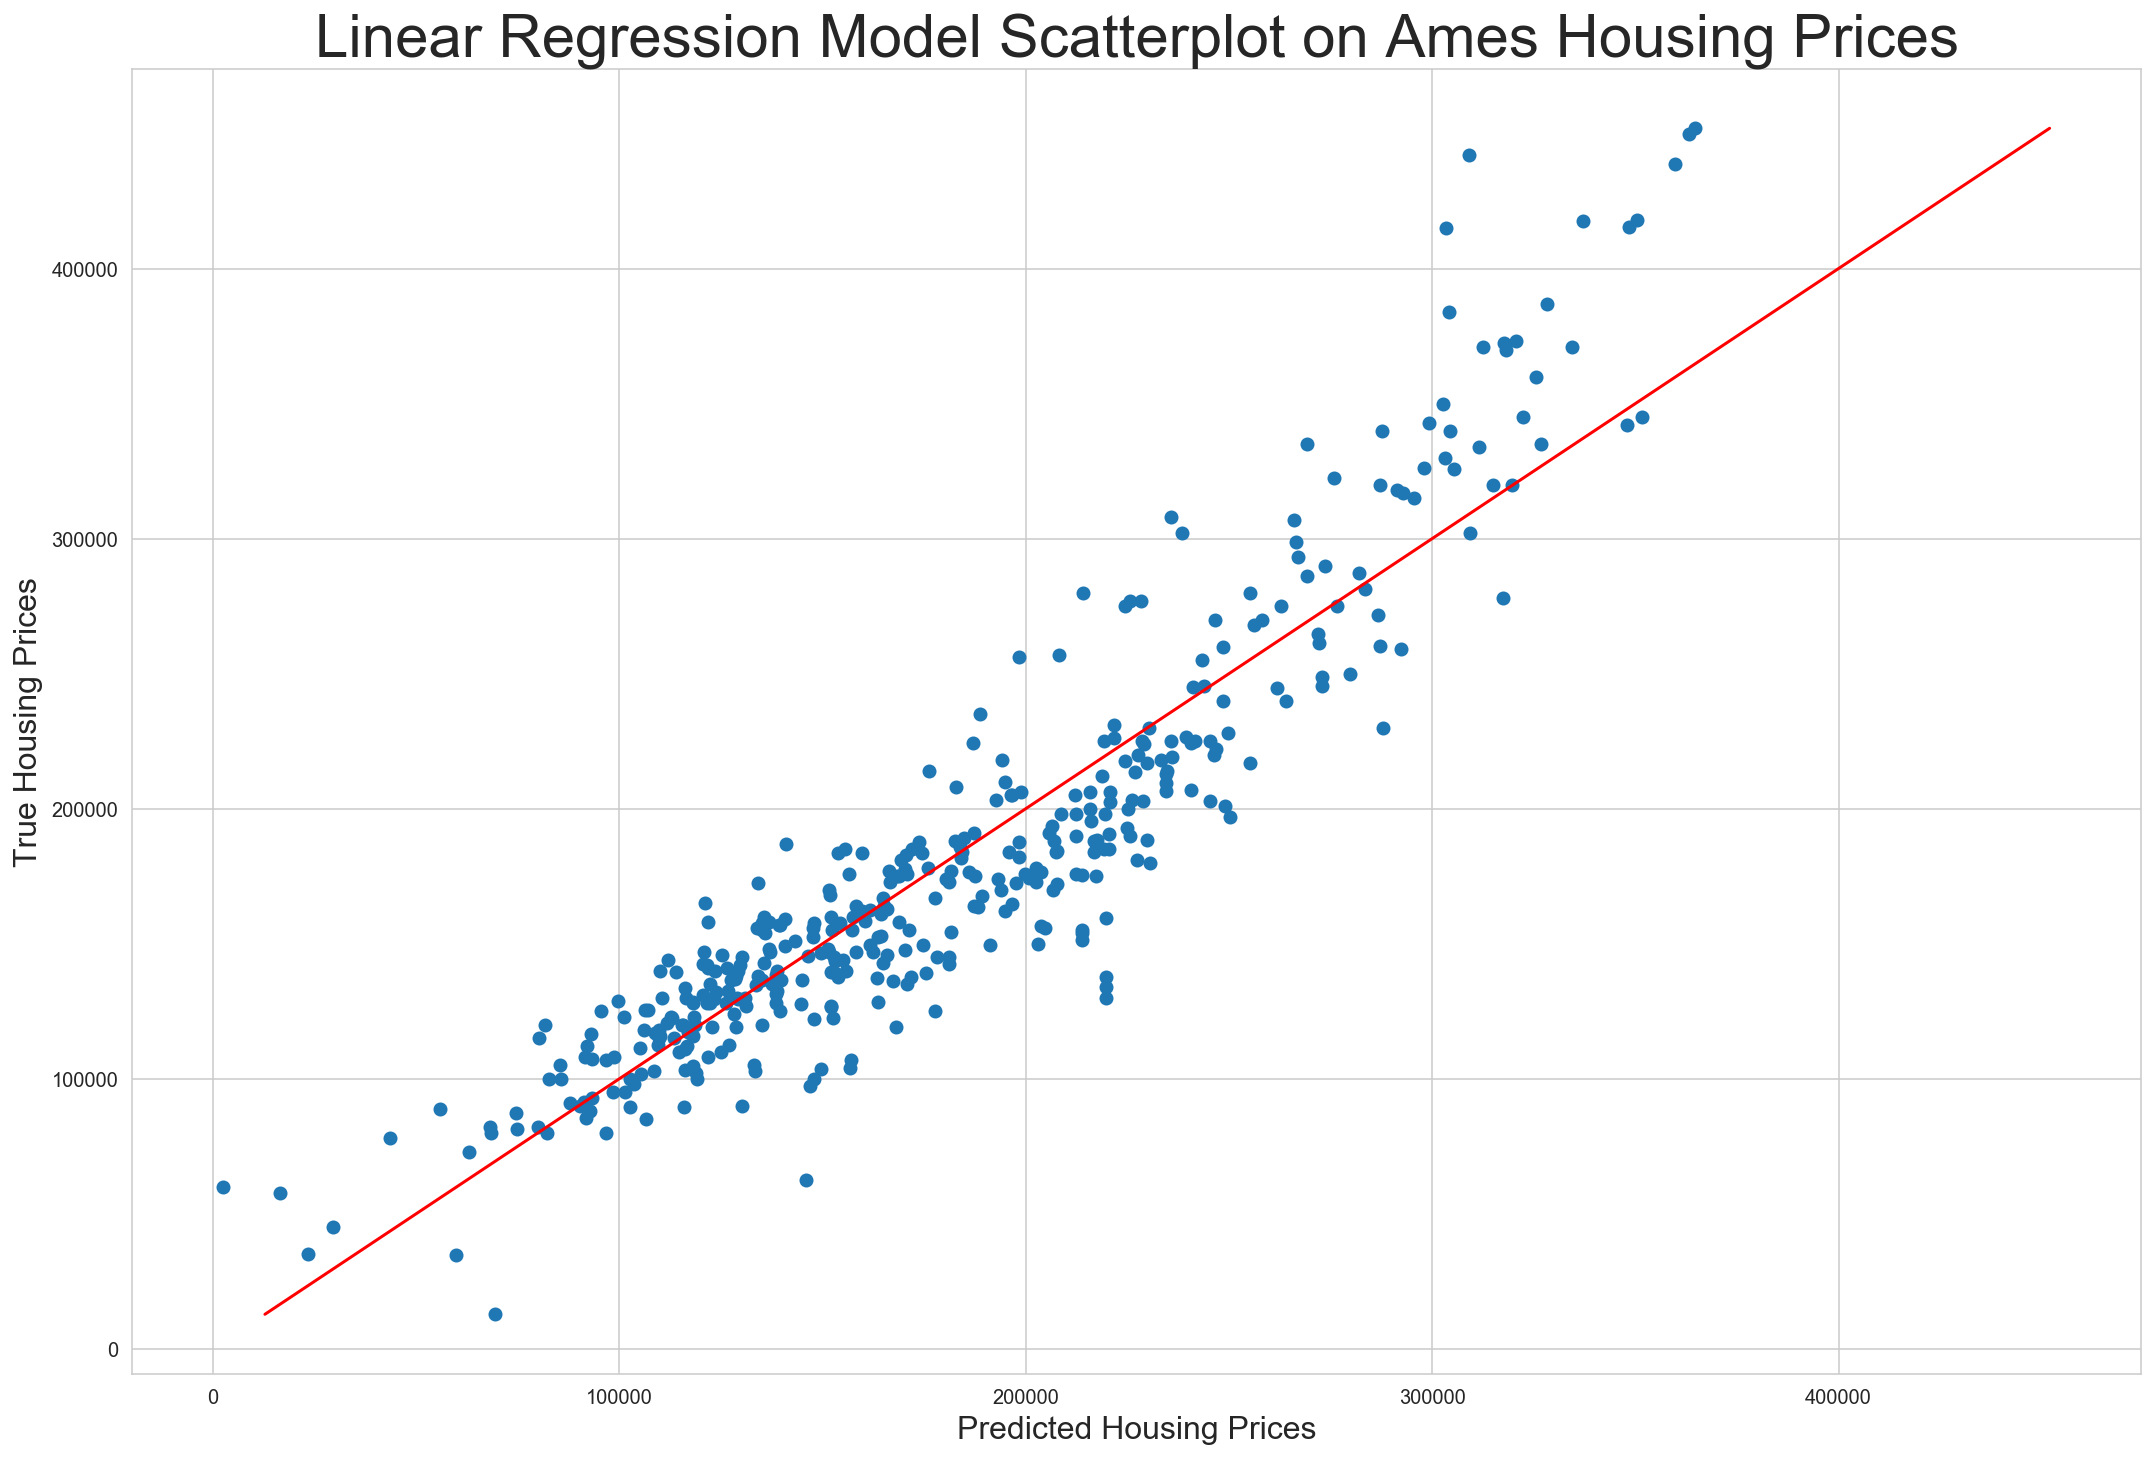

In [126]:
# Linear Regression 

X_train, X_test, y_train, y_test = train_test_split(X_train_linreg, y_train_linreg, test_size=0.2, random_state=42)
lr = LinearRegression()
lr_model = lr.fit(X_train,y_train)

#Creating variables for statistical metrics 
coef  = lr.coef_
intercept = lr.intercept_
x_val_score = cross_val_score(lr, X_train,y_train, cv =5)
x_val_score_mean = np.mean(x_val_score)
lr_score_train = lr_model.score(X_train,y_train)
lr_score_test = lr_model.score(X_test,y_test)
lr_predict = lr_model.predict(X_test)
RMSE = np.sqrt(mean_squared_error(lr_predict, y_test))

print('LR Model Coefficients: ' + str(coef))
print('LR Model Intercept: ' + str(intercept))
print('LR Model Cross Validation Scores: ' + str(x_val_score))
print('LR Model Cross Validation Mean Score: ' + str(x_val_score_mean))
print('LR Model R-Squared Train Score: ' + str(lr_score_train))
print('LR Model R-Squared Test Score: ' + str(lr_score_test))
print('LR Model RMSE: ' + str(RMSE))


# Linear Regression Scatterplot
plt.figure(figsize=(18,12));
plt.scatter(lr_predict,y_test);
plt.xlabel('Predicted Housing Prices', fontsize = 16);
plt.ylabel('True Housing Prices', fontsize = 16);
plt.title('Linear Regression Model Scatterplot on Ames Housing Prices', fontsize = 30);
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], c='red');


In [127]:
# Kaggle Submission: Linear Regression 


lr_predict = lr_model.predict(test[linreg_pred])

kaggle_submission_v2 = pd.DataFrame({'Id': test.id, 'SalePrice': lr_predict})
# you could use any filename. We choose submission here
kaggle_submission_v2.to_csv('kaggle_proj2_lr.csv', index=False)

The initial Linear Regression model has managed to record a R-Squared Score of 0.854, which tells us that approximately 85% of the variance in the housing prices can be explained by the model. This is a relatively good start to begin with and going forward, we would be using other types of models such as Ridge and Lasso Regression to create a better predictive model with lower RMSE.

#### Kaggle RMSE Score: 34460.39413

## Regularization Models : Ridge, Lasso and ElasticNet

### Instantiating Regression Models for Regularization

In [128]:
X_base = train_OHE
y = train['saleprice']

In [129]:
# split x and y variables into training and test set
X_train_ridge_notscaled, X_test_ridge_notscaled, y_train_ridge, y_test_ridge = train_test_split(X_base, y, random_state=42)

In [130]:
# Instantiate StandardScaler
ss = StandardScaler()

In [131]:
# fit a standard scaler to X_train and transform both X_train and X_test
X_train_ridge = ss.fit_transform(X_train_ridge_notscaled)
X_test_ridge = ss.transform(X_test_ridge_notscaled)

### Ridge Regression 

C:\Users\yingh\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\yingh\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\yingh\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\yingh\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: Deprecation

Ridge Model Cross Validation Scores: [0.89993793 0.89331044 0.6969024  0.90606645 0.82321535 0.91249839
 0.90989952 0.7121352  0.44743486 0.87196962]
Ridge Model Cross Validation Mean Score: 0.8073370148756439
Ridge Model R-Squared Train Score: 0.9266390710286538
Ridge Model R-Squared Test Score: 0.8954196040769347
Ridge Model RMSE: 25340.209495450657
Ridge Optimal Alpha:  10.0


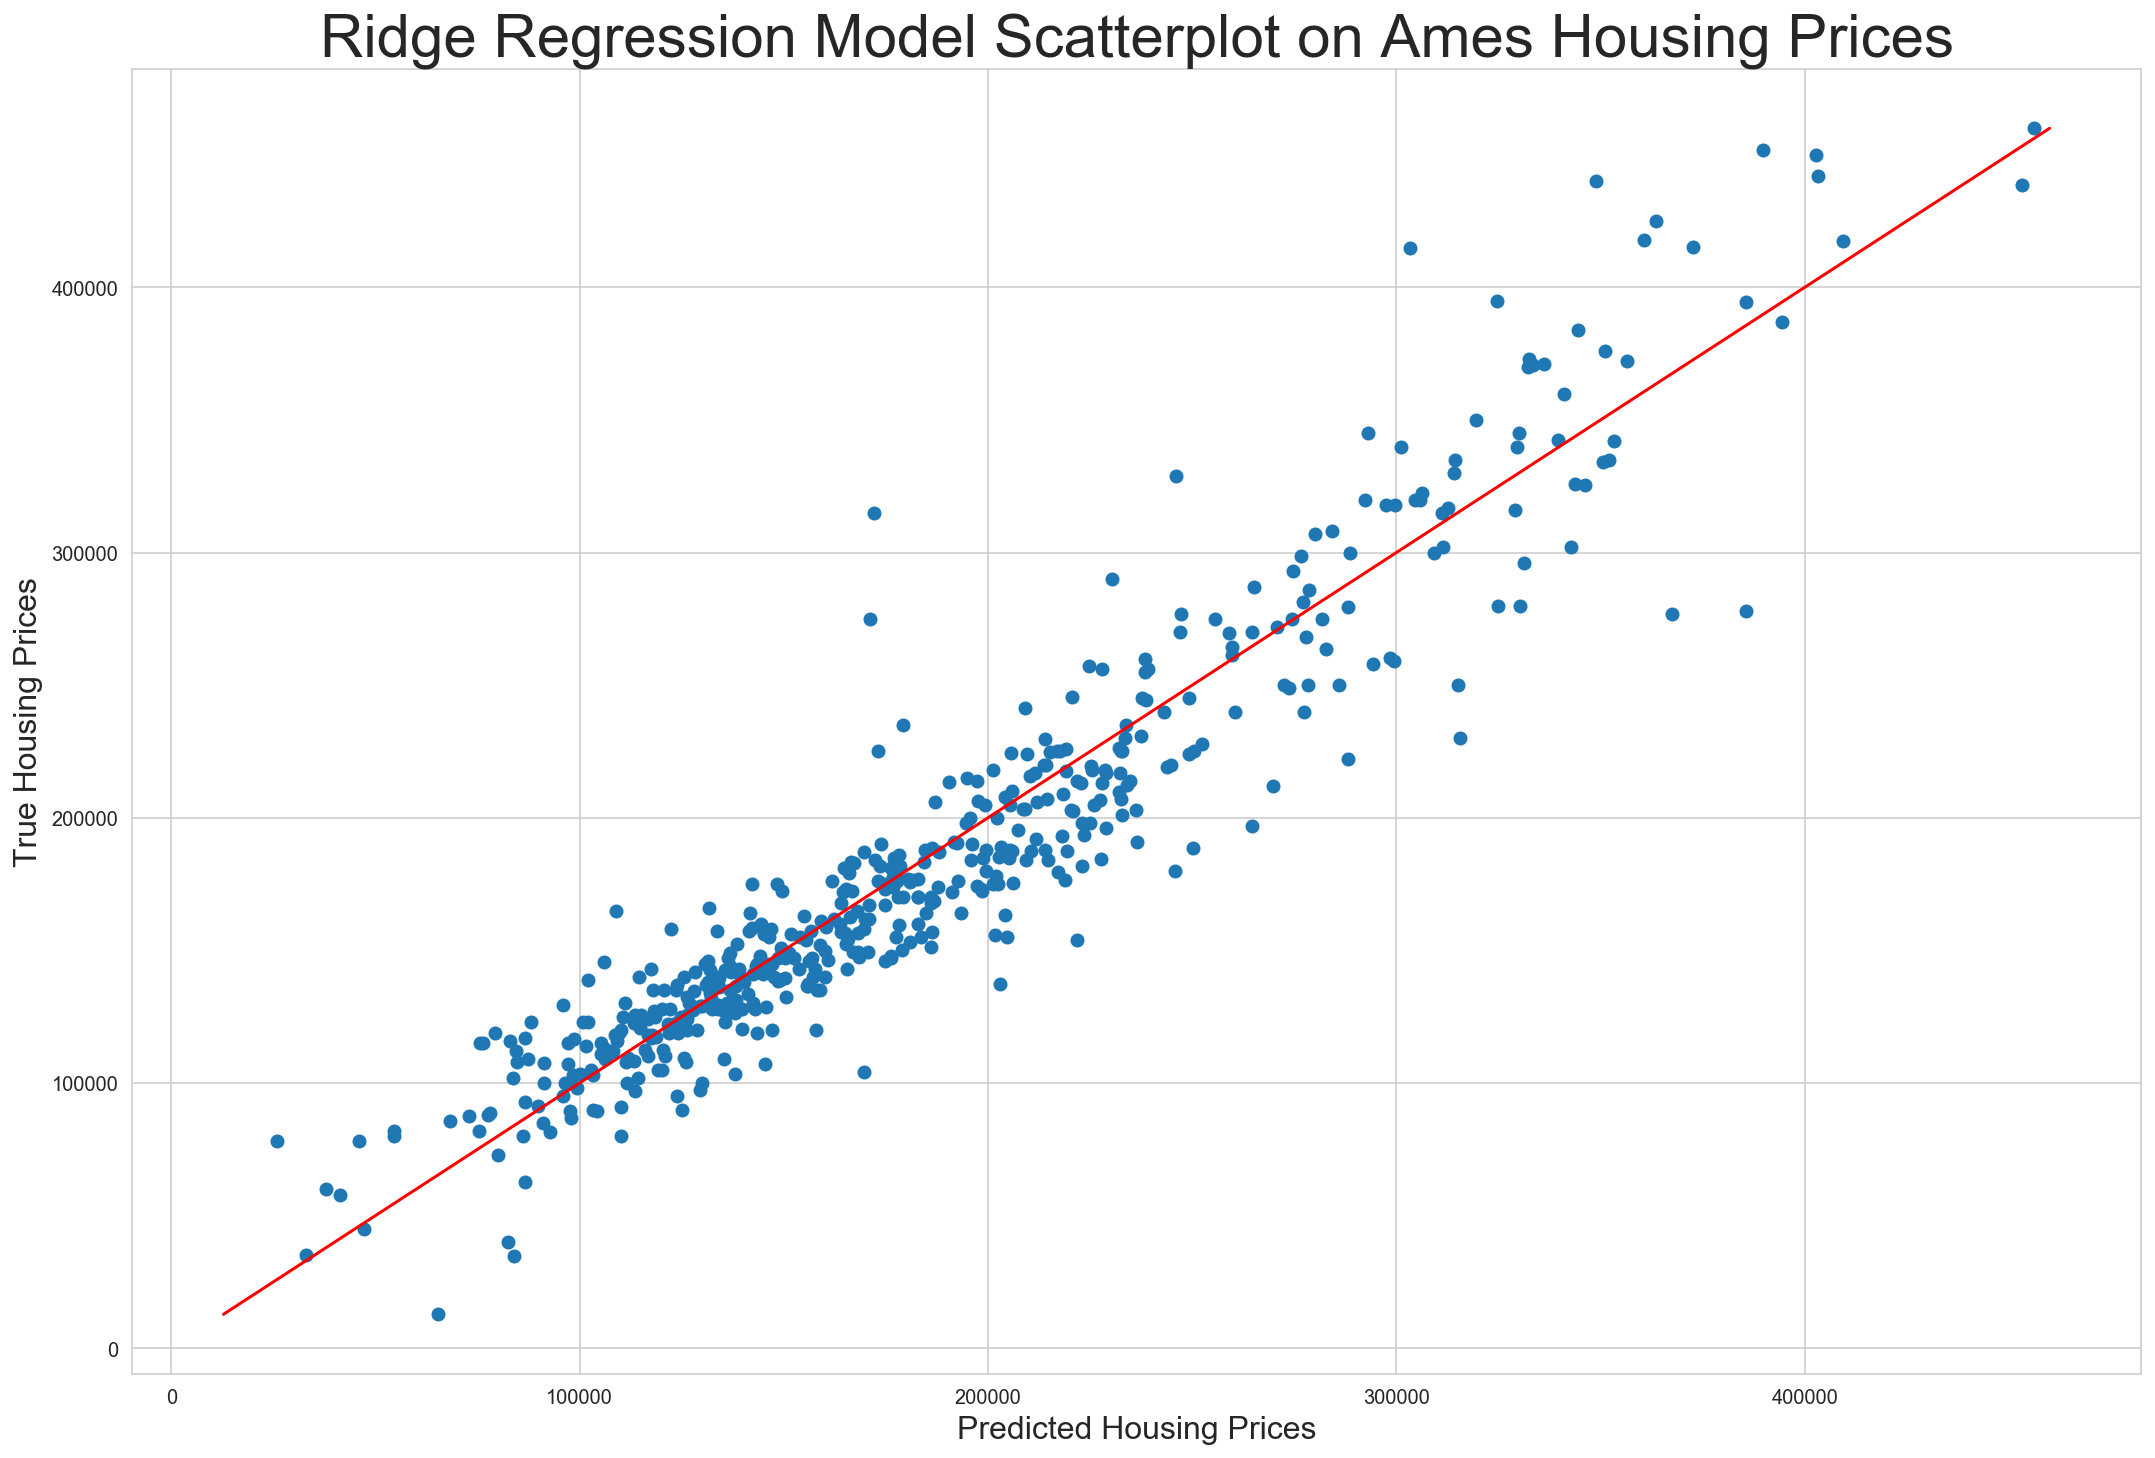

In [132]:
# Ridge Regression 
ridge_reg = RidgeCV(cv=10)
ridge_model = ridge_reg.fit(X_train_ridge,y_train_ridge)

#Creating variables for statistical metrics 
x_val_score = cross_val_score(ridge_reg, X_train_ridge,y_train_ridge, cv =10)
x_val_score_mean = np.mean(x_val_score)
ridge_score_train = ridge_model.score(X_train_ridge,y_train_ridge)
ridge_score_test = ridge_model.score(X_test_ridge,y_test_ridge)
ridge_predict = ridge_model.predict(X_test_ridge)
RMSE = np.sqrt(mean_squared_error(ridge_predict, y_test_ridge))

print('Ridge Model Cross Validation Scores: ' + str(x_val_score))
print('Ridge Model Cross Validation Mean Score: ' + str(x_val_score_mean))
print('Ridge Model R-Squared Train Score: ' + str(ridge_score_train))
print('Ridge Model R-Squared Test Score: ' + str(ridge_score_test))
print('Ridge Model RMSE: ' + str(RMSE))
print('Ridge Optimal Alpha: ', ridge_reg.alpha_)


# Linear Regression Scatterplot
plt.figure(figsize=(18,12));
plt.scatter(ridge_predict,y_test_ridge);
plt.xlabel('Predicted Housing Prices', fontsize = 16);
plt.ylabel('True Housing Prices', fontsize = 16);
plt.title('Ridge Regression Model Scatterplot on Ames Housing Prices', fontsize = 30);
plt.plot([y_test_ridge.min(), y_test_ridge.max()], [y_test_ridge.min(), y_test_ridge.max()], c='red');


In [133]:
# Kaggle Submission: Ridge Regression Model 


ridge_predict_test = ridge_model.predict(test_OHE)
kaggle_submission_v2 = pd.DataFrame({'Id': test.id, 'SalePrice': ridge_predict_test})
kaggle_submission_v2.to_csv('kaggle_proj2_ridge.csv', index=False)


In [134]:
ridge_model.coef_

array([-8.19459812e+02,  4.60247713e+03,  8.50873939e+02,  0.00000000e+00,
       -4.31757657e+02,  1.12990385e+04,  4.95203044e+03,  7.44869383e+03,
        6.01767872e+02,  6.16771634e+03,  6.41254382e+03, -7.05069249e+02,
        1.68942635e+03, -2.42527544e+03,  4.88558410e+03,  1.01764695e+03,
        6.35703783e+03,  1.21425800e+03,  1.00341302e+02, -1.03572498e+03,
        5.57814357e+03,  1.04116570e+03, -5.98623331e+02,  7.77403816e+03,
        7.74774584e+03,  6.10316572e+01,  1.27040448e+04,  2.95437612e+03,
        4.55981967e+02,  2.24798375e+03,  2.06440558e+03, -1.56244497e+03,
       -2.62851473e+03,  4.55927515e+03,  3.52956141e+03,  3.25826253e+03,
        1.80349954e+03,  8.61087592e+02, -5.06918759e+03,  4.72138705e+02,
        3.11497211e+03,  2.22091198e+03,  5.42037679e+03, -1.55133811e+03,
        9.46343154e+02,  9.47745914e+02,  1.13230197e+03,  4.22846184e+02,
        8.80865185e+02,  4.10575919e+03,  3.55213971e+03, -5.58200228e+03,
        6.79054732e+02, -

#### Kaggle RMSE Score: 35952.82

### Lasso Regression 

In [135]:
# split x and y variables into training and test set
X_train_lasso_notscaled, X_test_lasso_notscaled, y_train_lasso, y_test_lasso = train_test_split(X_base, y, random_state=42)

In [136]:
X_train_lasso = ss.fit_transform(X_train_lasso_notscaled)
X_test_lasso = ss.transform(X_test_lasso_notscaled)

C:\Users\yingh\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1046198915.652832, tolerance: 866402119.0084044
  tol, rng, random, positive)
C:\Users\yingh\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1092504989.011963, tolerance: 866402119.0084044
  tol, rng, random, positive)
C:\Users\yingh\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1062144589.6972656, tolerance: 866402119.0084044
  tol, rng, random, positive)
C:\Users\yingh\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might w

C:\Users\yingh\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1022152489.2218018, tolerance: 765093199.7023145
  tol, rng, random, positive)
C:\Users\yingh\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1056461515.9711914, tolerance: 765093199.7023145
  tol, rng, random, positive)
C:\Users\yingh\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1021622687.5786133, tolerance: 765093199.7023145
  tol, rng, random, positive)
C:\Users\yingh\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might

Lasso Model Cross Validation Scores: [0.90104941 0.87403222 0.84716717 0.89254668 0.83107997 0.89841365
 0.89494956 0.77817533 0.48962844 0.87997227]
Lasso Model Cross Validation Mean Score: 0.8287014707657085
Lasso Model R-Squared Train Score: 0.8980059976551701
Lasso Model R-Squared Test Score: 0.8911195756478644
Lasso Model RMSE: 25855.91804923699
Lasso Optimal Alpha:  780.2524614559242


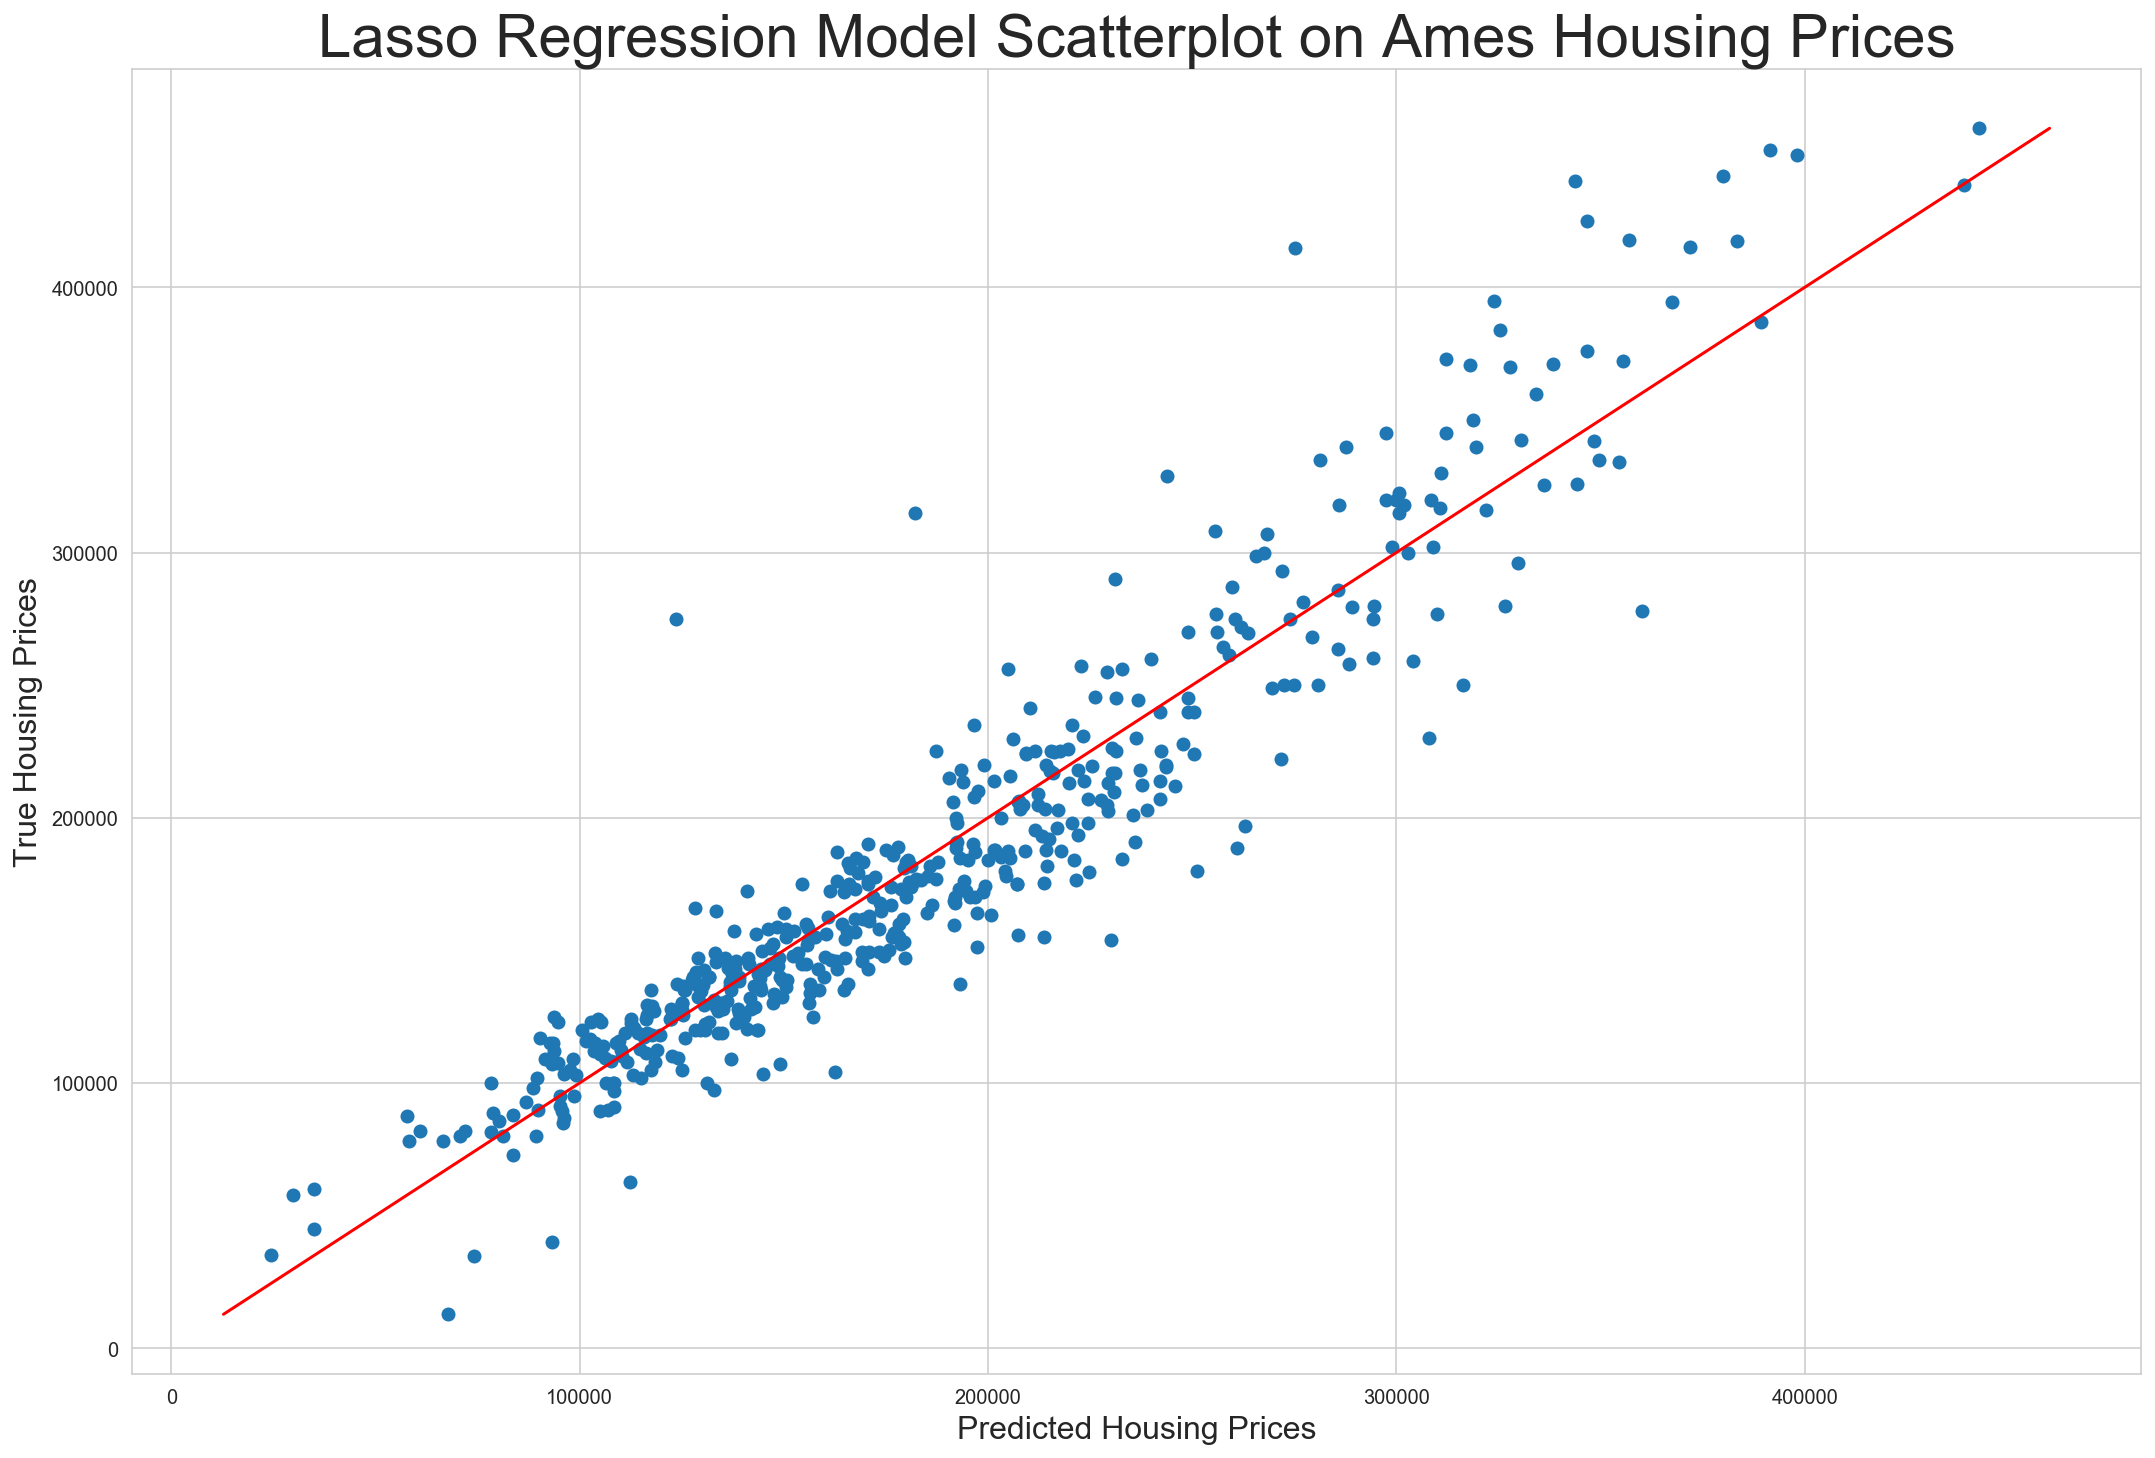

In [137]:
# Lasso Regression 

lasso_reg = LassoCV(cv=10)
lasso_model = lasso_reg.fit(X_train_lasso,y_train_lasso)

#Creating variables for statistical metrics 
x_val_score = cross_val_score(lasso_reg, X_train_lasso,y_train_lasso, cv =10)
x_val_score_mean = np.mean(x_val_score)
lasso_score_train = lasso_model.score(X_train_lasso,y_train_lasso)
lasso_score_test = lasso_model.score(X_test_lasso,y_test_lasso)
lasso_predict = lasso_model.predict(X_test_lasso)
RMSE = np.sqrt(mean_squared_error(lasso_predict, y_test_lasso))

print('Lasso Model Cross Validation Scores: ' + str(x_val_score))
print('Lasso Model Cross Validation Mean Score: ' + str(x_val_score_mean))
print('Lasso Model R-Squared Train Score: ' + str(lasso_score_train))
print('Lasso Model R-Squared Test Score: ' + str(lasso_score_test))
print('Lasso Model RMSE: ' + str(RMSE))
print('Lasso Optimal Alpha: ', lasso_reg.alpha_)


# Lasso Regression Scatterplot
plt.figure(figsize=(18,12));
plt.scatter(lasso_predict,y_test_lasso);
plt.xlabel('Predicted Housing Prices', fontsize = 16);
plt.ylabel('True Housing Prices', fontsize = 16);
plt.title('Lasso Regression Model Scatterplot on Ames Housing Prices', fontsize = 30);
plt.plot([y_test_lasso.min(), y_test_lasso.max()], [y_test_lasso.min(), y_test_lasso.max()], c='red');

In [138]:
# Kaggle Submission: Lasso Regression Model 
test_OHE_scaled = ss.fit_transform(test_OHE)
lasso_predict_test = lasso_model.predict(test_OHE_scaled)
kaggle_submission_v3 = pd.DataFrame({'Id': test.id, 'SalePrice': lasso_predict_test})
kaggle_submission_v3.to_csv('kaggle_proj2_lasso.csv', index=False)


#### Kaggle RMSE Score: 35146.37

### Evaluation Metrics for Models


**Linear Regression Model**  
R-Squared Train Score: 0.794   
R-Squared Test Score: 0.854  
RMSE: 29454.15252624777    
Kaggle RMSE Score: 34460     
  
**Ridge Regression Model**  
R-Squared Train Score: 0.927   
R-Squared Test Score: 0.895   
RMSE: 25340.209    
Kaggle RMSE Score: 35952   
  
**Lasso Regression Model**  
R-Squared Train Score: 0.898  
R-Squared Test Score: 0.891  
RMSE: 25855.918   
Kaggle RMSE Score: 35146 
     
* Note that train and test refer to the train/test split from the train datasets. The Kaggle RMSE score is predicted from the test data itself. 

After running the models for linear, ridge and lasso regression, we found that our ridge regression model gave us the lowest RMSE score (25340) based on trained data, and the highest R-Squared Scores. The Lasso Model has also R-Square scores(0.89) and RMSE (25856) close to that of Ridge Model. However, it did not peform as well as on the test data predictions submitted to kaggle. This may be a case of slight overfititng by the ridge regression model. 

The linear regression model gave us the lowest Kaggle RMSE scores out of the 3 models. Even though its R-Square scores is not as high as that of the Ridge Model, it performed better on the test data. This suggests that the current linear regression model may have a lower bias than the Ridge Model and might perhaps be on par with the Ridge and Lasso Regression Models when it comes to unseen data. 

### ElasticNet Regression 

In [139]:
X_train_enet, X_test_enet, y_train_enet, y_test_enet = train_test_split(X_base, y, random_state=42)

ENet Model Cross Validation Scores: [-1.33927722e-04 -1.00044491e-03 -4.71820291e-03 -8.39802786e-05
 -4.36603768e-03 -4.17126214e-03 -7.06509129e-04 -4.16138088e-03
 -2.05997102e-03 -2.11987192e-03]
ENet Model Cross Validation Mean Score: -0.00235215885957023
ENet Model R-Squared Train Score: 0.7516699189968025
ENet Model R-Squared Test Score: 0.8122060589819662
ENet Model RMSE: 33956.72896574813
ENet Optimal Alpha:  146301.8933281937
ENet Optimal l1 ratio:  1.0


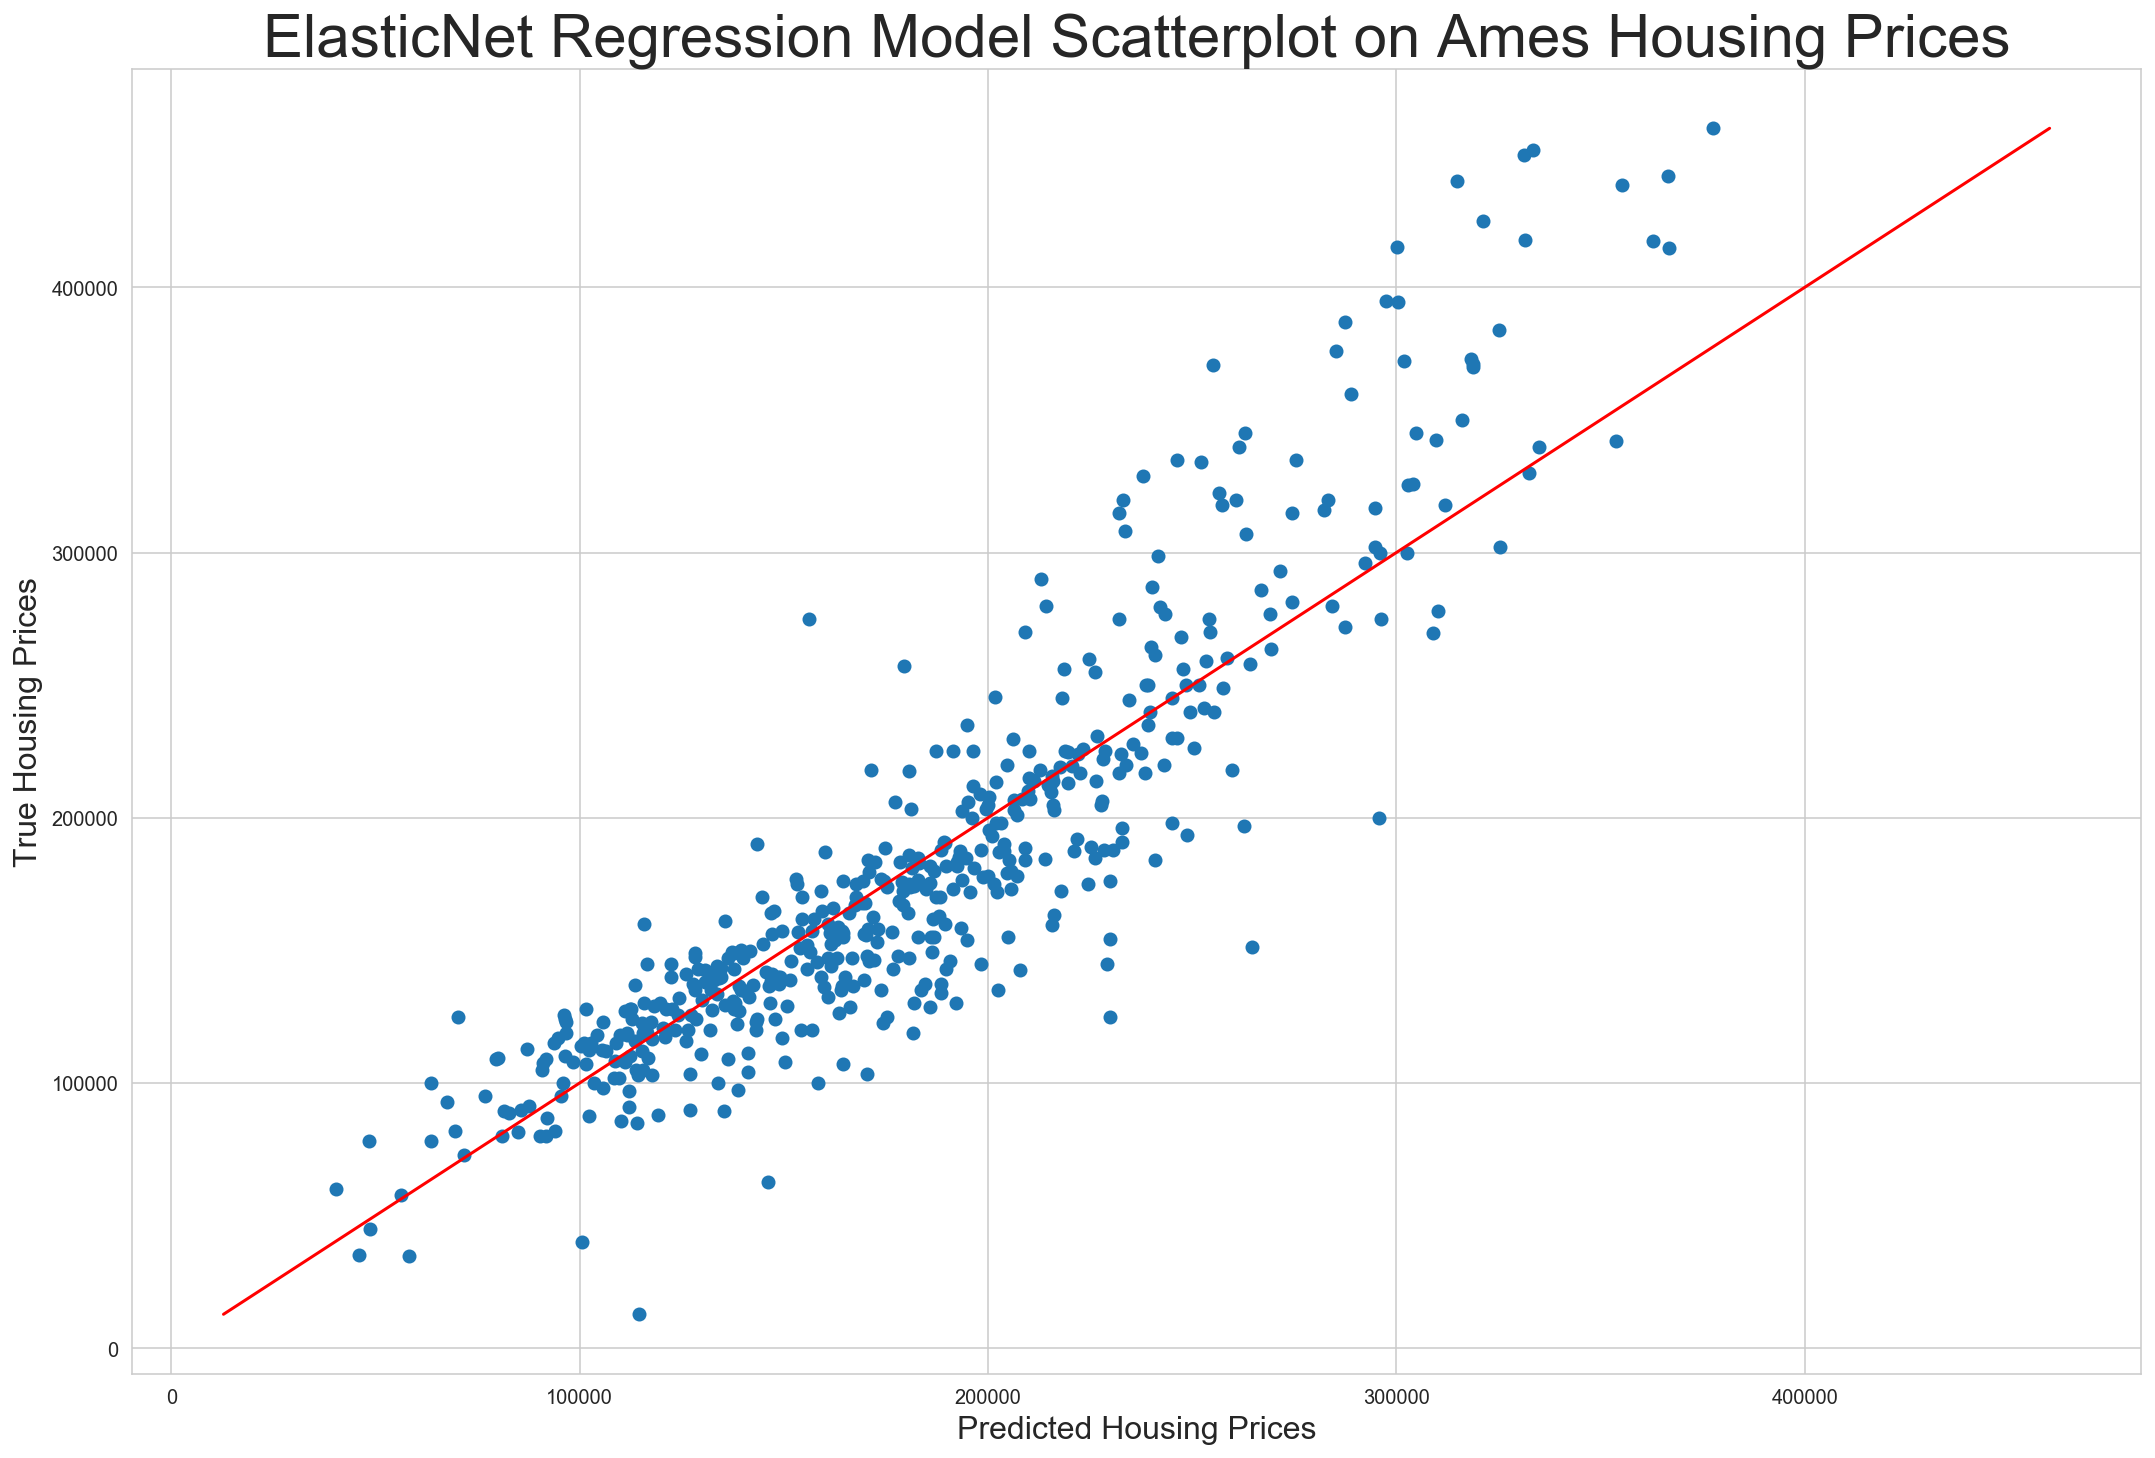

In [140]:
enet_l1_ratio = np.linspace(0.01, 1.0, 25)
enet = ElasticNetCV(l1_ratio= enet_l1_ratio, cv=10)
enet_model = enet.fit(X_train_enet, y_train_enet)
opt_enet = ElasticNet(alpha=enet.alpha_, l1_ratio=enet.l1_ratio_)

#Creating variables for statistical metrics 
x_val_score = cross_val_score(opt_enet, X_train_lasso,y_train_lasso, cv =10)
x_val_score_mean = np.mean(x_val_score)
enet_score_train = enet_model.score(X_train_enet,y_train_enet)
enet_score_test = enet_model.score(X_test_enet,y_test_enet)
enet_predict = enet_model.predict(X_test_enet)
RMSE = np.sqrt(mean_squared_error(enet_predict, y_test_enet))

print('ENet Model Cross Validation Scores: ' + str(x_val_score))
print('ENet Model Cross Validation Mean Score: ' + str(x_val_score_mean))
print('ENet Model R-Squared Train Score: ' + str(enet_score_train))
print('ENet Model R-Squared Test Score: ' + str(enet_score_test))
print('ENet Model RMSE: ' + str(RMSE))
print('ENet Optimal Alpha: ', enet.alpha_)
print('ENet Optimal l1 ratio: ', enet.l1_ratio_)

# ElasticNet Regression Scatterplot
plt.figure(figsize=(18,12));
plt.scatter(enet_predict,y_test_enet);
plt.xlabel('Predicted Housing Prices', fontsize = 16);
plt.ylabel('True Housing Prices', fontsize = 16);
plt.title('ElasticNet Regression Model Scatterplot on Ames Housing Prices', fontsize = 30);
plt.plot([y_test_enet.min(), y_test_enet.max()], [y_test_enet.min(), y_test_enet.max()], c='red');

In this case, the optimal l1 ratio for the ElasticNet ratio is 1. That means that the model has been optimized to a full lasso regression model. Thus it has the same scores as the Lasso Regression Model. 

### Ridge Model Variable Coefficients 

In [141]:
# Create a dataframe and sort the coefficients of variables in the ridge model. 
ridge_coefs = pd.DataFrame({'variable':X_train_ridge_notscaled.columns,
                            'coef':ridge_model.coef_,
                            'abs_coef':np.abs(ridge_model.coef_)})
ridge_coefs.sort_values('abs_coef', inplace=True, ascending=False)
ridge_coefs.head(20)

variable          coef      abs_coef
145     roof_matl_CompShg  41023.669734  41023.669734
149     roof_matl_Tar&Grv  29877.353294  29877.353294
207     misc_feature_Shed  22077.504820  22077.504820
205       misc_feature_NA  21841.806080  21841.806080
150     roof_matl_WdShake  18701.965861  18701.965861
151     roof_matl_WdShngl  18432.833872  18432.833872
26            gr_liv_area  12704.044842  12704.044842
5            overall_qual  11299.038487  11299.038487
204     misc_feature_Gar2  10138.479406  10138.479406
53               misc_val  -9571.467570   9571.467570
146     roof_matl_Membran   9471.670015   9471.670015
206     misc_feature_Othr   9425.421905   9425.421905
23             1st_flr_sf   7774.038165   7774.038165
24             2nd_flr_sf   7747.745845   7747.745845
7              year_built   7448.693827   7448.693827
66        ms_subclass_120  -6648.134874   6648.134874
10             exter_qual   6412.543820   6412.543820
105  neighborhood_NridgHt   6366.767418   6366.767418
16           bsmtfin_sf_1   6357.037826   6357.037826
9            mas_vnr_area   6167.716341   6167.716341

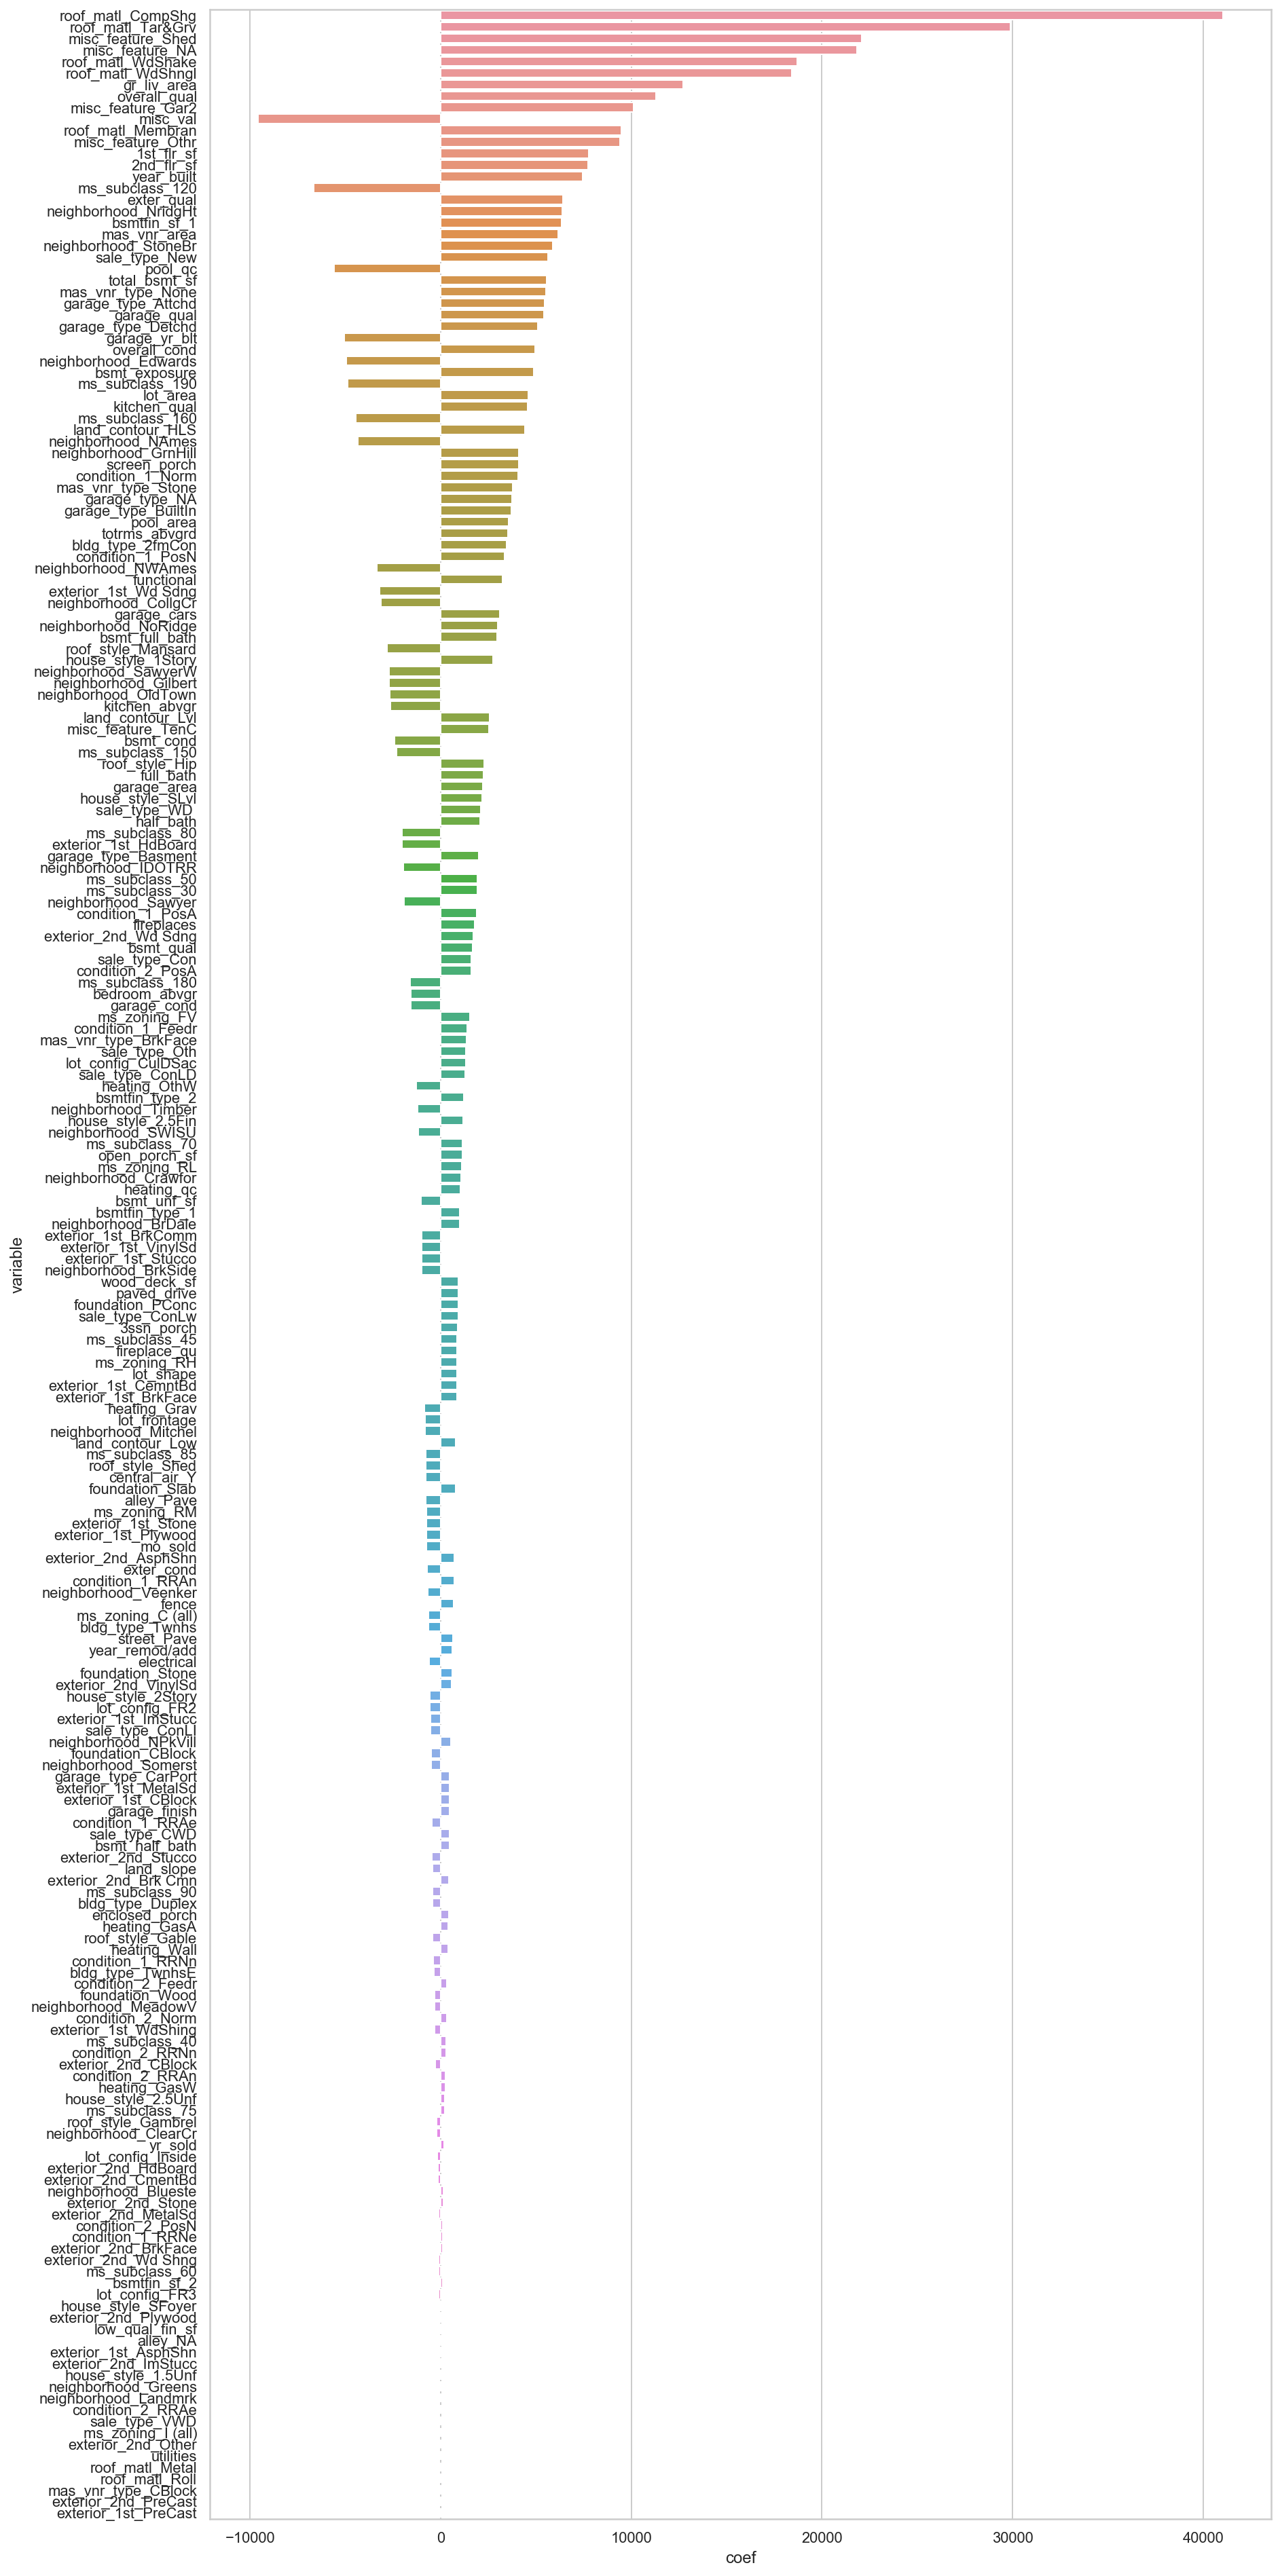

In [142]:
# Barplot of Magnitude of Coefficients for each variable in ridge regression 
sns.set(style='whitegrid',rc={"figure.figsize": (14, 34)});
sns.barplot(y='variable',x='coef', data=ridge_coefs);

Under the Ridge Model Coefficients, we see that the variables with the highest coefficients are:
- Roof Material
- Miscellaneous Feature
- Above Grade Living Area
- Overall Quality 
- Floor Sqr Feet
- Masonry Veneer Area
- Specific Neighbourhoods 
  
Essential features such as above grade living area and overall quality would impact the price of a house, and thus are expected to register high coefficients.  
  
It is a surprise to see that roof material and miscellaneous features to be a huge determinant in the ridge regression model, considering that the roof material would certainly not be as important as other features in the house, such as the living space. Yet, it has a huge coefficient attached to them. 


### Lasso Coefficients 

In [143]:
lasso_coefs = pd.DataFrame({'variable':X_train_lasso_notscaled.columns,
                            'coef':lasso_model.coef_,
                            'abs_coef':np.abs(lasso_model.coef_)})
lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)
lasso_coefs.head(15)

variable          coef      abs_coef
26            gr_liv_area  17715.854624  17715.854624
5            overall_qual  13684.168582  13684.168582
105  neighborhood_NridgHt   9429.963072   9429.963072
53               misc_val  -7921.982158   7921.982158
10             exter_qual   7233.153045   7233.153045
111  neighborhood_StoneBr   7154.227903   7154.227903
33           kitchen_qual   5326.548969   5326.548969
104  neighborhood_NoRidge   5045.282387   5045.282387
14          bsmt_exposure   4843.181722   4843.181722
51                pool_qc  -4384.304510   4384.304510
16           bsmtfin_sf_1   4350.455691   4350.455691
49           screen_porch   4194.653781   4194.653781
9            mas_vnr_area   3965.659552   3965.659552
214         sale_type_New   3865.243702   3865.243702
7              year_built   3844.944417   3844.944417

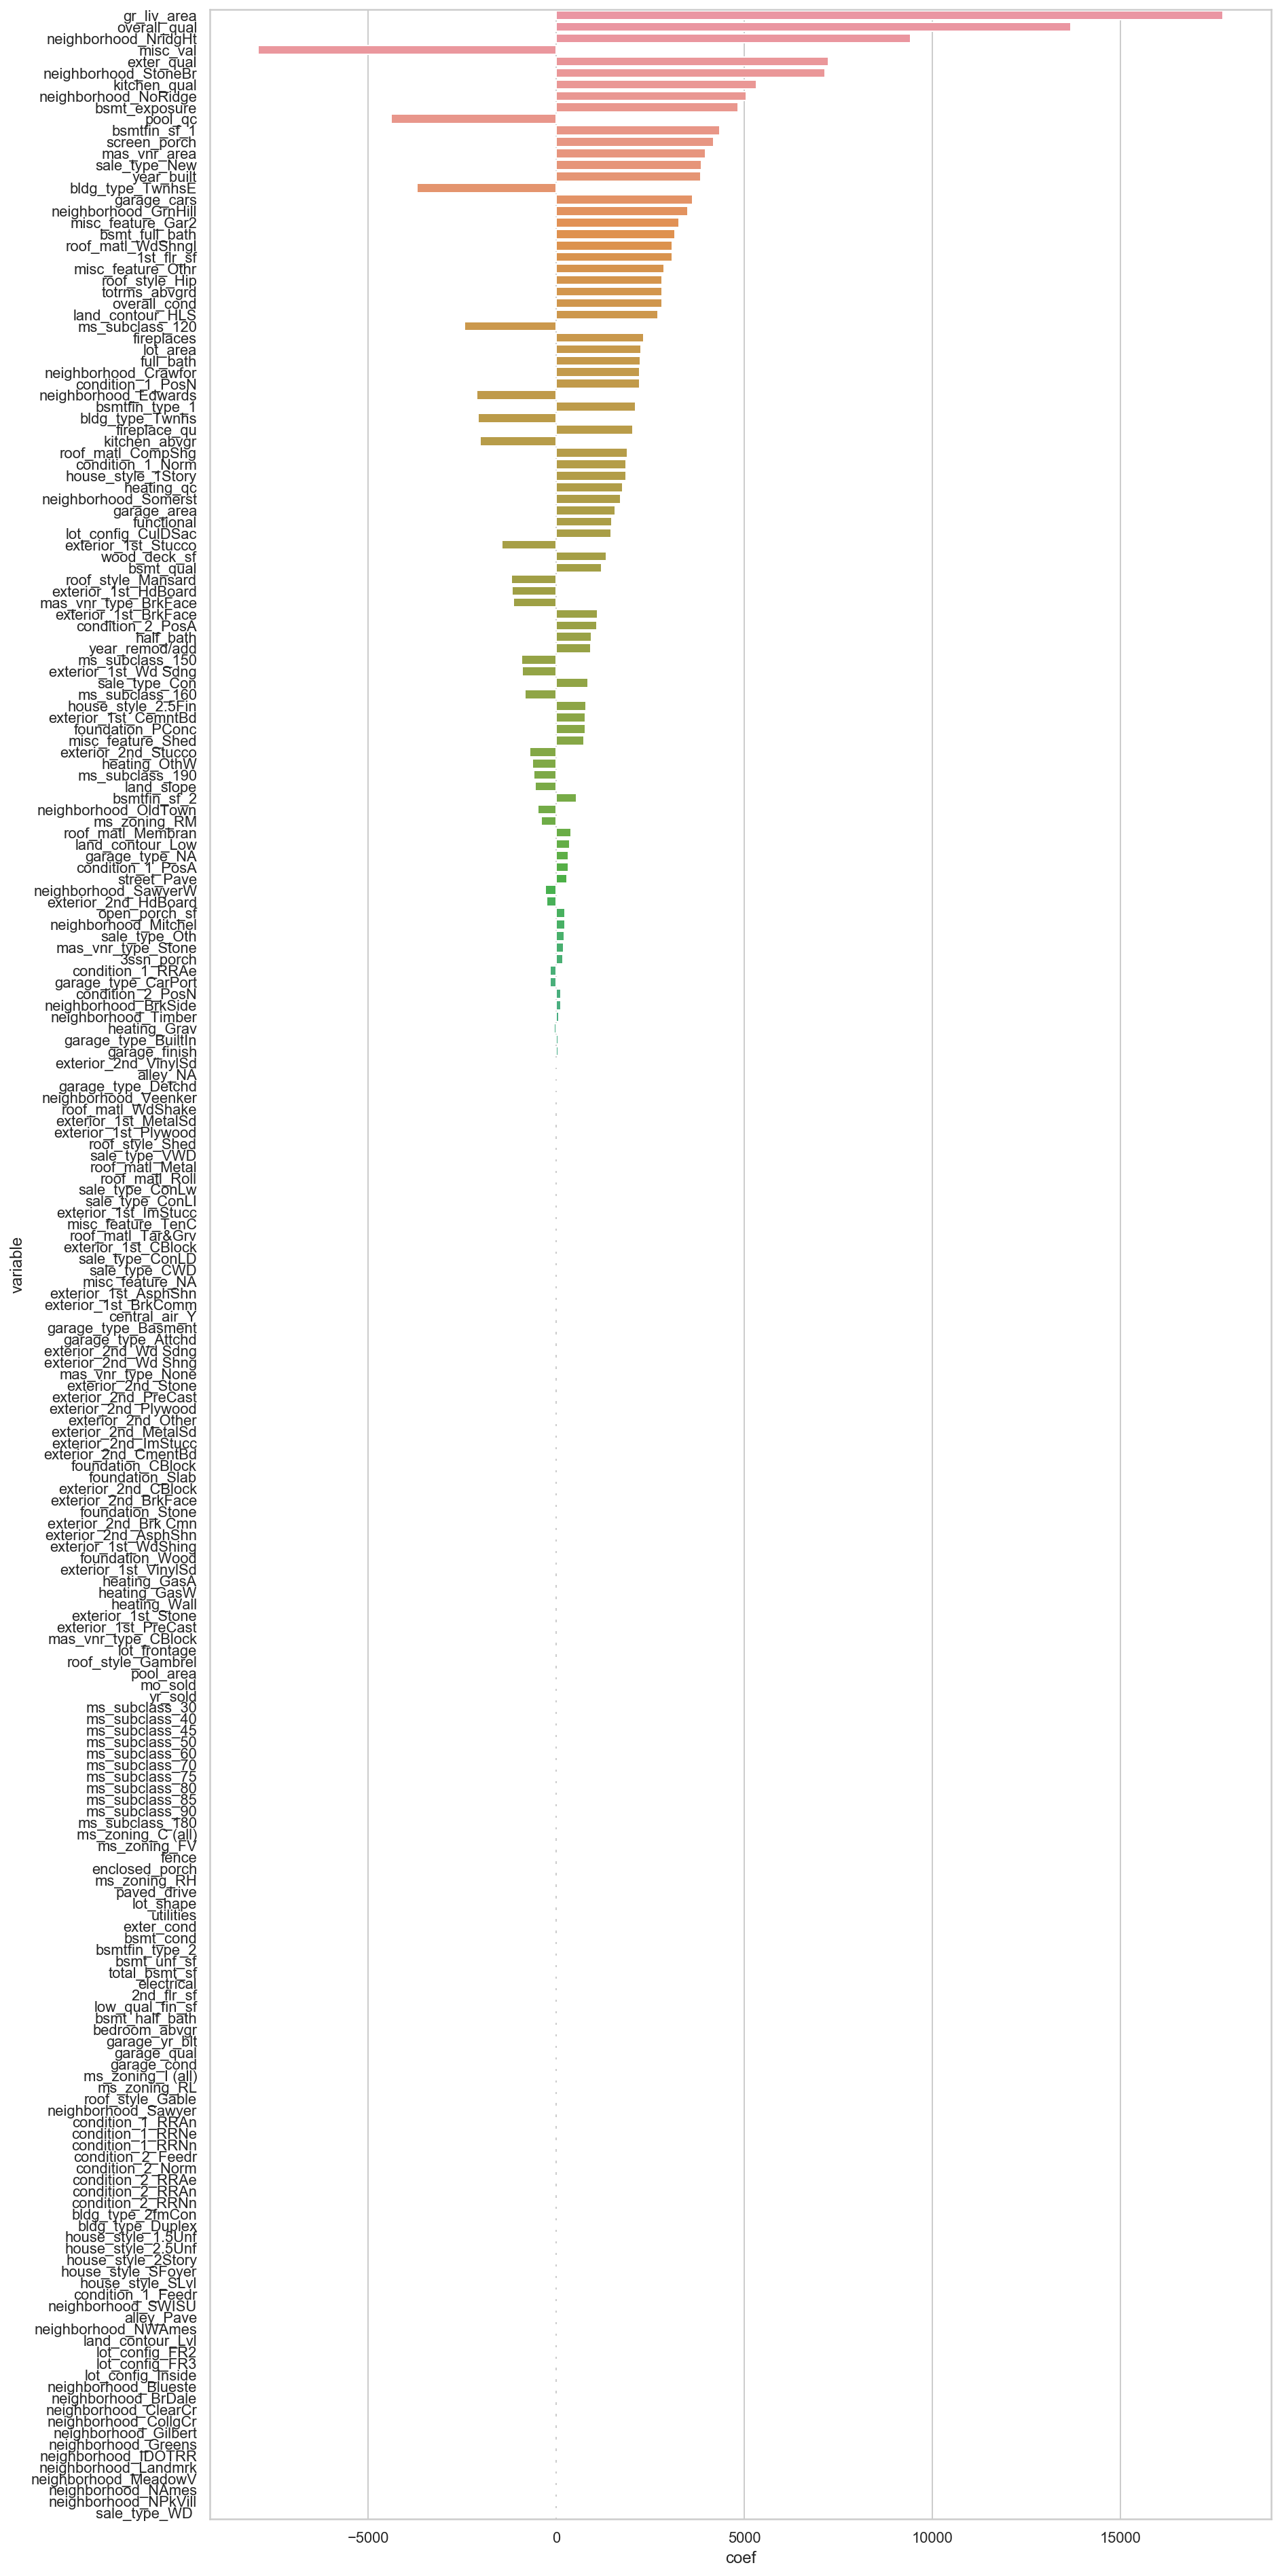

In [144]:
# Barplot of Magnitude of Coefficients for each variable in lasso regression 
sns.set(style='whitegrid',rc={"figure.figsize": (14, 34)});
sns.barplot(y='variable',x='coef', data=lasso_coefs);

From the above, it seems that the Lasso Regression model has narrowed down to 14 variables. When compared to the ridge regression model, we see variables such as gr_liv_area and year built being high up in the coefficient rankings, similarly to ridge regression. However, some variables which have non-essential features include pool area, screen porch and miscellaneous features (misc_val) are high in their coefficients, which suggests that they are sensitive to housing prices, according to the lasso model. 

It is surprising that pool area has a negative coefficient, in which having a pool will negatively impact the house prices. This is counterintutitive to how real estate are valued, in which a house would be worth more with added amenities. This might be due to the fact that there were alot of missing values in datasets for pools and miscellaneous features, as only a few houses had those extra amenities. This could explain the irregularities seen from the coefficients. 

Another plausible reason for this maybe that pools are not really popular in the area of Ames as pools can be cumbersome to maintain. Thus, having a built it pool might be a turn-off factor for potential buyers. This also goes for miscellaneous features as well.

## Conclusion 

From the above models, we notice certain commonalities between key variables in models that have displayed a high sensitivity in prices, which are:
- Above Grade Living Area 
- Overall Quality 
- Neighbourhoods
- Year Built 
- Garage
- 1st Floor Area
- Basement Area

The Lasso and Ridge Regression Model have certainly shown some oddities in non-essential features have high coefficients. In Ridge Regression, these oddities maybe a result of multicollinearity, in which one seemingly unrelated model with high coefficient may also affect other models. However, when comparing the lasso model against the ridge model, the lasso model seems to produce variables with high coefficients that are more sensible as opposed to the ridge model. It is still unclear why roof material ('roof_matl') tops the ridge model coefficient charts. 

The Lasso Model may have been more effective in this determining housing prices from the datasets, given that alot of the variables given have high correlation with each other (as demonstrated in the heatmap above). The Lasso Model does well in eliminating variables that have multicollinearity, as opposed to the Ridge Model which only seeks to minimize it. This is supported by the fact that the ElasticNet Model optimized in a way where only the Lasso Model portion remains.

To sum up, the initial linear regression model fared worse off in R-Squared score and RMSE when modelled against the trained dataset compared to Ridge and Lasso. However, when predicting values for the kaggle test dataset, it managed to obtain RMSE scores similar to that of the Ridge and Lasso, even faring slighly better. This may suggest that regularization should not be used in its entirety when it comes to predicting models. Regularization should be used to assist us in feature engineering and ultimately, expertise and intrisic human knowledge is still needed to identify which factors are the most important. 


## Further Research

The datasets given only cover attributes pertaining to the features of the house. In order to accurately valuate the price of a house, other external factors must also be taken into consideration, such as:
- Population and demographics of people within the neighbourhood 
- Surrounding amenities and facilities in the neighbourhood 
- Transport Accessibility 
- Economic Indicators (e.g. GDP, YoY-Growth)
- Interest Rates 

All these other factors contribute to the supply and demand of the housing market, the main forces that drive housing price. Simply put, if there is more demand than supply, prices will rise and vice versa. 